## 🏡 Análise de Oportunidades no Mercado Imobiliário — Previsão e Clusterização de Estados para Identificação de Tendências e Crescimento

<div style="text-align: center; margin-bottom: 20px;">
  <img src="../03-Recursos/analysis_image.png" style="width: 600px; display: block; margin-left: auto; margin-right: auto;"/>
</div>

## SUMÁRIO <a id="sumário"></a>

[1. Introdução 🚀](#1-introdução) <br>

[2. Objetivo do Projeto 🎯](#2-objetivo-do-projeto) <br>

[3. Importação de Bibliotecas e Configurações Iniciais 📚](#3-importação-de-bibliotecas-e-configurações-iniciais) <br>

[4. Coleta e Carregamento dos Dados 📥](#4-coleta-e-carregamento-dos-dados) <br>

[5. Pré-processamento e Consolidação dos Dados 🔄](#5-pré-processamento-e-consolidação-dos-dados) <br>

[6. Análise Exploratória de Dados (EDA) 📊](#6-análise-exploratória-de-dados-eda) <br>

[7. Previsão Temporal de Estados para 2021-2022 🔮](#7-previsão-temporal-de-estados-para-2021-2022) <br>

[8. Clusterização e Análise de Segmentação 🔍](#8-clusterização-e-análise-de-segmentação) <br>

[9. Conclusão e Recomendações 🏁](#10-conclusão-e-recomendações) <br>

## **1. Introdução 🚀** <a id="1-introdução"></a>  
[Voltar ao Sumário](#sumário)  

No mercado imobiliário, compreender o comportamento regional e as tendências de crescimento é essencial para antecipar oportunidades de negócio e tomar decisões estratégicas. Esse setor, altamente dinâmico, é influenciado por fatores econômicos, demográficos e regionais, o que torna a análise de dados uma ferramenta indispensável para construtoras, investidores e gestores.  

A previsão de crescimento e a análise de segmentação regional surgem como abordagens fundamentais para identificar quais estados apresentam saturação ou potencial futuro. A partir dessas análises, empresas podem direcionar seus esforços de expansão e planejamento, maximizando o retorno sobre investimentos e minimizando riscos.  

Neste projeto, utilizaremos dados de empresas de construção civil e projeções populacionais para realizar uma análise temporal (2007 a 2022) e identificar oportunidades regionais por meio de técnicas de clusterização. Ao integrar a previsão e a segmentação, buscamos fornecer insights estratégicos que podem orientar decisões sobre alocação de recursos e identificação de novas áreas de crescimento.

## **2. Objetivo do Projeto 🎯** <a id="2-objetivo-do-projeto"></a>  
[Voltar ao Sumário](#sumário)  

O objetivo deste projeto é analisar as tendências regionais no setor de construção civil brasileiro e identificar estados que apresentam saturação ou oportunidades de crescimento. A análise será fundamentada na previsão temporal do número de empresas ativas e na clusterização dos estados com base em variáveis relevantes de negócio. Essa abordagem permitirá orientar decisões estratégicas para o setor imobiliário, especialmente em empresas que buscam otimizar investimentos regionais.

Para atingir esse objetivo, o projeto será estruturado nas seguintes etapas principais:

1. **Coleta e Pré-processamento dos Dados:** Obter dados de empresas de construção civil e projeções populacionais, garantindo a integridade e preparação adequada para análise.  

2. **Previsão Temporal (2021-2022):** Utilizar técnicas de séries temporais para estimar os valores de 2021 e 2022, permitindo a análise prospectiva e identificando padrões de crescimento ou retração em diferentes estados.

3. **Clusterização de Estados:** Agrupar os estados brasileiros com base em características econômicas, demográficas e de negócios para identificar padrões regionais semelhantes. A clusterização permitirá destacar estados saturados e aqueles com potencial de crescimento.  

4. **Visualização e Insights:** Fornecer uma análise visual clara que facilite a tomada de decisões estratégicas relacionadas a investimentos, expansão de negócios e alocação de recursos no setor imobiliário.

Ao final, espera-se que o projeto entregue insights acionáveis, permitindo a identificação de estados promissores e oferecendo recomendações que auxiliem construtoras, investidores e gestores a direcionar suas estratégias de forma otimizada e baseada em dados.

## **3. Importação de Bibliotecas e Configurações Iniciais 📚** <a id="3-importação-de-bibliotecas-e-configurações-iniciais"></a>  
[Voltar ao Sumário](#sumário)  

Nesta seção, importaremos as bibliotecas fundamentais para manipulação e análise de dados, visualização e modelagem preditiva. Além disso, definiremos configurações iniciais para garantir a reprodutibilidade dos resultados e a consistência nas visualizações ao longo do projeto.

In [62]:
# ------------------------------------------------
# Importando as Bibliotecas Necessárias
# ------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests  
import re  
import os
import warnings
import difflib  # 🔄 Adicionada para correção de nomes
from concurrent.futures import ThreadPoolExecutor 
from platform import python_version

# Pré-processamento de dados
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Modelagem e Estimadores
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Clusterização
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Métricas de Clusterização
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Séries Temporais
from statsmodels.tsa.arima.model import ARIMA  
from statsmodels.tsa.api import VAR  

# Análise espacial
import geopandas as gpd
from geobr import read_state

# Configuração de estilo para gráficos
sns.set(style="whitegrid")

# Supressão de avisos desnecessários
warnings.filterwarnings("ignore", category=RuntimeWarning)  
warnings.filterwarnings("ignore", category=UserWarning)     
warnings.filterwarnings("ignore", message="'force_all_finite' was renamed to 'ensure_all_finite'")

# Exibição das versões das bibliotecas e do Python
import matplotlib

library_versions = {
    "Pandas": pd.__version__,
    "NumPy": np.__version__,
    "Matplotlib": matplotlib.__version__,
    "Seaborn": sns.__version__,
    "GeoPandas": gpd.__version__,
}

print("Versões das Bibliotecas:\n")
print(f"{'Biblioteca':<20} | {'Versão':>10}")
for nome, versao in library_versions.items():
    print(f"{nome:<20} | {versao:>10}")

print("\nVersão do Python:")
print(python_version())

Versões das Bibliotecas:

Biblioteca           |     Versão
Pandas               |      2.2.2
NumPy                |     1.26.4
Matplotlib           |     3.10.0
Seaborn              |     0.13.2
GeoPandas            |      1.0.1

Versão do Python:
3.12.7


## **4. Coleta e Carregamento dos Dados 📥** <a id="4-coleta-e-carregamento-dos-dados"></a>  
[Voltar ao Sumário](#sumário)  

Nesta etapa, faremos a coleta dos dados necessários para o projeto e organizaremos as informações na **camada raw**. O processo será dividido em três subetapas principais:

### **4.1 Coleta dos dados de empresas de construção civil:**  
Utilizando a **API do IBGE (SIDRA)**, extrairemos os dados da **Tabela 1757**, que contém informações sobre o número de empresas ativas, custos, receita, pessoal ocupado, entre outras variáveis econômicas.  
Para essa etapa, implementamos um processo customizado de requisição utilizando a biblioteca **`requests`** do Python para realizar as chamadas HTTP diretamente à API do SIDRA. Os dados coletados serão armazenados no formato bruto (raw) para posterior pré-processamento.

### **4.2 Coleta dos dados populacionais:**  
Baixaremos os dados de projeções populacionais disponibilizados pelo IBGE em formato **XLSX** ou **ODS**. Esses dados fornecem informações detalhadas por idade simples.

### **4.3 Armazenamento inicial:**  
As duas tabelas coletadas serão salvas na **camada raw**, preservando a extração original e garantindo a integridade dos dados. Posteriormente, faremos o pré-processamento para consolidar essas informações na **camada processed**, onde serão ajustadas e preparadas para análise temporal e clusterização.

**Fluxo esperado:**  
- Camada Raw → Camada Processed  

Essa estrutura modular não apenas facilita a reprodutibilidade dos resultados, mas também preserva a extração bruta e estabelece camadas de informação, simulando situações reais de projetos em ambientes de trabalho.

### **4.1 Coleta dos Dados de Empresas de Construção Civil** 📊 <a id="4.1-coleta-dos-dados-de-empresas"></a>  

Nesta etapa, realizamos a coleta automatizada dos dados das **empresas de construção civil** por meio da **API do IBGE (SIDRA)**. Utilizamos a **Tabela 1757**, que fornece informações detalhadas sobre o número de empresas ativas, o pessoal ocupado, os custos operacionais e a receita bruta, entre outras variáveis econômicas importantes.

### **Processo de Coleta**
- Automatizamos o processo utilizando **requisições HTTP** por meio da biblioteca **`requests`**, conforme solicitado no case, sem o uso de bibliotecas prontas.
- A coleta foi dividida em blocos de períodos de 4 anos (2007-2022), garantindo maior performance e robustez no processo de extração.
- As variáveis selecionadas foram coletadas no nível geográfico de **estados (N3)** e para empresas com **5 ou mais funcionários**. 

### **Variáveis Coletadas**
Optamos por armazenar todas as variáveis disponíveis na **Tabela 1757**, sem filtrar inicialmente, na **camada raw**. Algumas variáveis principais incluem:  
- **Número de empresas ativas:** Medição da presença econômica no setor de construção.  
- **Pessoal ocupado:** Indicador da força de trabalho empregada nas empresas.  
- **Custos totais e despesas:** Identificação de gargalos financeiros.  
- **Receita bruta total:** Avaliação do desempenho econômico do setor.  

As demais variáveis, mesmo que não sejam diretamente utilizadas nas análises iniciais, serão preservadas na **camada raw** para futuras consultas.

### **Por que essa abordagem?**
1. **Performance otimizada:** A coleta foi dividida em blocos de períodos e feita por meio de múltiplas requisições simultâneas, garantindo eficiência e evitando falhas na conexão com a API.  
2. **Organização e flexibilidade:** O processo modular nos permite reexecutar a coleta de variáveis ou períodos específicos, se necessário.  
3. **Reprodutibilidade:** Os dados brutos foram salvos na **camada raw**, mantendo a integridade da extração original.  

### **Fluxo de Coleta e Salvamento**
1. Realizamos as requisições HTTP por períodos e armazenamos os resultados em um DataFrame consolidado.  
2. As variáveis coletadas foram organizadas por meio de uma tabela pivotada, onde cada variável se tornou uma coluna.  
3. Renomeamos as colunas utilizando o formato **snake_case** para garantir clareza e boas práticas de codificação.  
4. Salvamos o resultado final na **camada raw**, sem realizar nenhum pré-processamento adicional.  

**Arquivo salvo:**  
📂 `01-Base-de-Dados/raw/dados_empresas_raw.csv`  

**Fluxo esperado:**  
- Camada Raw (dados brutos) → Processamento e limpeza na camada processed  

Essa abordagem modular não apenas facilita a reprodutibilidade dos resultados, mas também garante que qualquer ajuste ou análise adicional possa ser feito com base nos dados originais.

In [2]:
def get_sidra_data(tabela, variaveis, periodo, nivel_territorial, faixa_pessoal):
    """
    Função para coletar dados da API do SIDRA/IBGE.

    Parâmetros:
    - tabela (int): Código da tabela do SIDRA (ex: 1757 para empresas de construção).
    - variaveis (list): Lista de códigos das variáveis desejadas.
    - periodo (str): Intervalo de anos no formato "YYYY-YYYY" (ex: "2007-2010").
    - nivel_territorial (int): Nível geográfico dos dados (3 = estados).
    - faixa_pessoal (int): Faixa de pessoal ocupado (104030 = 5 ou mais pessoas).

    Retorna:
    - pd.DataFrame: DataFrame com os dados coletados.
    """
    # Construção da URL da API com base nos parâmetros fornecidos
    url = f"https://apisidra.ibge.gov.br/values/t/{tabela}/n{nivel_territorial}/all/v/{','.join(map(str, variaveis))}/p/{periodo}/c319/{faixa_pessoal}"
    try:
        # Faz a requisição HTTP GET à API
        response = requests.get(url)
        response.raise_for_status()  # Verifica se a requisição foi bem-sucedida

        # Converte a resposta JSON em DataFrame, ignorando a linha de cabeçalho [0]
        dados = response.json()
        df = pd.DataFrame.from_records(dados[1:], columns=["D1N", "D3N", "D2N", "V"])  # Captura os dados relevantes

        # Renomeia as colunas para melhor entendimento
        df.columns = ["estado", "ano", "variavel", "valor"]

        # Converte as colunas de ano e valor para o formato numérico
        df["ano"] = pd.to_numeric(df["ano"], errors="coerce")
        df["valor"] = pd.to_numeric(df["valor"], errors="coerce").fillna(0)

        return df  # Retorna o DataFrame coletado

    # Captura erros de requisição HTTP
    except requests.exceptions.RequestException as e:
        print(f"❌ Erro na requisição: {e}")
        return pd.DataFrame()  # Retorna um DataFrame vazio em caso de erro

def coletar_em_blocos(tabela, variaveis, periodos, nivel_territorial, faixa_pessoal):
    """
    Função para coletar dados em blocos de períodos usando múltiplas requisições simultâneas.

    Parâmetros:
    - tabela (int): Código da tabela do SIDRA.
    - variaveis (list): Lista de códigos das variáveis desejadas.
    - periodos (list): Lista de intervalos de tempo no formato "YYYY-YYYY".
    - nivel_territorial (int): Nível geográfico (3 = estados).
    - faixa_pessoal (int): Faixa de pessoal ocupado (104030 = 5 ou mais pessoas).

    Retorna:
    - pd.DataFrame: DataFrame consolidado com os dados de todos os períodos.
    """
    with ThreadPoolExecutor() as executor:
        # Executa a coleta dos dados em paralelo, um bloco de anos por vez
        resultados = executor.map(
            lambda p: get_sidra_data(tabela, variaveis, p, nivel_territorial, faixa_pessoal),
            periodos
        )
    # Concatena os resultados de todas as requisições em um único DataFrame
    return pd.concat(resultados, ignore_index=True)

def pivotar_dados(df):
    """
    Organiza os dados no formato de tabela pivotada, com uma coluna para cada variável.

    Parâmetros:
    - df (pd.DataFrame): DataFrame contendo os dados coletados.

    Retorna:
    - pd.DataFrame: DataFrame pivotado, pronto para a análise.
    """
    # Cria uma tabela pivotada onde cada variável se torna uma coluna
    df_pivot = df.pivot_table(values="valor", index=["estado", "ano"], columns="variavel").reset_index()

    # Remove o nome do índice gerado automaticamente
    df_pivot.columns.name = None  
    return df_pivot  # Retorna o DataFrame pivotado

def renomear_colunas_textuais(df_pivot):
    """
    Renomeia os nomes descritivos das colunas para o formato snake_case, mantendo o indicador (mil_reais) nas variáveis financeiras.

    Parâmetros:
    - df_pivot (pd.DataFrame): DataFrame pivotado.

    Retorna:
    - pd.DataFrame: DataFrame com as colunas devidamente renomeadas.
    """
    nome_mapeamento = {
        "Consumo de materiais de construção": "materiais_construcao_mil_reais",
        "Consumo intermediário - total": "consumo_intermediario_mil_reais",
        "Custos de incorporações de imóveis construídos por terceiros - material de construção": "materiais_terceiros_mil_reais",
        "Número de empresas ativas": "numero_empresas_ativas",
        "Pessoal ocupado em 31/12": "pessoal_ocupado",
        "Outros custos e despesas": "outros_custos_despesas_mil_reais",
        "Receita bruta total": "receita_bruta_total_mil_reais",
        "Receita líquida": "receita_liquida_mil_reais",
        "Salários, retiradas e outras remunerações": "remuneracoes_mil_reais",
        "Total de custos das obras e/ou serviços da construção": "custos_obras_servicos_mil_reais",
        "Total de custos de incorporações de imóveis construídos por terceiros": "custos_terceiros_mil_reais",
        "Total de custos e despesas": "custos_totais_despesas_mil_reais",
        "Total de gastos de pessoal": "gastos_pessoal_mil_reais",
        "Valor bruto da produção": "valor_bruto_producao_mil_reais",
        "Valor das incorporações, obras e/ou serviços da construção": "valor_obras_servicos_mil_reais",
        "Valor adicionado": "valor_adicionado_mil_reais"
    }

    # Renomeia as colunas utilizando o mapeamento
    df_pivot = df_pivot.rename(columns=lambda x: nome_mapeamento.get(x, x))
    return df_pivot  # Retorna o DataFrame com as colunas renomeadas

# Lista de variáveis em valores absolutos (sem percentuais)
variaveis_absolutas = [
    410, 631, 838, 1235, 673, 1236, 1237, 411, 412, 
    1238, 1239, 1240, 1241, 637, 634, 1242
]

# Divisão do período de 2007 a 2022 em blocos menores para otimizar a coleta
periodos = ["2007-2010", "2011-2014", "2015-2018", "2019-2022"]

# Etapa 1: Coleta dos dados em blocos e combinação dos resultados
df_completo = coletar_em_blocos(tabela=1757, variaveis=variaveis_absolutas, periodos=periodos, nivel_territorial=3, faixa_pessoal=104030)

# Etapa 2: Pivotar os dados para transformar as variáveis em colunas
df_completo = pivotar_dados(df_completo)

# Etapa 3: Renomear as colunas para o formato snake_case com nomes descritivos
df_completo = renomear_colunas_textuais(df_completo)

# Etapa 4: Salvar o arquivo final na camada raw
df_completo.to_csv("../01-Base-de-Dados/raw/dados_empresas_raw.csv", index=False)
print("✅ Dados organizados e renomeados corretamente salvos no arquivo '01-Base-de-Dados/raw/dados_empresas_raw.csv'!")

✅ Dados organizados e renomeados corretamente salvos no arquivo '01-Base-de-Dados/raw/dados_empresas_raw.csv'!


### **4.2 Coleta dos Dados Populacionais** 🧑‍🤝‍🧑 <a id="4.2-coleta-dos-dados-populacionais"></a>  

Nesta etapa, realizamos a coleta automatizada dos dados de projeções populacionais fornecidos pelo **IBGE** no formato **XLSX**. Estes dados são fundamentais para o cálculo da **razão entre consumidores e empresas** na análise de mercado imobiliário. 

### **Processo de Coleta**
- Automatizamos o processo de download utilizando a biblioteca **`requests`**, garantindo a integridade e a reprodutibilidade da coleta.
- O arquivo bruto de projeções populacionais foi salvo na **camada raw**, preservando os dados originais, sem qualquer pré-processamento.

### **Por que não realizamos ajustes nesta etapa?**
Apenas armazenamos o arquivo bruto nesta etapa para manter a integridade dos dados originais. O pré-processamento, incluindo a seleção da faixa etária de 38 a 58 anos e a interpolação, será feito na **camada processed** em etapas posteriores. Essa separação clara entre coleta e processamento reflete boas práticas em projetos de ciência de dados, garantindo reprodutibilidade e controle de versões.

**Arquivo salvo:**  
📂 `01-Base-de-Dados/raw/dados_populacionais_raw.xlsx`

**Fluxo esperado:**  
- Camada Raw (dados populacionais brutos) → Interpolação e seleção de faixa etária (na camada processed)

Essa abordagem modular nos permite preservar os dados brutos e garantir que quaisquer ajustes futuros possam ser feitos de forma controlada e organizada.

In [3]:
def baixar_dados_populacionais():
    """
    Função para baixar o arquivo de projeções populacionais do IBGE.
    O arquivo será salvo na pasta raw, garantindo a integridade dos dados brutos.
    """
    # URL direta para o arquivo XLSX
    url = "https://ftp.ibge.gov.br/Projecao_da_Populacao/Projecao_da_Populacao_2024/projecoes_2024_tab1_idade_simples.xlsx"
    destino = "../01-Base-de-Dados/raw/dados_populacionais_raw.xlsx"

    try:
        print("🔄 Baixando os dados populacionais do IBGE...")
        response = requests.get(url)
        response.raise_for_status()  # Verifica se a requisição foi bem-sucedida

        # Cria a pasta raw, se não existir
        os.makedirs(os.path.dirname(destino), exist_ok=True)

        # Salva o conteúdo baixado no arquivo XLSX
        with open(destino, 'wb') as arquivo:
            arquivo.write(response.content)

        print("✅ Download concluído com sucesso! Dados salvos em '01-Base-de-Dados/raw/dados_populacionais_raw.xlsx'.")

    except requests.exceptions.RequestException as e:
        print(f"❌ Erro ao baixar o arquivo: {e}")

# Executa a função de download
baixar_dados_populacionais()

🔄 Baixando os dados populacionais do IBGE...
✅ Download concluído com sucesso! Dados salvos em '01-Base-de-Dados/raw/dados_populacionais_raw.xlsx'.


## **5. Pré-processamento e Consolidação dos Dados 🔄** <a id="5-pré-processamento-e-consolidação-dos-dados"></a>  
[Voltar ao Sumário](#sumário)  

Nesta etapa, realizaremos o **pré-processamento dos dados brutos** armazenados na camada **raw** e consolidaremos as informações na camada **processed**. O objetivo é garantir que os dados estejam limpos, estruturados e prontos para serem usados nas análises subsequentes, incluindo a previsão temporal e a clusterização.

### **5.1 Leitura e verificação dos dados brutos:**  
Carregaremos os dados das empresas de construção e da população diretamente dos arquivos **raw** para uma análise inicial de estrutura e qualidade.

### **5.2 Transformação e limpeza dos dados:**  
Aplicaremos as transformações necessárias para corrigir inconsistências e preparar os dados para análise:  
- Nos **dados das empresas**, multiplicaremos os valores financeiros por 1.000 para melhor interpretação e removeremos o sufixo `_mil_reais`.  
- Nos **dados populacionais**, filtraremos a faixa etária de 38 a 58 anos e consolidaremos os dados por estado e ano, mantendo apenas os anos de 2007 a 2022.  

### **5.3 Consolidação final:**  
Combinaremos as informações econômicas e demográficas em uma tabela unificada. A partir dessa junção, criaremos a métrica da **razão entre a população de 38 a 58 anos e o número de empresas ativas**, que será crucial para a análise posterior.

### **Fluxo esperado nesta etapa:**  
- **Camada Raw** → **Transformação e limpeza** → **Consolidação** → **Camada Processed**  

Esse processo assegura que os dados estejam organizados e limpos, proporcionando uma base sólida para análises robustas e insights precisos ao longo do projeto.

### **5.1 Leitura e Verificação dos Dados Brutos 📂**  

Nesta etapa, faremos a **leitura dos dados brutos** diretamente dos arquivos armazenados na **camada raw**. O objetivo é verificar se os dados foram carregados corretamente e entender sua estrutura inicial antes do processo de limpeza e transformação.

**Tarefas desta subetapa:**  
- Carregar os dados econômicos de empresas de construção e os dados populacionais.  
- Verificar as primeiras linhas, dimensões, nomes de colunas e a presença de valores nulos ou inconsistentes.  
- Documentar possíveis problemas encontrados para tratamento na próxima subetapa.  

Essa análise inicial permitirá identificar rapidamente ajustes necessários e preparar os dados para o pré-processamento.

In [4]:
# Definindo o caminho do arquivo na camada raw
caminho_arquivo_empresas = "../01-Base-de-Dados/raw/dados_empresas_raw.csv"

# Lendo o arquivo CSV contendo os dados brutos das empresas de construção
df_empresas_raw = pd.read_csv(caminho_arquivo_empresas)

# Exibindo as primeiras linhas para verificar se o arquivo foi carregado corretamente
print("✅ Dados carregados com sucesso! Visualizando as primeiras linhas do DataFrame:")
df_empresas_raw.head(10)

✅ Dados carregados com sucesso! Visualizando as primeiras linhas do DataFrame:


,estado,ano,materiais_construcao_mil_reais,consumo_intermediario_mil_reais,materiais_terceiros_mil_reais,numero_empresas_ativas,outros_custos_despesas_mil_reais,pessoal_ocupado,receita_bruta_total_mil_reais,receita_liquida_mil_reais,remuneracoes_mil_reais,custos_obras_servicos_mil_reais,custos_terceiros_mil_reais,custos_totais_despesas_mil_reais,gastos_pessoal_mil_reais,valor_adicionado_mil_reais,valor_bruto_producao_mil_reais,valor_obras_servicos_mil_reais
0,Acre,2007,75062.0,102860.0,34.0,89.0,18982.0,4230.0,279427.0,254127.0,41883.0,92158.0,50.0,167193.0,56002.0,151794.0,254655.0,278969.0
1,Acre,2008,154494.0,215491.0,0.0,113.0,31289.0,5129.0,446819.0,413260.0,54418.0,203471.0,0.0,310690.0,75930.0,197500.0,412991.0,443351.0
2,Acre,2009,151690.0,223251.0,4894.0,131.0,34984.0,6398.0,543075.0,483182.0,62213.0,203152.0,5129.0,329485.0,86220.0,244349.0,467599.0,521595.0
3,Acre,2010,232777.0,312247.0,3816.0,149.0,69492.0,6502.0,628673.0,585984.0,78055.0,261823.0,6249.0,446763.0,109200.0,274928.0,587176.0,625113.0
4,Acre,2011,187268.0,296929.0,586.0,181.0,51628.0,6818.0,643797.0,545296.0,95666.0,268742.0,854.0,452621.0,131397.0,262792.0,559721.0,650487.0
5,Acre,2012,216252.0,347210.0,1646.0,149.0,101508.0,6995.0,840751.0,787651.0,98757.0,289706.0,2870.0,533357.0,139272.0,359737.0,706947.0,729792.0
6,Acre,2013,202887.0,350154.0,847.0,165.0,72865.0,8298.0,754999.0,698106.0,134163.0,303897.0,1540.0,563180.0,184878.0,290617.0,640771.0,686111.0
7,Acre,2014,258519.0,455044.0,154.0,182.0,85287.0,8085.0,819144.0,760318.0,150761.0,402861.0,154.0,688777.0,200476.0,322843.0,777887.0,832180.0
8,Acre,2015,131213.0,242378.0,100.0,161.0,69671.0,5572.0,613621.0,563283.0,122558.0,211217.0,100.0,444166.0,163178.0,335378.0,577757.0,598377.0
9,Acre,2016,120678.0,199240.0,0.0,125.0,45969.0,3446.0,505164.0,465542.0,81627.0,181904.0,0.0,333829.0,105956.0,275871.0,475111.0,509585.0


In [5]:
df_empresas_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   estado                            432 non-null    object 
 1   ano                               432 non-null    int64  
 2   materiais_construcao_mil_reais    432 non-null    float64
 3   consumo_intermediario_mil_reais   432 non-null    float64
 4   materiais_terceiros_mil_reais     432 non-null    float64
 5   numero_empresas_ativas            432 non-null    float64
 6   outros_custos_despesas_mil_reais  432 non-null    float64
 7   pessoal_ocupado                   432 non-null    float64
 8   receita_bruta_total_mil_reais     432 non-null    float64
 9   receita_liquida_mil_reais         432 non-null    float64
 10  remuneracoes_mil_reais            432 non-null    float64
 11  custos_obras_servicos_mil_reais   432 non-null    float64
 12  custos_t

In [6]:
# Definindo o caminho do arquivo na camada raw
caminho_arquivo_populacao = "../01-Base-de-Dados/raw/dados_populacionais_raw.xlsx"

# Lendo o arquivo Excel contendo os dados brutos de projeção populacional
df_populacao_raw = pd.read_excel(caminho_arquivo_populacao)

# Exibindo as primeiras linhas para verificar se o arquivo foi carregado corretamente
print("✅ Dados populacionais carregados com sucesso! Visualizando as primeiras linhas do DataFrame:")
df_populacao_raw.head(10)

✅ Dados populacionais carregados com sucesso! Visualizando as primeiras linhas do DataFrame:


,"Projeções das Populações, Revisão 2024",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75
0,"Brasil, Grandes Regiões e Unidades da Federação",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,População por sexo e idade simples - 2000/2070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,ANO,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IDADE,SEXO,CÓD.,SIGLA,LOCAL,2000,2001.0,2002.0,2003.0,2004.0,...,2061.0,2062.0,2063.0,2064.0,2065.0,2066.0,2067.0,2068.0,2069.0,2070.0
5,0,Ambos,0,BR,Brasil,3423475,3347313.0,3274356.0,3212295.0,3163041.0,...,1615589.0,1597609.0,1580751.0,1564427.0,1549026.0,1534801.0,1521584.0,1509151.0,1497237.0,1485716.0
6,1,Ambos,0,BR,Brasil,3450022,3406966.0,3332612.0,3261091.0,3200484.0,...,1634395.0,1614666.0,1596716.0,1579885.0,1563579.0,1548205.0,1534002.0,1520805.0,1508394.0,1496496.0
7,2,Ambos,0,BR,Brasil,3461038,3444450.0,3401900.0,3327924.0,3256791.0,...,1655206.0,1633932.0,1614217.0,1596273.0,1579457.0,1563166.0,1547800.0,1533609.0,1520415.0,1508015.0
8,3,Ambos,0,BR,Brasil,3469109,3458052.0,3441638.0,3399284.0,3325501.0,...,1676639.0,1654738.0,1633474.0,1613776.0,1595841.0,1579039.0,1562761.0,1547399.0,1533216.0,1520035.0
9,4,Ambos,0,BR,Brasil,3477903,3466901.0,3455987.0,3439662.0,3397467.0,...,1697627.0,1676166.0,1654275.0,1633030.0,1613338.0,1595416.0,1578625.0,1562356.0,1547006.0,1532831.0


In [7]:
df_populacao_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9014 entries, 0 to 9013
Data columns (total 76 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Projeções das Populações, Revisão 2024  9012 non-null   object 
 1   Unnamed: 1                              9010 non-null   object 
 2   Unnamed: 2                              9010 non-null   object 
 3   Unnamed: 3                              9010 non-null   object 
 4   Unnamed: 4                              9010 non-null   object 
 5   Unnamed: 5                              9011 non-null   object 
 6   Unnamed: 6                              9010 non-null   float64
 7   Unnamed: 7                              9010 non-null   float64
 8   Unnamed: 8                              9010 non-null   float64
 9   Unnamed: 9                              9010 non-null   float64
 10  Unnamed: 10                             9010 non-null   floa

---

#### 💡 **Observações**

#### **Tabela 1: Dados das Empresas de Construção Civil**
Após a análise inicial, destacamos os seguintes pontos:

- As variáveis econômicas estão bem organizadas e não apresentam registros ausentes.  
- Algumas variáveis financeiras, como `materiais_construcao_mil_reais` e `consumo_intermediario_mil_reais`, estão expressas em milhares de reais (mil). Para facilitar a leitura e interpretação, multiplicaremos essas variáveis por 1.000 para exibir os valores em reais.  
- A variável `ano` está armazenada como `int64`, o que é adequado, mas pode ser convertida para um tipo temporal, se necessário, em análises futuras.

**Ações propostas:**  
- Multiplicar as variáveis financeiras por 1.000 para fornecer uma melhor visualização dos valores e facilitar a análise.  

---

#### **Tabela 2: Dados Populacionais**
A tabela de dados populacionais apresenta alguns desafios observados durante a leitura:

- As primeiras linhas do arquivo contêm informações descritivas, e os dados reais começam no índice **4**.  
- As colunas têm nomes não definidos corretamente (`Unnamed`), mas podemos reorganizar os dados para facilitar o acesso às informações.  
- Precisaremos considerar apenas os registros referentes a **estados individuais (UFs)**, ignorando valores agregados como Brasil e Grandes Regiões.  
- O cálculo da população da faixa etária de **38 a 58 anos** (ambos os sexos) exigirá a filtragem e soma dessas faixas específicas.

**Ações propostas:**  
- Remover as linhas de cabeçalho desnecessárias e ajustar os nomes das colunas.  
- Filtrar os dados de ambos os sexos (código "Ambos") e consolidar a faixa de 38 a 58 anos por estado e ano.  
- Preparar a tabela para combinação com os dados das empresas na próxima etapa de pré-processamento.

---

### **5.2 Pré-processamento e Ajuste dos Dados** 🔄 
Nesta subetapa, realizaremos o pré-processamento necessário em ambas as tabelas — **dados das empresas de construção** e **dados populacionais** — para garantir que estejam devidamente ajustadas e prontas para as etapas posteriores de análise.

#### **Objetivos do Pré-processamento**  

1. **Tabela 1: Dados das Empresas de Construção**  
   - **Multiplicação dos valores financeiros por 1.000:** Embora os dados estejam em milhares de reais, realizaremos a conversão para valores reais para facilitar a interpretação e a análise visual.  
   - **Verificação do tipo de dados:** Confirmaremos que o campo `ano` está no formato correto e faremos ajustes caso necessário.  
   - **Detecção de valores ausentes ou inconsistentes:** Embora a tabela inicialmente não apresente valores nulos, verificaremos quaisquer inconsistências antes de avançar.

2. **Tabela 2: Dados Populacionais**  
   - **Remoção de linhas desnecessárias:** As primeiras linhas do arquivo contêm informações descritivas e não estruturadas, que serão removidas para garantir que o DataFrame esteja limpo.  
   - **Ajuste dos nomes das colunas:** Os nomes atuais das colunas estão desorganizados (muitos “Unnamed”) e precisam ser corrigidos para facilitar o acesso às informações.  
   - **Filtragem por estado e faixa etária:** Consideraremos apenas os estados brasileiros e filtraremos a faixa etária de **38 a 58 anos** (ambos os sexos).  
   - **Consolidação dos dados por estado e ano:** Somaremos a população de 38 a 58 anos para cada estado e ano, resultando em uma métrica clara e unificada para a análise posterior, além de considerar apenas os anos de 2007 à 2022

### **Resumo das Ações:**  
- Para a **Tabela 1 (empresas de construção):**  
  - Multiplicação dos valores financeiros.  
  - Verificação e ajuste dos tipos de dados.  

- Para a **Tabela 2 (população):**  
  - Limpeza de dados desnecessários.  
  - Renomeação das colunas para facilitar o acesso.  
  - Filtragem e consolidação da faixa etária, nível geográfico e anos desejados.

Com essas transformações, os dados estarão adequadamente organizados e prontos para a consolidação e cálculo da razão consumidores/empresas.


In [8]:
def transformar_dados_empresas(df):
    """
    Função para aplicar as transformações necessárias na tabela de dados de empresas de construção.

    - Multiplica as variáveis financeiras por 1.000 para melhor visualização.
    - Remove o sufixo '_mil_reais' das colunas financeiras.
    - Converte as colunas 'numero_empresas_ativas' e 'pessoal_ocupado' para inteiros.
    - Converte a coluna 'ano' para string para facilitar a análise temporal.

    Parâmetros:
    - df (pd.DataFrame): DataFrame bruto contendo os dados das empresas.

    Retorna:
    - pd.DataFrame: DataFrame transformado e pronto para a próxima etapa.
    """

    # 🔄 Identificar e selecionar as colunas financeiras
    colunas_financeiras = [col for col in df.columns if col.endswith("_mil_reais")]
    print("🔍 Colunas financeiras identificadas:", colunas_financeiras)

    # 🔄 Multiplicar os valores financeiros por 1.000
    df[colunas_financeiras] = df[colunas_financeiras] * 1000

    # 🔄 Renomear as colunas para remover o sufixo '_mil_reais'
    df.rename(columns=lambda x: x.replace("_mil_reais", ""), inplace=True)

    # 🔄 Converter as colunas de contagem para inteiros
    df["numero_empresas_ativas"] = pd.to_numeric(df["numero_empresas_ativas"], errors="coerce").astype("int32")
    df["pessoal_ocupado"] = pd.to_numeric(df["pessoal_ocupado"], errors="coerce").astype("int32")

    # 🔄 Converter a coluna 'ano' para string
    df["ano"] = df["ano"].astype(str)

    print("✅ Transformações concluídas!")
    return df

# 🟢 Aplicando a função e salvando o resultado
df_empresas_processed = transformar_dados_empresas(df_empresas_raw)
df_empresas_processed.to_csv("../01-Base-de-Dados/processed/dados_empresas_processed.csv", index=False)
print("\n💾 Dados salvos com sucesso em '01-Base-de-Dados/processed/dados_empresas_processed.csv'!")

🔍 Colunas financeiras identificadas: ['materiais_construcao_mil_reais', 'consumo_intermediario_mil_reais', 'materiais_terceiros_mil_reais', 'outros_custos_despesas_mil_reais', 'receita_bruta_total_mil_reais', 'receita_liquida_mil_reais', 'remuneracoes_mil_reais', 'custos_obras_servicos_mil_reais', 'custos_terceiros_mil_reais', 'custos_totais_despesas_mil_reais', 'gastos_pessoal_mil_reais', 'valor_adicionado_mil_reais', 'valor_bruto_producao_mil_reais', 'valor_obras_servicos_mil_reais']
✅ Transformações concluídas!

💾 Dados salvos com sucesso em '01-Base-de-Dados/processed/dados_empresas_processed.csv'!


In [9]:
df_empresas_processed.head(10)

,estado,ano,materiais_construcao,consumo_intermediario,materiais_terceiros,numero_empresas_ativas,outros_custos_despesas,pessoal_ocupado,receita_bruta_total,receita_liquida,remuneracoes,custos_obras_servicos,custos_terceiros,custos_totais_despesas,gastos_pessoal,valor_adicionado,valor_bruto_producao,valor_obras_servicos
0,Acre,2007,75062000.0,102860000.0,34000.0,89,18982000.0,4230,279427000.0,254127000.0,41883000.0,92158000.0,50000.0,167193000.0,56002000.0,151794000.0,254655000.0,278969000.0
1,Acre,2008,154494000.0,215491000.0,0.0,113,31289000.0,5129,446819000.0,413260000.0,54418000.0,203471000.0,0.0,310690000.0,75930000.0,197500000.0,412991000.0,443351000.0
2,Acre,2009,151690000.0,223251000.0,4894000.0,131,34984000.0,6398,543075000.0,483182000.0,62213000.0,203152000.0,5129000.0,329485000.0,86220000.0,244349000.0,467599000.0,521595000.0
3,Acre,2010,232777000.0,312247000.0,3816000.0,149,69492000.0,6502,628673000.0,585984000.0,78055000.0,261823000.0,6249000.0,446763000.0,109200000.0,274928000.0,587176000.0,625113000.0
4,Acre,2011,187268000.0,296929000.0,586000.0,181,51628000.0,6818,643797000.0,545296000.0,95666000.0,268742000.0,854000.0,452621000.0,131397000.0,262792000.0,559721000.0,650487000.0
5,Acre,2012,216252000.0,347210000.0,1646000.0,149,101508000.0,6995,840751000.0,787651000.0,98757000.0,289706000.0,2870000.0,533357000.0,139272000.0,359737000.0,706947000.0,729792000.0
6,Acre,2013,202887000.0,350154000.0,847000.0,165,72865000.0,8298,754999000.0,698106000.0,134163000.0,303897000.0,1540000.0,563180000.0,184878000.0,290617000.0,640771000.0,686111000.0
7,Acre,2014,258519000.0,455044000.0,154000.0,182,85287000.0,8085,819144000.0,760318000.0,150761000.0,402861000.0,154000.0,688777000.0,200476000.0,322843000.0,777887000.0,832180000.0
8,Acre,2015,131213000.0,242378000.0,100000.0,161,69671000.0,5572,613621000.0,563283000.0,122558000.0,211217000.0,100000.0,444166000.0,163178000.0,335378000.0,577757000.0,598377000.0
9,Acre,2016,120678000.0,199240000.0,0.0,125,45969000.0,3446,505164000.0,465542000.0,81627000.0,181904000.0,0.0,333829000.0,105956000.0,275871000.0,475111000.0,509585000.0


In [10]:
def transformar_dados_populacionais(df):
    """
    Função para aplicar as transformações necessárias na tabela de dados populacionais do IBGE.

    - Seleciona as linhas corretas e redefine o cabeçalho das colunas.
    - Ajusta os nomes das colunas (anos) e filtra os anos de 2007 a 2022.
    - Filtra dados para a faixa de idade de 38 a 58 anos e localidades correspondentes aos estados brasileiros.
    - Agrupa a população total de 38 a 58 anos por estado e ano.

    Parâmetros:
    - df (pd.DataFrame): DataFrame bruto contendo os dados populacionais.

    Retorna:
    - pd.DataFrame: DataFrame transformado e pronto para a próxima etapa.
    """

    # 🔄 Selecionar as linhas corretas (a partir do índice 4) e redefinir o cabeçalho das colunas
    df = df.iloc[4:].reset_index(drop=True)
    df.columns = df.iloc[0]  # Define a linha correta como cabeçalho
    df = df.drop(index=0).reset_index(drop=True)  # Remove a linha redundante

    # 🔄 Ajustar os nomes das colunas (anos) e converter para strings adequadas
    df.columns = [str(int(col)) if str(col).replace('.0', '').isdigit() else col for col in df.columns]

    # 🔄 Selecionar as colunas relevantes (metadados e anos de 2007 a 2022)
    colunas_relevantes = ['IDADE', 'SEXO', 'LOCAL'] + [str(ano) for ano in range(2007, 2023)]
    df = df[colunas_relevantes]

    # 🔄 Filtrar dados: faixa etária de 38 a 58 anos e sexo "Ambos"
    df = df[(df['IDADE'].between(38, 58)) & (df['SEXO'] == "Ambos")]

    # 🔄 Manter somente os estados brasileiros
    estados_brasileiros = [
        'Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins',
        'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba',
        'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais',
        'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná',
        'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul',
        'Mato Grosso', 'Goiás', 'Distrito Federal'
    ]
    df = df[df['LOCAL'].isin(estados_brasileiros)]

    # 🔄 Transformar anos em colunas para linhas e somar a população por estado e ano
    df = (
        df.melt(id_vars=['LOCAL'], value_vars=[str(ano) for ano in range(2007, 2023)],
                var_name='ano', value_name='populacao')
        .groupby(['LOCAL', 'ano'], as_index=False)['populacao'].sum()
        .rename(columns={'LOCAL': 'estado', 'populacao': 'populacao_38_58_anos'})
    )

    # 🔄 Garantir que o ano esteja correto como inteiro
    df['ano'] = pd.to_numeric(df['ano'], errors='coerce').astype(int)

    # 🔄 Converter a coluna de população para inteiro
    df['populacao_38_58_anos'] = df['populacao_38_58_anos'].astype(int)

    print("✅ Transformações concluídas!")
    return df

# 🟢 Aplicando a função e salvando o resultado
df_populacao_processed = transformar_dados_populacionais(df_populacao_raw)
df_populacao_processed.to_csv("../01-Base-de-Dados/processed/dados_populacionais_processed.csv", index=False)
print("\n💾 Dados salvos com sucesso em '01-Base-de-Dados/processed/dados_populacionais_processed.csv'!")

✅ Transformações concluídas!

💾 Dados salvos com sucesso em '01-Base-de-Dados/processed/dados_populacionais_processed.csv'!


In [11]:
df_populacao_processed.head()

,estado,ano,populacao_38_58_anos
0,Acre,2007,118936
1,Acre,2008,124039
2,Acre,2009,129247
3,Acre,2010,134483
4,Acre,2011,139739


### **5.3 Consolidação Final: Junção e Cálculo da Razão População/Empresas** 🔗  

Após a preparação individual das tabelas de empresas e população, realizamos a junção final para consolidar as informações em um único DataFrame. Utilizamos as colunas `estado` e `ano` como chaves de junção.  

Após o merge, calculamos a **razão entre a população de 38 a 58 anos e o número de empresas ativas**. Essa métrica fornece uma visão importante da relação entre a força consumidora potencial e a quantidade de empresas disponíveis, auxiliando na identificação de estados mais saturados ou com maior potencial de expansão.  

### **Etapas do processo:**  
1. **Validações:** Verificação da integridade dos dados, garantindo que:
   - As colunas necessárias estejam presentes nas tabelas de empresas e população.
   - Não existam valores nulos nas chaves de junção (`estado` e `ano`).
   - As colunas `ano` tenham o mesmo tipo de dado para permitir o merge correto.

2. **Junção das tabelas:** Utilizamos um merge do tipo `inner join` para garantir que apenas os registros com correspondência em ambas as tabelas sejam considerados.

3. **Cálculo da nova métrica:** Calculamos a razão `populacao_38_58_anos / numero_empresas_ativas`, criando a coluna `razao_populacao_empresas`.

4. **Salvamento do resultado final:** A tabela consolidada foi salva na camada **processed** com o nome `df_final_processed.csv`.

In [12]:
def juntar_tabelas_e_calcular_razao(df_empresas, df_populacao, caminho_saida):
    """
    Função para juntar os dados de empresas e de população, criando uma nova métrica:
    - Calcula a razão entre a população de 38 a 58 anos e o número de empresas ativas.

    Etapas:
    - Validação da integridade das tabelas de entrada.
    - Conversão da coluna 'ano' para o mesmo tipo de dado.
    - Realização do merge das tabelas usando 'estado' e 'ano' como chaves.
    - Cálculo da nova métrica (razao_populacao_empresas).
    - Salva a tabela resultante na camada processed.

    Parâmetros:
    - df_empresas (pd.DataFrame): DataFrame contendo os dados das empresas processadas.
    - df_populacao (pd.DataFrame): DataFrame contendo os dados populacionais processados.
    - caminho_saida (str): Caminho onde o DataFrame resultante será salvo.

    Retorna:
    - pd.DataFrame: DataFrame resultante com a nova métrica calculada.
    """

    # 🔍 Validação 1: Verificar se as colunas esperadas estão presentes
    colunas_necessarias_empresas = {'estado', 'ano', 'numero_empresas_ativas'}
    colunas_necessarias_populacao = {'estado', 'ano', 'populacao_38_58_anos'}
    
    if not colunas_necessarias_empresas.issubset(set(df_empresas.columns)):
        raise ValueError(f"As colunas {colunas_necessarias_empresas} estão ausentes no DataFrame de empresas.")
    
    if not colunas_necessarias_populacao.issubset(set(df_populacao.columns)):
        raise ValueError(f"As colunas {colunas_necessarias_populacao} estão ausentes no DataFrame de população.")

    # 🔍 Validação 2: Verificar se não há valores NaN nas chaves de junção
    if df_empresas[['estado', 'ano']].isna().any().any():
        raise ValueError("Existem valores NaN nas chaves de junção no DataFrame de empresas.")
    
    if df_populacao[['estado', 'ano']].isna().any().any():
        raise ValueError("Existem valores NaN nas chaves de junção no DataFrame de população.")

    # 🔄 Garantir que a coluna 'ano' seja do mesmo tipo em ambas as tabelas (inteiro)
    df_empresas['ano'] = pd.to_numeric(df_empresas['ano'], errors='coerce').astype(int)
    df_populacao['ano'] = pd.to_numeric(df_populacao['ano'], errors='coerce').astype(int)

    # 🔄 Realizar o merge usando 'estado' e 'ano' como chaves
    df_merged = pd.merge(df_empresas, df_populacao, on=['estado', 'ano'], how='inner')

    # 🔄 Calcular a razão de população por empresa ativa
    df_merged['razao_populacao_empresas'] = (
        df_merged['populacao_38_58_anos'] / df_merged['numero_empresas_ativas']
    )

    # 🔍 Verificar se a nova métrica foi calculada corretamente
    if df_merged['razao_populacao_empresas'].isna().any():
        raise ValueError("A razão população/empresas contém valores NaN inesperados.")

    print("✅ Junção bem-sucedida e razão população/empresas calculada.")

    # 💾 Salvar o DataFrame resultante com o novo nome
    df_merged.to_csv(caminho_saida, index=False)
    print(f"💾 Dados salvos com sucesso em '{caminho_saida}'!")

    return df_merged

# 🟢 Chamando a função
caminho_arquivo_saida = "../01-Base-de-Dados/processed/df_final_processed.csv"
df_final = juntar_tabelas_e_calcular_razao(df_empresas_processed, df_populacao_processed, caminho_arquivo_saida)

# Visualizar as primeiras linhas
print("📊 Primeiras linhas da tabela final:")
df_final.head()

✅ Junção bem-sucedida e razão população/empresas calculada.
💾 Dados salvos com sucesso em '../01-Base-de-Dados/processed/df_final_processed.csv'!
📊 Primeiras linhas da tabela final:


,estado,ano,materiais_construcao,consumo_intermediario,materiais_terceiros,numero_empresas_ativas,outros_custos_despesas,pessoal_ocupado,receita_bruta_total,receita_liquida,remuneracoes,custos_obras_servicos,custos_terceiros,custos_totais_despesas,gastos_pessoal,valor_adicionado,valor_bruto_producao,valor_obras_servicos,populacao_38_58_anos,razao_populacao_empresas
0,Acre,2007,75062000.0,102860000.0,34000.0,89,18982000.0,4230,279427000.0,254127000.0,41883000.0,92158000.0,50000.0,167193000.0,56002000.0,151794000.0,254655000.0,278969000.0,118936,1336.359551
1,Acre,2008,154494000.0,215491000.0,0.0,113,31289000.0,5129,446819000.0,413260000.0,54418000.0,203471000.0,0.0,310690000.0,75930000.0,197500000.0,412991000.0,443351000.0,124039,1097.690265
2,Acre,2009,151690000.0,223251000.0,4894000.0,131,34984000.0,6398,543075000.0,483182000.0,62213000.0,203152000.0,5129000.0,329485000.0,86220000.0,244349000.0,467599000.0,521595000.0,129247,986.618321
3,Acre,2010,232777000.0,312247000.0,3816000.0,149,69492000.0,6502,628673000.0,585984000.0,78055000.0,261823000.0,6249000.0,446763000.0,109200000.0,274928000.0,587176000.0,625113000.0,134483,902.570470
4,Acre,2011,187268000.0,296929000.0,586000.0,181,51628000.0,6818,643797000.0,545296000.0,95666000.0,268742000.0,854000.0,452621000.0,131397000.0,262792000.0,559721000.0,650487000.0,139739,772.038674


In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   estado                    432 non-null    object 
 1   ano                       432 non-null    int32  
 2   materiais_construcao      432 non-null    float64
 3   consumo_intermediario     432 non-null    float64
 4   materiais_terceiros       432 non-null    float64
 5   numero_empresas_ativas    432 non-null    int32  
 6   outros_custos_despesas    432 non-null    float64
 7   pessoal_ocupado           432 non-null    int32  
 8   receita_bruta_total       432 non-null    float64
 9   receita_liquida           432 non-null    float64
 10  remuneracoes              432 non-null    float64
 11  custos_obras_servicos     432 non-null    float64
 12  custos_terceiros          432 non-null    float64
 13  custos_totais_despesas    432 non-null    float64
 14  gastos_pes

In [14]:
# 📚 Dicionário de Colunas e Descrições
# Este dicionário contém os nomes das colunas da tabela final e suas respectivas descrições.
# Ele serve para documentar de forma clara o significado de cada variável, facilitando a interpretação dos dados nas análises subsequentes.

dicionario_colunas = {
    "estado": "Nome do estado brasileiro onde as empresas de construção atuam.",
    "ano": "Ano de referência dos dados econômicos e populacionais.",
    "materiais_construcao": "Valor gasto com materiais de construção pelas empresas.",
    "consumo_intermediario": "Consumo intermediário total (insumos, bens e serviços).",
    "materiais_terceiros": "Custos de materiais de construção usados em obras de terceiros.",
    "numero_empresas_ativas": "Número de empresas de construção civil ativas no estado.",
    "outros_custos_despesas": "Outros custos e despesas operacionais das empresas.",
    "pessoal_ocupado": "Número de pessoas empregadas nas empresas no final do ano.",
    "receita_bruta_total": "Receita bruta total obtida pelas empresas no ano.",
    "receita_liquida": "Receita líquida após deduções como impostos e custos.",
    "remuneracoes": "Gastos com salários, retiradas e outras remunerações.",
    "custos_obras_servicos": "Custos totais das obras e/ou serviços realizados.",
    "custos_terceiros": "Custos das obras e incorporações de imóveis de terceiros.",
    "custos_totais_despesas": "Total de custos e despesas das empresas no ano.",
    "gastos_pessoal": "Total de gastos com pessoal, incluindo salários e benefícios.",
    "valor_adicionado": "Valor adicionado pelas empresas ao setor econômico.",
    "valor_bruto_producao": "Valor bruto total da produção no setor de construção.",
    "valor_obras_servicos": "Valor das incorporações, obras e/ou serviços realizados.",
    "populacao_38_58_anos": "População total de 38 a 58 anos no estado e ano de referência.",
    "razao_populacao_empresas": "Razão entre a população de 38 a 58 anos e o número de empresas ativas.",
}

# 🔄 Transformando o dicionário em um DataFrame para facilitar a visualização
df_dicionario = pd.DataFrame(list(dicionario_colunas.items()), columns=["Coluna", "Descrição"])

# 🔧 Ajuste da configuração de exibição do pandas para evitar o truncamento de descrições longas
pd.set_option('display.max_colwidth', None)

# 📊 Exibir o DataFrame contendo o dicionário de colunas e descrições
df_dicionario

,Coluna,Descrição
0,estado,Nome do estado brasileiro onde as empresas de construção atuam.
1,ano,Ano de referência dos dados econômicos e populacionais.
2,materiais_construcao,Valor gasto com materiais de construção pelas empresas.
3,consumo_intermediario,"Consumo intermediário total (insumos, bens e serviços)."
4,materiais_terceiros,Custos de materiais de construção usados em obras de terceiros.
5,numero_empresas_ativas,Número de empresas de construção civil ativas no estado.
6,outros_custos_despesas,Outros custos e despesas operacionais das empresas.
7,pessoal_ocupado,Número de pessoas empregadas nas empresas no final do ano.
8,receita_bruta_total,Receita bruta total obtida pelas empresas no ano.
9,receita_liquida,Receita líquida após deduções como impostos e custos.


In [15]:
# Contando o número de linhas duplicadas no DataFrame
num_duplicatas = df_final.duplicated().sum()

# Exibindo o número de linhas duplicadas
print(f"Total de linhas duplicadas: {num_duplicatas}")

Total de linhas duplicadas: 0


## **6. Análise Exploratória de Dados (EDA) 📊** <a id="6-análise-exploratória-de-dados-eda"></a>  
[Voltar ao Sumário](#sumário)

Nesta etapa, realizamos uma **análise exploratória focada na razão entre a população de 38 a 58 anos e o número de empresas ativas por estado**. O objetivo foi entender o comportamento dessa razão ao longo do tempo e identificar estados que oferecem oportunidades de crescimento ou apresentam sinais de saturação.

---

### **6.1 Mapa Coroplético: Distribuição da Razão por Estado**  
- **O que foi feito:**  
  Criamos um mapa coroplético destacando os estados com maior e menor razão população/empresas ativas, acompanhado de um ranking numérico.  

- **Por que fizemos isso:**  
  Para identificar padrões espaciais de saturação ou oportunidades de mercado ao longo dos estados brasileiros.

---

### **6.2 Estados Extremos: Análise Comparativa**  
- **O que foi feito:**  
  Selecionamos os 5 estados com a maior razão e os 5 estados com a menor razão. Visualizamos essa diferença através de gráficos de barras e gráficos de linha mostrando a evolução temporal.

- **Por que fizemos isso:**  
  Para entender melhor os fatores que diferenciam os estados com maior potencial de expansão dos estados mais maduros ou saturados.

---

### **6.3 Evolução Temporal da Razão por Estado**  
- **O que foi feito:**  
  Analisamos a evolução temporal da razão população/empresas para todos os estados, destacando o período crítico da pandemia (2020-2021).

- **Por que fizemos isso:**  
  Para verificar como a razão variou ao longo do tempo e identificar se a pandemia ou outros fatores geraram picos ou quedas significativas.

---

### **6.4 Considerações Finais e Limitações**  
- **O que foi feito:**  
  Identificamos limitações relacionadas ao tempo disponível para análise de outras variáveis além da razão. Focamos em fornecer uma visão inicial sólida da dinâmica entre a população ativa e as empresas.

- **Por que essa consideração é importante:**  
  Embora a análise tenha focado em uma métrica principal, destacamos a necessidade de futuras análises para explorar outras variáveis relacionadas ao setor da construção civil.

---

**O que aprendemos:**  
A análise exploratória destacou os padrões regionais e temporais da razão população/empresas, oferecendo insights iniciais sobre oportunidades e maturidade do mercado. Esses insights servirão de base para as próximas etapas do projeto.


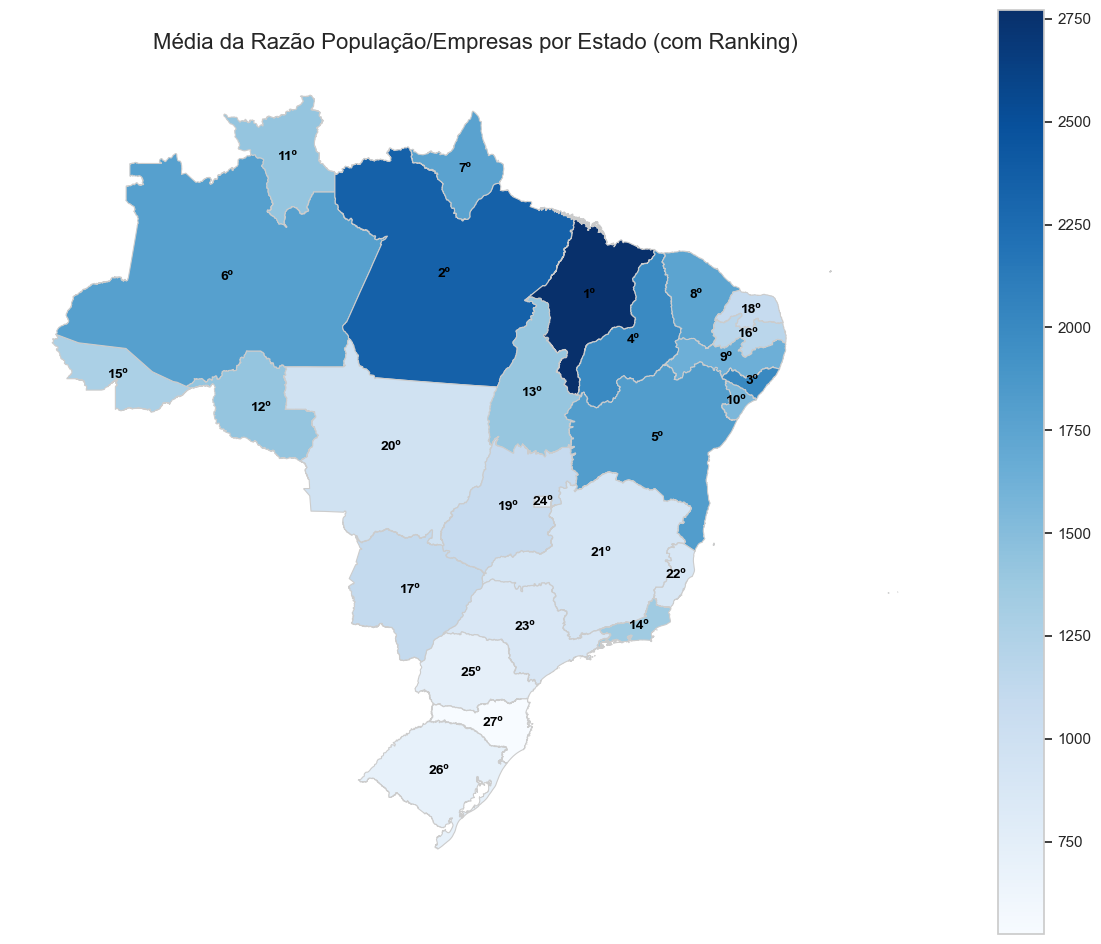

In [16]:
# 📊 GRÁFICO 1: Mapa Coroplético - Média da Razão População/Empresas por Estado (com Ranking)
# -------------------------------------------------------------
# Objetivo: Fornecer uma visão inicial e abrangente da distribuição das médias da razão 
# população/empresas por estado no Brasil, destacando o ranking diretamente no mapa.
# -------------------------------------------------------------

# 🔄 1. Calcular a média da razão população/empresas e o ranking
medias_estados = (
    df_final.groupby('estado')['razao_populacao_empresas']
    .mean()
    .reset_index()
    .rename(columns={'razao_populacao_empresas': 'media_razao'})
)
medias_estados['ranking'] = (
    medias_estados['media_razao']
    .rank(ascending=False, method='dense')
    .astype(int)
)

# 🔄 2. Carregar os dados geoespaciais e ajustar nomes
estados = read_state()
estados['name_state_lower'] = estados['name_state'].str.lower().str.strip()
medias_estados['estado'] = medias_estados['estado'].str.lower().str.strip()

# 🔄 3. Corrigir a grafia do Espírito Santo no geoespacial
estados['name_state_lower'] = estados['name_state_lower'].replace('espirito santo', 'espírito santo')

# 🔄 4. Mesclar os dados geoespaciais com as médias calculadas
mapa_brasil = estados.merge(medias_estados, left_on='name_state_lower', right_on='estado', how='left')

# 🔄 5. Criar o mapa coroplético
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

mapa_brasil.plot(
    column='media_razao',  # Coluna de valores a serem plotados
    cmap='Blues',  # Esquema de cores
    linewidth=0.8,  # Espessura das bordas
    ax=ax,  # Eixo de plotagem
    edgecolor='0.8',  # Cor das bordas
    legend=True  # Exibir a legenda
)

# 🔄 6. Adicionar os rankings no centro dos estados com o símbolo "º"
for x, y, label in zip(mapa_brasil.geometry.centroid.x, mapa_brasil.geometry.centroid.y, mapa_brasil['ranking']):
    if not pd.isna(label):  # Evitar NaNs
        ax.text(x, y, f"{int(label)}º", fontsize=10, ha='center', va='center', color='black', weight='bold')

# 🔄 7. Ajustar o título e personalizações
plt.title('Média da Razão População/Empresas por Estado (com Ranking)', fontsize=16)
ax.set_axis_off()  # Remover os eixos para deixar o mapa mais limpo

# 🔄 8. Exibir o gráfico
plt.show()

### 💡 **Observações Iniciais - Mapa Coroplético: Média da Razão População/Empresas por Estado (com Ranking)**

**Contexto de Negócio:**  
A visualização inicial nos fornece um panorama claro de como está a distribuição da razão entre a população economicamente interessante (38-58 anos) e o número de empresas de construção civil em cada estado brasileiro. Esse índice é um ponto de partida crucial para identificar potenciais oportunidades e regiões mais saturadas.

---

#### 🔍 **Pontos de Destaque:**
1. **Alta razão (oportunidades futuras potenciais):**
   - **Maranhão (1º), Pará (2º), Alagoas (3º)**:  
     Esses estados apresentam os valores mais altos de razão, indicando uma população significativa na faixa etária de interesse em comparação ao número de empresas ativas. Isso pode significar uma demanda potencial ainda não plenamente explorada por construtoras.

2. **Razões moderadas (oportunidades de crescimento):**
   - **Bahia (5º), Amazonas (6º), Tocantins (13º):**  
     Apesar de estarem entre os primeiros colocados, a presença moderada de empresas sugere que o mercado pode estar em fase de expansão. Esses estados merecem análises detalhadas para confirmar o potencial.

3. **Baixa razão (possível saturação ou alta concorrência):**
   - **São Paulo (25º), Distrito Federal (24º), Santa Catarina (27º):**  
     Estados com grande concentração de empresas e, possivelmente, um mercado já maduro ou saturado. Como discutido, estados como Santa Catarina e São Paulo podem ter baixa razão devido à valorização do mercado imobiliário, mas isso não significa ausência de oportunidades. A análise do perfil de investimento é fundamental.

---

#### ⚠️ **Considerações Importantes:**
- A razão por si só não determina diretamente se há saturação ou oportunidade. É preciso analisar junto aos gráficos temporais e considerar outros fatores, como o crescimento populacional e a valorização imobiliária.
- O contexto de cidades específicas dentro dos estados pode diferir. Por exemplo, Santa Catarina aparece com baixa razão, mas cidades como Balneário Camboriú e Itajaí são destaques nacionais em valorização imobiliária.

---

#### 🔮 **Próximos Passos:**
- **Gráficos de barras:** Visualizar detalhadamente as médias e como os estados se comparam entre si.
- **Evolução temporal:** Observar se os padrões temporais indicam uma queda ou aumento na razão ao longo do tempo, especialmente durante a pandemia.

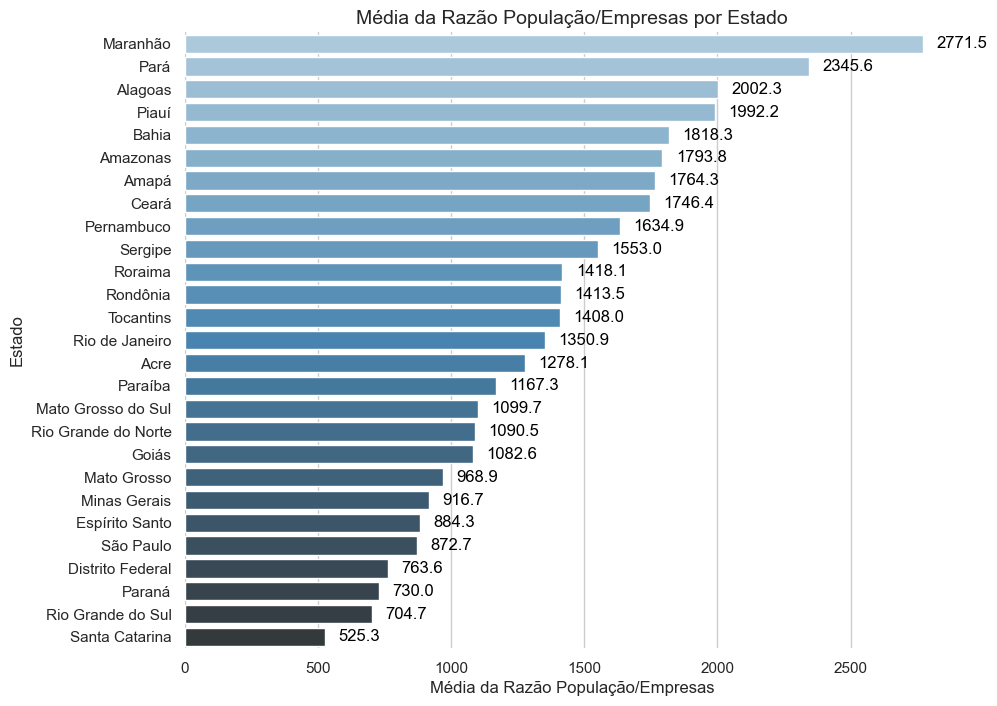

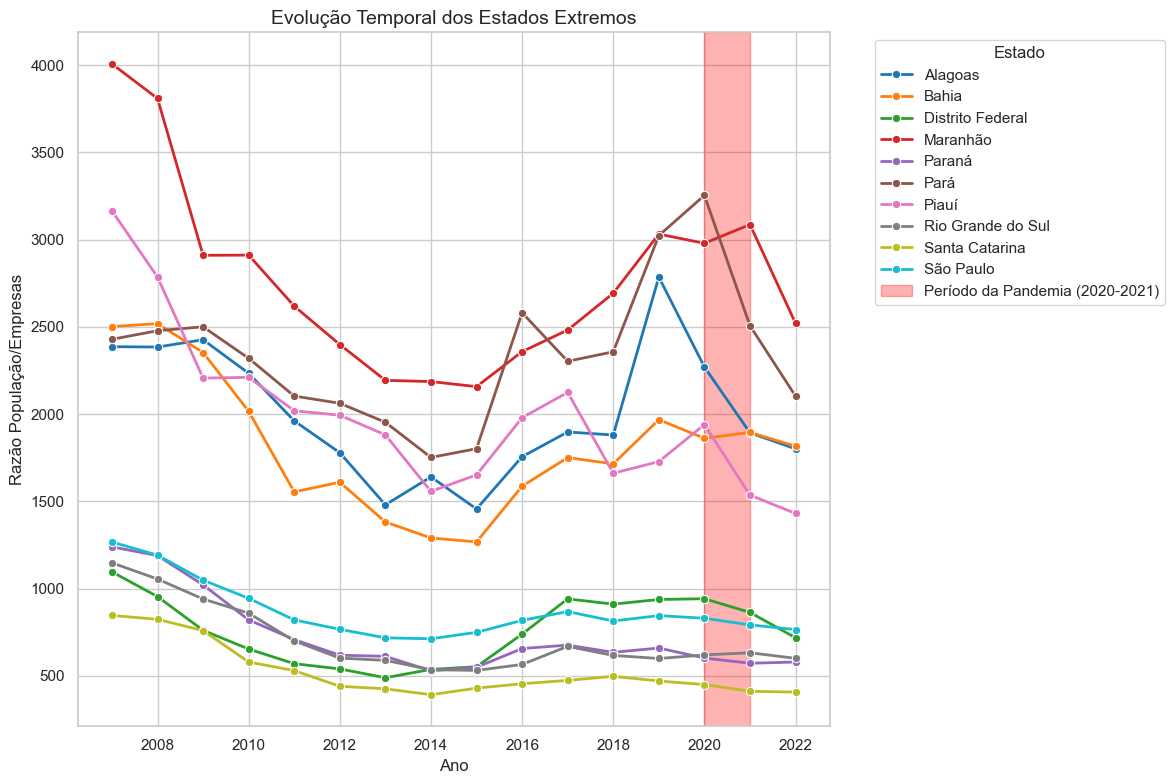

In [17]:
# 🔄 média da razão para visualização
medias_estados = (
    df_final.groupby('estado')['razao_populacao_empresas']
    .mean()
    .reset_index()
    .rename(columns={'razao_populacao_empresas': 'media_razao'})
    .sort_values(by='media_razao', ascending=False)
)

# 📊 GRÁFICO 1: Média da Razão População/Empresas por Estado
# -------------------------------------------------------------
# Objetivo: Visualizar a média da razão população/empresas por estado, destacando 
# quais estados possuem a maior ou menor média ao longo do período analisado (2007-2020).
# -------------------------------------------------------------

plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# 🔹 Criar o barplot com cores baseadas na escala de azul
ax = sns.barplot(
    data=medias_estados,
    x='media_razao',
    y='estado',
    palette='Blues_d',
    hue='estado',  # Associar a paleta ao estado
    legend=False  # Desativar a legenda
)

# 🔹 Adicionar valores numéricos ao final de cada barra
for i, (valor, estado) in enumerate(zip(medias_estados['media_razao'], medias_estados['estado'])):
    ax.text(valor + 50, i, f"{valor:.1f}", color='black', va='center')

# 🔹 Ajustar os rótulos e título
plt.title('Média da Razão População/Empresas por Estado', fontsize=14)
plt.xlabel('Média da Razão População/Empresas')
plt.ylabel('Estado')

# 🔹 Remover a linha de grade vertical para um visual mais limpo
sns.despine(left=True, bottom=True)

# 🔹 Exibir o gráfico
plt.show()


# 📊 GRÁFICO 2: Evolução Temporal dos Estados Extremos
# -------------------------------------------------------------
# Objetivo: Mostrar a evolução temporal da razão população/empresas para os 5 estados 
# com as maiores e menores médias, destacando o impacto da pandemia (2020-2021).
# -------------------------------------------------------------

# 🔄 Definir os estados extremos (5 maiores e 5 menores) novamente se necessário
top_5_estados = medias_estados.head(5)['estado'].tolist()
bottom_5_estados = medias_estados.tail(5)['estado'].tolist()

# 🔄 Filtrar os dados para os estados extremos
df_top_bottom = df_final[df_final['estado'].isin(top_5_estados + bottom_5_estados)]

# 🔹 Criar o gráfico de linhas
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df_top_bottom,
    x='ano',
    y='razao_populacao_empresas',
    hue='estado',
    marker='o',
    linewidth=2,
    palette='tab10'
)

# 🔹 Adicionar faixa de sombra para o período da pandemia (2020-2021)
plt.axvspan(2020, 2021, color='red', alpha=0.3, label='Período da Pandemia (2020-2021)')

# 🔹 Ajustes de título, rótulos e grade
plt.title('Evolução Temporal dos Estados Extremos', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Razão População/Empresas')
plt.grid(True)

# 🔹 Ajustar a legenda para fora do gráfico
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 🔹 Exibir o gráfico
plt.show()

### 💡 **Observações: Interpretação da Razão População/Empresas e Contextualização Regional**

**Análise Geral:**  
- A razão população/empresas por estado apresenta uma distribuição significativa, com **Maranhão (2771,5)** e **Pará (2345,6)** liderando, enquanto **Santa Catarina (525,3)** e **Rio Grande do Sul (704,7)** estão entre os menores valores.  
- Estados com uma **alta razão**, como **Maranhão, Pará e Alagoas**, indicam uma potencial **suboferta de empresas em relação à população**, sugerindo oportunidades de expansão, especialmente para empresas de médio a grande porte.  
- Já os estados com **baixa razão**, como **Santa Catarina e São Paulo**, podem indicar uma **maior saturação do mercado** ou, como veremos, estar associados a mercados mais maduros e valorizados.

---

**Impacto Regional e de Mercado:**  
- Estados como **Santa Catarina**, **São Paulo** e **Paraná**, apesar de apresentarem uma baixa razão, possuem um mercado imobiliário altamente segmentado e competitivo.  
- De acordo com o **Índice FipeZAP de janeiro de 2025**, as cidades de Santa Catarina dominam o ranking do metro quadrado mais caro do Brasil, com destaque para:  
  - **Balneário Camboriú (R$ 13.911,00/m²)** - o mais caro do Brasil.  
  - **Itapema, Itajaí e Florianópolis**, também entre os primeiros colocados.  
- Isso sugere que a baixa razão nesses locais não indica necessariamente saturação, mas sim um mercado de **alto valor agregado**, com foco em empreendimentos de luxo e consumidores de alta renda.

---

**Efeitos da Pandemia (2020-2021):**  
- Durante o período da pandemia (destacado na evolução temporal), houve oscilações significativas, especialmente nos estados de maior razão, como Maranhão e Pará.  
- Essa volatilidade pode ser explicada pela desaceleração econômica e os impactos no setor da construção civil durante esse período.

---

**Conclusão e Recomendações:**  
- **Estados de alta razão (ex: Maranhão, Pará, Alagoas):** São indicados para estratégias de expansão, com foco na abertura de novas empresas e projetos de médio porte.  
- **Estados de baixa razão (ex: Santa Catarina, São Paulo, Paraná):** Demandam uma análise estratégica mais refinada. Embora a concorrência seja elevada, oportunidades existem em nichos de luxo e empreendimentos de alto padrão, especialmente nas regiões com alto valor por metro quadrado.

Esta análise destaca a importância de **não interpretar a razão de maneira isolada**, mas integrá-la ao contexto econômico e imobiliário de cada região para identificar as oportunidades reais.


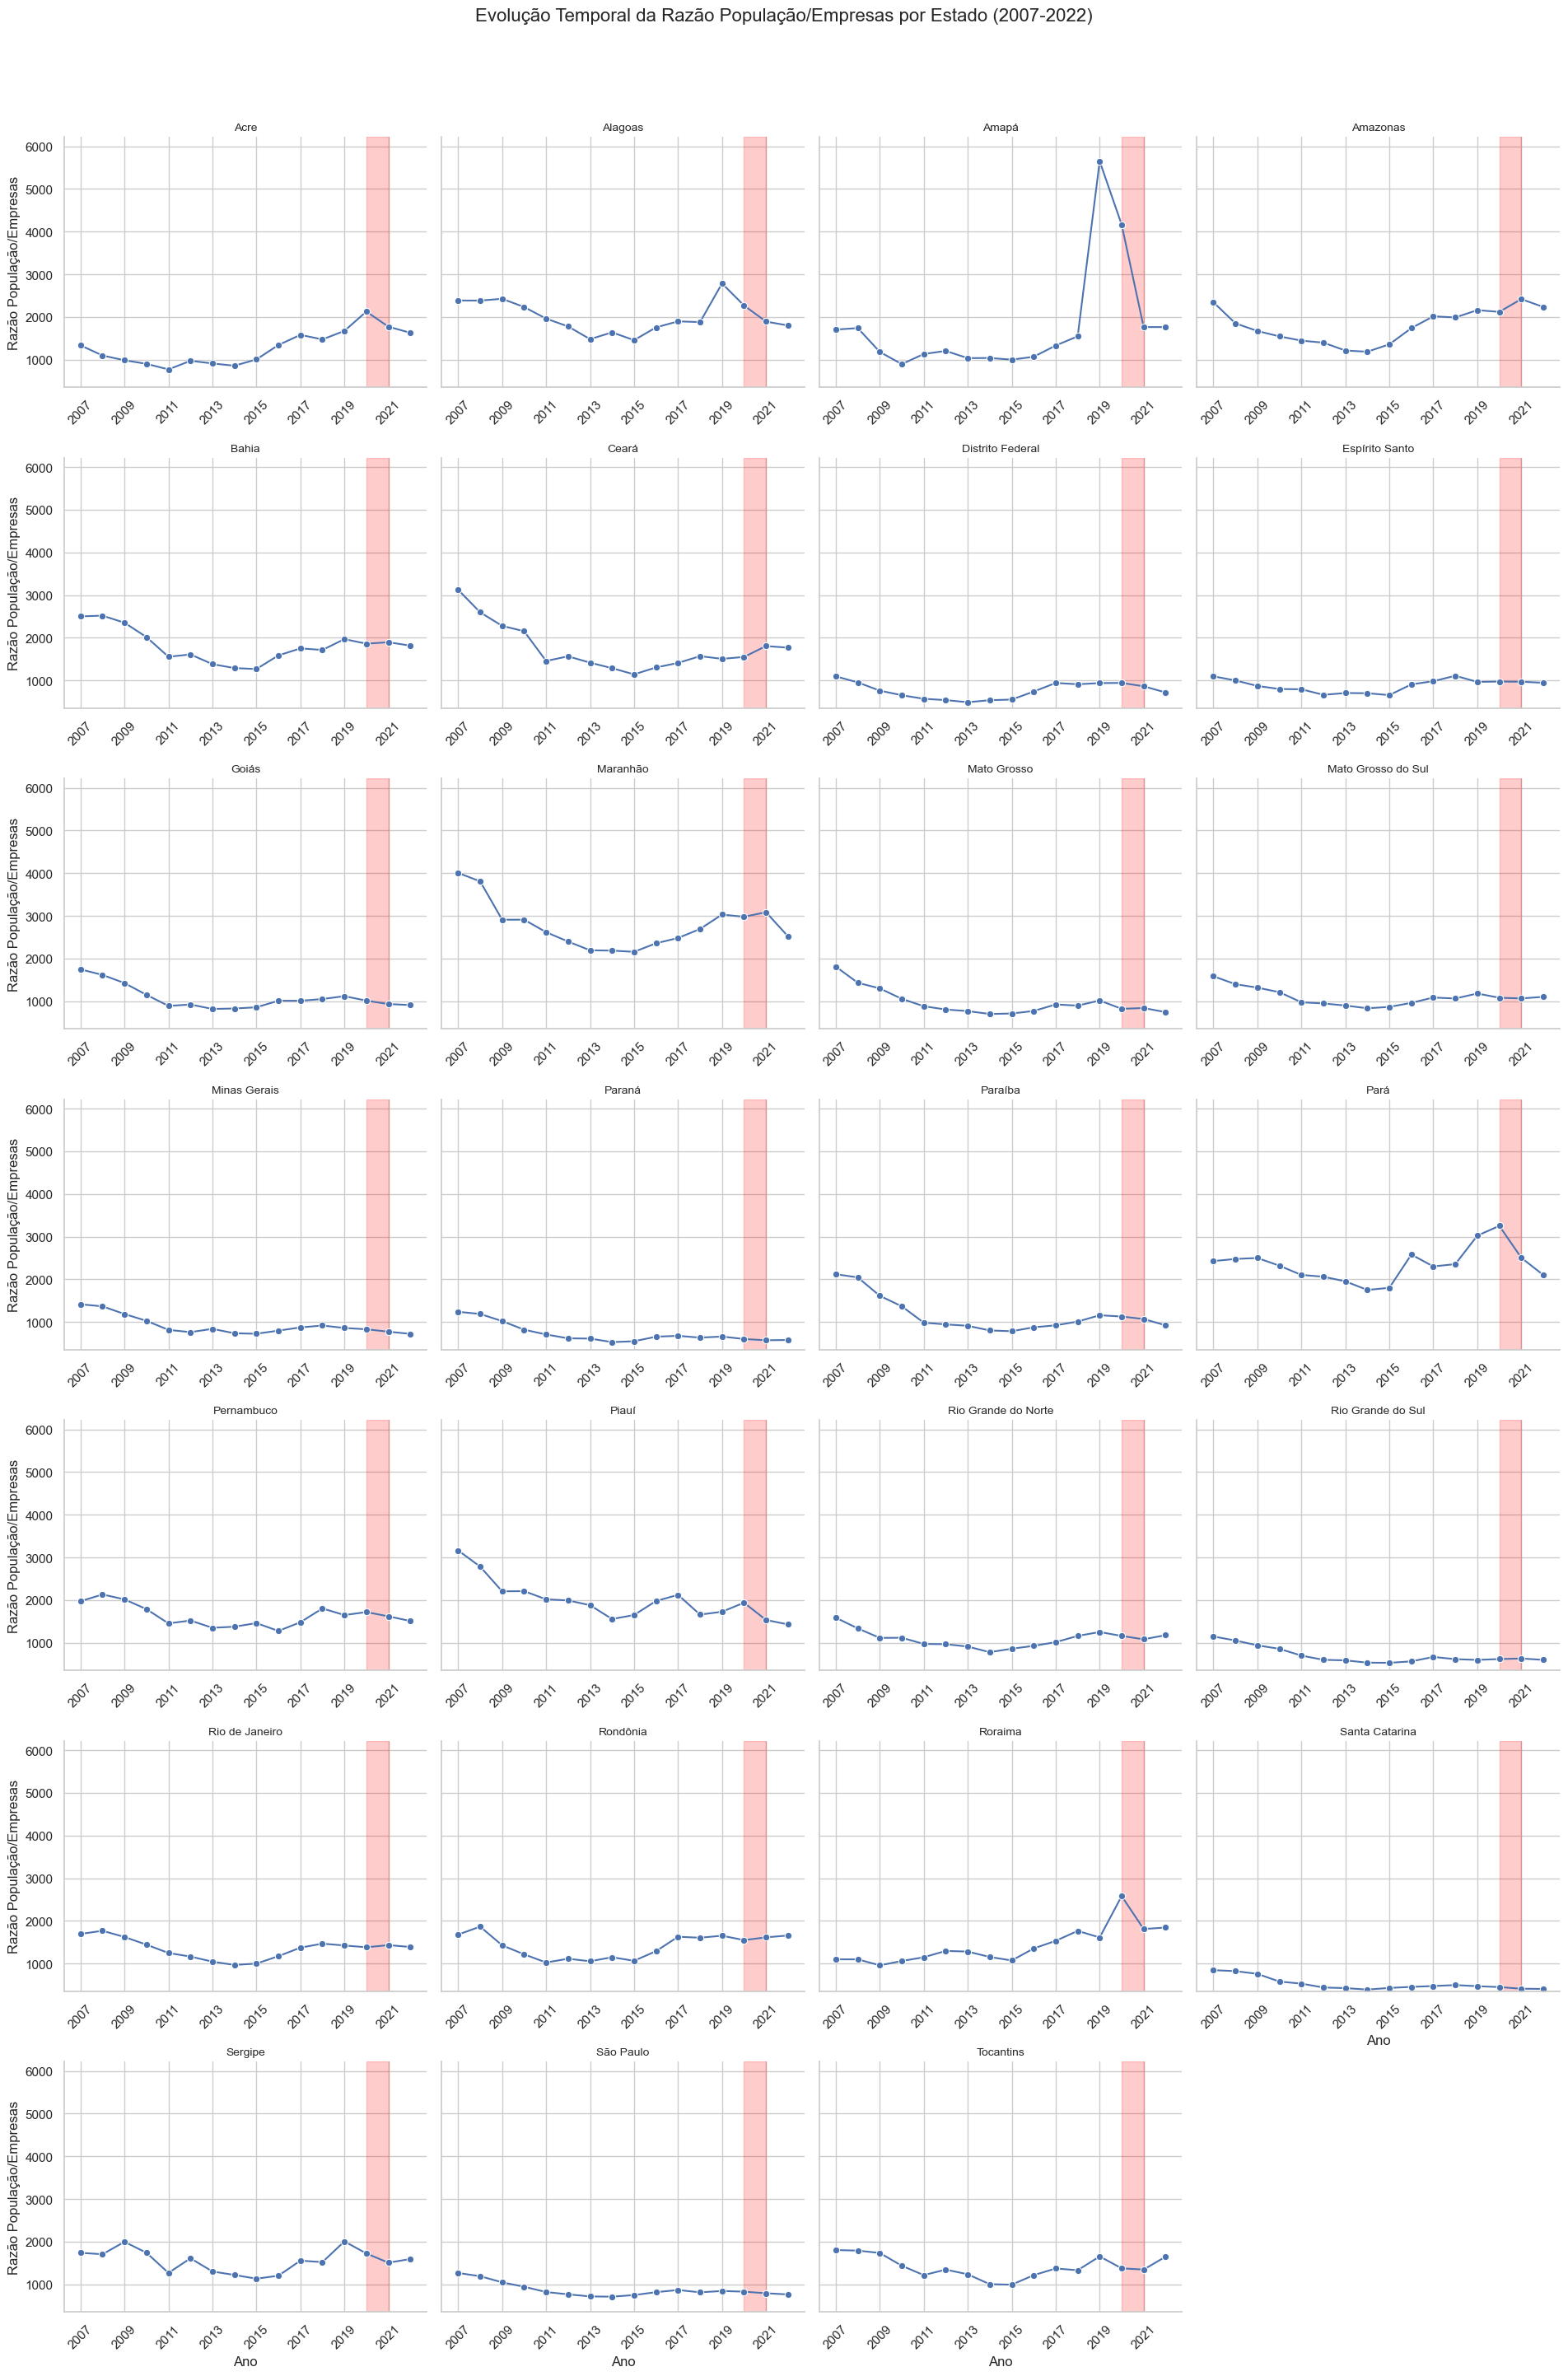

In [18]:
# 📊 GRÁFICO: Evolução Temporal da Razão População/Empresas por Estado
# -------------------------------------------------------------
# Objetivo: Visualizar a evolução temporal da razão população/empresas para todos os estados brasileiros,
# permitindo identificar tendências de crescimento, queda ou estabilidade.
# A escala fixa no eixo y facilita a comparação direta entre os estados.
# -------------------------------------------------------------

# 🔄 Definir o intervalo fixo para o eixo y com uma margem de segurança (+/- 10%)
y_limite_min = df_final['razao_populacao_empresas'].min() * 0.9
y_limite_max = df_final['razao_populacao_empresas'].max() * 1.1

# 🔄 Criar o FacetGrid para desenhar gráficos separados para cada estado
g = sns.FacetGrid(
    data=df_final,
    col="estado",  # Um gráfico por estado
    col_wrap=4,  # 4 gráficos por linha
    height=4,  # Altura de cada gráfico
    aspect=1.2,  # Proporção largura/altura
    sharey=True  # Compartilhar o mesmo eixo y
)

# 🔄 Mapear o gráfico de linha com marcador para cada ano
g.map_dataframe(
    sns.lineplot, 
    x="ano", 
    y="razao_populacao_empresas", 
    marker="o"
)

# 🔄 Definir os limites fixos do eixo y
g.set(ylim=(y_limite_min, y_limite_max))

# 🔄 Destacar o período da pandemia (2020-2021) com uma faixa vermelha transparente
for ax in g.axes.flat:
    ax.axvspan(2020, 2021, color='red', alpha=0.2)
    ax.set_xticks(range(2007, 2023, 2))  # Definir os ticks do eixo x a cada 2 anos
    ax.set_xticklabels(range(2007, 2023, 2), rotation=45)  # Rotacionar os rótulos para legibilidade

# 🔄 Forçar exibição dos rótulos do eixo x em todos os gráficos
for ax in g.axes.flat:
    ax.tick_params(axis='x', which='both', labelbottom=True)  # Mostrar os rótulos em todos

# 🔄 Ajustes de rótulos, títulos e legendas
g.set_axis_labels("Ano", "Razão População/Empresas")  # Rótulos dos eixos
g.set_titles(col_template="{col_name}", size=10)  # Título de cada gráfico com o nome do estado
g.fig.suptitle('Evolução Temporal da Razão População/Empresas por Estado (2007-2022)', y=1.03, fontsize=16)

# 🔄 Exibir o layout ajustado e o gráfico final
plt.tight_layout()  # Ajustar espaçamento entre gráficos
plt.show()

#### 💡 **Observações: Análise Temporal da Razão População/Empresas por Estado**

**Análise Geral:**

- A evolução temporal da razão população/empresas por estado revela as mudanças nas dinâmicas de mercado ao longo dos anos, destacando tendências de crescimento, estabilização e queda.
- O período de 2020-2021, impactado pela pandemia, gerou oscilações significativas, com estados como **Roraima** e **Amapá** apresentando picos marcantes, possivelmente refletindo mudanças econômicas ou estímulos em determinados setores.

---

**Pontos de Destaque:**

1. **Aumento Significativo da Razão:**
   - **Amapá (2017):** Apresenta um pico expressivo, provavelmente resultante de mudanças no mercado local, como novos projetos ou crescimento de empresas no estado.
   - **Roraima (2020):** O aumento acentuado da razão população/empresas pode indicar uma recuperação ou impulso no número de empresas, possivelmente devido a medidas emergenciais ou adaptação à pandemia.
   - **Maranhão e Pará:** Com uma razão mais alta ao longo dos anos, esses estados destacam-se com um crescimento no número de empresas em relação à população, sugerindo **oportunidades de expansão** no mercado local, possivelmente no setor de construção civil, onde há suboferta de empresas.

2. **Estabilidade ou Queda:**
   - **Santa Catarina e São Paulo:** Embora tenham uma **razão população/empresas mais baixa**, a estabilidade observada nas linhas de tendência e as quedas graduais indicam que esses mercados estão em estágios mais avançados de maturação. Isso pode ser interpretado como um mercado **saturado** ou com **alta concorrência**, onde a diferenciação e a adaptação são essenciais para novos negócios.
   - **Distrito Federal:** Apresenta uma linha estável, com variação mínima, sugerindo que o mercado está **consolidado**, com baixa necessidade de adaptação e poucas flutuações.

3. **Impacto da Pandemia (2020-2021):**
   - O impacto da pandemia é claro nas oscilações observadas, especialmente em estados como **Roraima** e **Amapá**, onde houve um aumento acentuado na razão população/empresas, possivelmente devido a adaptações rápidas no setor de construção civil ou outras áreas.
   - Já estados como **São Paulo** e **Distrito Federal** apresentaram uma evolução mais estável, possivelmente refletindo a resiliência desses mercados mais maduros.

---

**Considerações Importantes:**
- **Razão População/Empresas em crescimento:** A **razão alta** em estados como Maranhão, Pará e Alagoas indica **oportunidades de expansão**, mas também uma possível **suboferta de empresas** em comparação à população, sugerindo que a demanda ainda pode ser atendida com mais oferta.
- **Razão baixa e mercados saturados:** Estados com uma **razão baixa**, como Santa Catarina e São Paulo, podem estar enfrentando **alta concorrência** ou **mercados maduros**, mas ainda assim, a **valorização imobiliária** pode ser um fator a ser explorado. A presença de **empreendimentos de luxo** pode ser uma oportunidade a ser investigada mais a fundo.

---

Esta análise temporal destaca as flutuações de mercado causadas por diversos fatores, como o crescimento populacional, a pandemia e a dinâmica local de empresas, e mostra como a **razão população/empresas** pode ser um indicativo crucial para **estratégias de investimento e expansão**.

### 🔚 **Conclusão e Observações Finais da EDA**

## 🔍 **Resumo das Descobertas**
Durante a análise exploratória, focamos na **razão população/empresas** como o principal indicador para identificar **oportunidades de crescimento** e possíveis áreas de **saturação ou alta concorrência** no setor de construção civil. Através de análises **geográficas, temporais e contextuais**, observamos os seguintes pontos principais:

1. **Alta Razão (Oportunidades de Expansão):**
   - Estados como **Maranhão, Pará e Alagoas** destacaram-se por apresentar uma **alta razão**, indicando uma **suboferta de empresas** em comparação ao potencial populacional, sugerindo **espaço para novas empresas**.

2. **Baixa Razão (Mercados Saturados ou Maduros):**
   - Estados como **São Paulo, Santa Catarina e Distrito Federal** apresentaram **uma razão baixa e estabilidade**, mas isso foi associado a **mercados imobiliários valorizados e segmentados**, onde as oportunidades estão mais direcionadas a **nichos específicos**, como empreendimentos de luxo.

3. **Impacto da Pandemia:**
   - Os estados **Roraima e Amapá** tiveram **picos significativos durante a pandemia (2020-2021)**, possivelmente como resposta a estímulos econômicos ou adaptações do mercado.

---

## 🚧 **Limitações da Análise**
- **Variáveis Complementares:** Embora a razão população/empresas tenha sido o **foco central**, outras variáveis econômicas, como receita bruta e valor de produção, poderiam ser exploradas de forma mais aprofundada.  
- **Extensão Temporal:** O prazo limitado nos impediu de explorar **correlações mais profundas** entre as variáveis.  
- **Dados Regionais e Locais:** A análise agregada por estado foi adequada para a visão inicial, mas **estudos por microrregião ou cidade** poderiam revelar padrões mais específicos.

---

## 🔮 **Próximos Passos**
1. **Modelagem Preditiva:**  
   - Realizar uma **regressão múltipla para prever a razão população/empresas** nos anos de **2020 e 2021**, utilizando as variáveis selecionadas pela análise inicial.  
   - Isso permitirá a possibilidade de predizer cenários futuris e antecipar decisões estratégicas.

2. **Clusterização:**  
   - Com base nas características identificadas, os estados podem ser agrupados para entender padrões semelhantes e desenhar estratégias personalizadas.

3. **Exploração de Cidades-Chave:**  
   - Investigar os **principais polos econômicos** dentro dos estados com alta e baixa razão, buscando oportunidades ocultas.

---

## ✅ **Encerramento da EDA**
A análise exploratória nos permitiu compreender a **dinâmica inicial do mercado** e identificar **pontos críticos** para estratégias de expansão ou consolidação. Apesar das limitações, os insights obtidos até agora forneceram uma base sólida para avançar com as próximas etapas: **modelagem preditiva e clusterização**.

## 7. Previsão Temporal de Estados para 2021-2022 🔮  
[Voltar ao Sumário](#sumário)

Nesta seção, utilizamos dados históricos de 2007 a 2020 para desenvolver um modelo preditivo que estime a **razão população/empresas ativas** para os anos de 2021 e 2022. O objetivo é antecipar tendências regionais, identificando estados com potencial de expansão e aqueles com sinais de saturação no mercado imobiliário, de forma a orientar decisões estratégicas de investimento e alocação de recursos.

---

### 7.1 Contexto e Objetivo  
- **Objetivo de Negócio:** Antecipar mudanças no mercado imobiliário para direcionar investimentos de maneira assertiva, identificando regiões com alto potencial de crescimento ou saturação.
- **Aplicação:** As previsões serão utilizadas para orientar estratégias de expansão e consolidação, ajudando na segmentação do mercado e na otimização dos recursos.

---

### 7.2 Pré-Processamento para a Modelagem Temporal  
1. **Carregamento dos Dados:**  
   - O DataFrame final (`df_final`) é carregado com todas as variáveis relevantes.
   
2. **Seleção de Features:**  
   - **Exclusão:** Removemos variáveis que apresentam redundância ou estão diretamente ligadas ao target (como 'numero_empresas_ativas'), para reduzir o risco de overfitting.
   - **Lista de Exclusão:**  
     - `materiais_construcao`  
     - `materiais_terceiros`  
     - `receita_liquida`  
     - `custos_obras_servicos`  
     - `valor_obras_servicos`  
     - `custos_terceiros`  
     - `consumo_intermediario`  
     - `outros_custos_despesas`  
     - `estado`  
     - `numero_empresas_ativas`
   
   - As features mantidas incluem variáveis financeiras e demográficas relevantes, como:
     - `pessoal_ocupado`
     - `receita_bruta_total`
     - `custos_totais_despesas`
     - `valor_adicionado`
     - `populacao_38_58_anos`
     - (e a variável alvo: `razao_populacao_empresas`)
     
3. **Divisão dos Dados:**  
   - **Histórico (2007-2020):** Usado para treino e teste do modelo.
   - **Previsão (2021-2022):** Reservado para avaliar as previsões futuras.
   - O filtro é aplicado com base na coluna `ano`  para separar os períodos:
     ```python
     df_historico = df_modelo_final.loc[df_modelo_final['ano'] <= 2020]
     df_previsao  = df_modelo_final.loc[df_modelo_final['ano'] > 2020]
     ```
   
4. **Normalização:**  
   - Aplicamos o **StandardScaler** para padronizar as features, garantindo que variáveis com diferentes escalas não dominem o treinamento.
     
  
5. - **Definição das métricas de avaliação:** Estabelecemos **MAE (Erro Absoluto Médio)** e **RMSE (Raiz do Erro Quadrático Médio)** como métricas para medir o desempenho.  
- **Separação dos dados em conjuntos de treino e teste:** Utilizamos dados históricos até 2020 para o treino, e prever 2021 e 2022.

---

### 7.3 Estabelecimento do Baseline e Seleção de Modelos  
- **Baseline:**  
  - Um modelo de regressão linear múltipla é utilizado como referência mínima para as previsões.
  
- **Comparação de Modelos:**  
  - Testamos modelos de previsão como XGBoost, LightGBM e CatBoost em configurações padrão.
  - Os resultados indicaram que o **XGBoost** apresentou melhores métricas (menor RMSE e MAE, e maior R²).
  
- **Foco no XGBoost:**  
  - A partir daí, concentramos nossos esforços no ajuste fino do XGBoost, otimizando hiperparâmetros para reduzir os erros e melhorar a capacidade preditiva.

---

### 7.4 Resultados Previstos para 2021-2022  
Após o ajuste fino do XGBoost (que apresentou os melhores resultados), aplicamos o modelo no conjunto de previsão (dados de 2021-2022) para validar a sua capacidade de generalização.  
- **Desempenho:**  
  - O modelo ajustado apresentou métricas aprimoradas, demonstrando uma boa capacidade de capturar as tendências do mercado imobiliário, o que é fundamental para a tomada de decisões estratégicas.

---

**Conclusão:**  
A previsão temporal fornece uma visão antecipada sobre o comportamento dos estados, permitindo que a empresa identifique oportunidades e riscos de forma proativa. O fluxo de trabalho implementado – do pré-processamento, passando pela comparação de modelos (com o XGBoost se destacando) até o ajuste fino e a validação em dados futuros – estabelece uma base sólida para a estratégia de segmentação e alocação de recursos.  
O próximo passo será utilizar esses insights para agrupar os estados em clusters com padrões semelhantes, ampliando o suporte para decisões estratégicas.

---

### **7.1 Contexto e Objetivo da Modelagem Preditiva**

**Contexto:**  
O mercado imobiliário brasileiro apresenta variações significativas entre os estados, refletidas na disparidade entre a população potencial e o número de empresas de construção. Essa diferença indica que, enquanto alguns estados oferecem espaço para novas operações, outros já se encontram em estágios de consolidação ou saturação. Antecipar essas tendências é fundamental para que as empresas possam planejar sua expansão e ajustar estratégias de investimento de forma proativa.

**Objetivo:**  
O principal objetivo desta modelagem preditiva é estimar a razão população/empresas para os anos de 2021 e 2022, utilizando os dados históricos (2007-2020). Com essa previsão, buscamos:

1. **Identificar Estados com Alto Potencial de Crescimento:**  
   Prever onde a razão é alta, sugerindo uma suboferta de empresas em relação à população potencial, indicando oportunidades de expansão.

2. **Detectar Mercados Saturados:**  
   Identificar estados onde a razão é baixa, sinalizando mercados maduros ou saturados, onde o investimento pode ser mais arriscado.

3. **Apoiar a Clusterização e Estratégias Regionais:**  
   Utilizar as previsões para agrupar estados com comportamentos semelhantes, facilitando a definição de estratégias regionais customizadas.

4. **Orientar Decisões Estratégicas:**  
   Fornecer uma base sólida para a alocação de recursos e investimentos, permitindo ações proativas antes que as condições de mercado se consolidem.

**Abordagem Metodológica:**  
Inicialmente, estabelecemos um baseline com um modelo de regressão linear múltipla para servir como referência mínima. Em seguida, foram testados diversos estimadores – XGBoost, LightGBM e CatBoost – para comparar o desempenho. Os testes indicaram que o XGBoost, com hiperparâmetros otimizados, apresentou o melhor equilíbrio entre erro (RMSE e MAE) e capacidade explicativa (R²). Assim, concentramos os esforços no ajuste fino do XGBoost para gerar as previsões finais.

**Justificativa para a Modelagem Temporal:**  
A previsão baseada em séries temporais permite capturar os padrões históricos e antecipar tendências futuras, possibilitando:
- **Ação proativa:** Antecipar mudanças de mercado e direcionar investimentos antes que o cenário se consolide.
- **Integração com a Clusterização:** As previsões alimentarão a próxima etapa de clusterização, permitindo agrupar estados com comportamentos semelhantes.
- **Flexibilidade e robustez:** A abordagem permite atualizações conforme novos dados se tornam disponíveis, mantendo o modelo relevante a longo prazo.

---

### **7.2 Pré-Processamento para a Modelagem Temporal** <a id="7.2-pré-processamento-para-a-modelagem-temporal"></a>  

Para garantir que os dados estejam adequados para a previsão da razão população/empresas, seguimos um processo estruturado de pré-processamento, como descrito abaixo:

---

1. **Carregamento dos Dados Originais**  
   - Utilizamos o dataset completo, que contém variáveis econômicas, demográficas e financeiras relacionadas ao setor imobiliário, cobrindo o período de **2007 a 2022**.  
   - Nessa etapa, asseguramos que todas as informações relevantes estejam presentes para garantir previsões robustas.

---

2. **Seleção de Variáveis para o Modelo Preditivo**  
   - Removemos variáveis redundantes, colineares ou diretamente ligadas ao target (para evitar overfitting).  
   - As variáveis finais foram selecionadas considerando sua relevância no contexto do mercado imobiliário e sua contribuição informativa para a previsão da razão população/empresas.

   Variáveis mantidas no modelo incluem:
   - `receita_bruta_total`: Indicador do desempenho econômico do setor.
   - `pessoal_ocupado`: Representa a disponibilidade de mão de obra no setor.
   - `valor_adicionado`: Contribuição líquida das empresas ao setor.
   - `populacao_38_58_anos`: Público-alvo predominante no mercado imobiliário.
   - `custos_totais_despesas`: Captura os gastos operacionais das empresas.  
   - `razao_populacao_empresas`: Variável alvo da previsão.

---

3. **Divisão Temporal e Separação dos Dados**  
   - **Conjunto Histórico:** Dados de **2007 a 2020**, usados para treino e teste do modelo.  
   - **Conjunto de Previsão:** Dados reais de **2021 e 2022**, mantidos para avaliação futura.  
   - Essa separação temporal evita o vazamento de informações futuras, garantindo previsões realistas.

---

4. **Separação das Variáveis Explicativas (X) e Alvo (y)**  
   - **X:** Contém as variáveis explicativas usadas no treinamento.  
   - **y:** A variável alvo que queremos prever, a razão população/empresas.  
   - Dividimos os dados sequencialmente (80% treino e 20% teste) para respeitar a cronologia e manter a integridade da série temporal.

---

5. **Normalização das Variáveis**  
   - Utilizamos o **StandardScaler** para padronizar os dados, transformando as variáveis para terem média 0 e desvio padrão 1.  
   - O ajuste do scaler é feito apenas no conjunto de treino, aplicando a mesma transformação no conjunto de teste para evitar vazamento de informações.

---

6. **Definição das Métricas de Avaliação**  
   - Estabelecemos as seguintes métricas para medir o desempenho dos modelos preditivos:
     - **RMSE (Raiz do Erro Quadrático Médio):** Penaliza mais fortemente erros maiores, garantindo previsões robustas.
     - **MAE (Erro Absoluto Médio):** Mede o erro médio absoluto, útil para uma visão clara da precisão geral.
     - **R² (Coeficiente de Determinação):** Indica o quanto da variabilidade do target o modelo consegue explicar.

---

Com essas etapas, garantimos que o modelo seja treinado com dados limpos, bem estruturados e prontos para gerar previsões consistentes, auxiliando na antecipação de decisões estratégicas no setor imobiliário.

In [19]:
# ------------------------------------------------
# Etapa 1: Carregamento de Dataframe Final
# ------------------------------------------------

# Exibindo as primeiras linhas do DataFrame com os dados finais
print("DataFrame Original com os Dados Finais:")
df_final.head()

DataFrame Original com os Dados Finais:


,estado,ano,materiais_construcao,consumo_intermediario,materiais_terceiros,numero_empresas_ativas,outros_custos_despesas,pessoal_ocupado,receita_bruta_total,receita_liquida,remuneracoes,custos_obras_servicos,custos_terceiros,custos_totais_despesas,gastos_pessoal,valor_adicionado,valor_bruto_producao,valor_obras_servicos,populacao_38_58_anos,razao_populacao_empresas
0,Acre,2007,75062000.0,102860000.0,34000.0,89,18982000.0,4230,279427000.0,254127000.0,41883000.0,92158000.0,50000.0,167193000.0,56002000.0,151794000.0,254655000.0,278969000.0,118936,1336.359551
1,Acre,2008,154494000.0,215491000.0,0.0,113,31289000.0,5129,446819000.0,413260000.0,54418000.0,203471000.0,0.0,310690000.0,75930000.0,197500000.0,412991000.0,443351000.0,124039,1097.690265
2,Acre,2009,151690000.0,223251000.0,4894000.0,131,34984000.0,6398,543075000.0,483182000.0,62213000.0,203152000.0,5129000.0,329485000.0,86220000.0,244349000.0,467599000.0,521595000.0,129247,986.618321
3,Acre,2010,232777000.0,312247000.0,3816000.0,149,69492000.0,6502,628673000.0,585984000.0,78055000.0,261823000.0,6249000.0,446763000.0,109200000.0,274928000.0,587176000.0,625113000.0,134483,902.570470
4,Acre,2011,187268000.0,296929000.0,586000.0,181,51628000.0,6818,643797000.0,545296000.0,95666000.0,268742000.0,854000.0,452621000.0,131397000.0,262792000.0,559721000.0,650487000.0,139739,772.038674


In [20]:
# -----------------------------------------------
# Etapa 2: Seleção Ajustada de Features
# -----------------------------------------------

# 🔍 **Explicação Geral:**  
# Mantemos as variáveis financeiras e econômicas úteis, mas removemos aquelas redundantes 
# ou diretamente ligadas ao target (para evitar overfitting).

variaveis_excluir_revisadas = [
    'materiais_construcao',  # Incluído nos custos gerais, redundante
    'materiais_terceiros',  # Já incluso em custos gerais
    'receita_liquida',  # Colinear com receita_bruta_total
    'custos_obras_servicos',  # Parte de custos_totais_despesas
    'valor_obras_servicos',  # Redundante com valor_adicionado
    'custos_terceiros',  # Redundante com custos gerais
    'consumo_intermediario',  # Já englobado nos custos gerais
    'outros_custos_despesas',  # Redundante com custos gerais
    'estado',  # Não relevante após agregação
    'numero_empresas_ativas'  # ⚠️ Relacionado ao target, causa overfitting
]

# 🔧 **Passo 1: Excluir as colunas listadas**
df_modelo_final = df_final.drop(columns=variaveis_excluir_revisadas)

# 🔧 **Passo 2: Verificação das features finais**
print("Features finais após revisão:")
print(df_modelo_final.columns)

# 🔧 **Passo 3: Visualização inicial das primeiras linhas do DataFrame**
print("\nVisualização das primeiras linhas do DataFrame Final:")
df_modelo_final.head()

Features finais após revisão:
Index(['ano', 'pessoal_ocupado', 'receita_bruta_total', 'remuneracoes',
       'custos_totais_despesas', 'gastos_pessoal', 'valor_adicionado',
       'valor_bruto_producao', 'populacao_38_58_anos',
       'razao_populacao_empresas'],
      dtype='object')

Visualização das primeiras linhas do DataFrame Final:


,ano,pessoal_ocupado,receita_bruta_total,remuneracoes,custos_totais_despesas,gastos_pessoal,valor_adicionado,valor_bruto_producao,populacao_38_58_anos,razao_populacao_empresas
0,2007,4230,279427000.0,41883000.0,167193000.0,56002000.0,151794000.0,254655000.0,118936,1336.359551
1,2008,5129,446819000.0,54418000.0,310690000.0,75930000.0,197500000.0,412991000.0,124039,1097.690265
2,2009,6398,543075000.0,62213000.0,329485000.0,86220000.0,244349000.0,467599000.0,129247,986.618321
3,2010,6502,628673000.0,78055000.0,446763000.0,109200000.0,274928000.0,587176000.0,134483,902.570470
4,2011,6818,643797000.0,95666000.0,452621000.0,131397000.0,262792000.0,559721000.0,139739,772.038674


In [21]:
# ------------------------------------------------
# Etapa 3: Separação dos dados históricos (2007-2020) e dados de previsão (2021-2022)
# ------------------------------------------------

# Separar os dados históricos (2007 a 2020) e os dados futuros (2021 e 2022)
# - df_historico: será usado para treino e teste do modelo.
# - df_previsao: será mantido para comparação futura com as previsões feitas pelo modelo.

df_historico = df_modelo_final.loc[df_modelo_final['ano'] <= 2020]  # Inclui dados de 2007 até 2020
df_previsao = df_modelo_final.loc[df_modelo_final['ano'] > 2020]  # Inclui os dados reais de 2021 e 2022

# Por que fazemos essa separação?
# - Evitamos o vazamento de informações futuras. O modelo será treinado sem ter "acesso" aos dados de 2021 e 2022.
# - Isso nos permite uma comparação realista das previsões feitas com os dados futuros reais.

# Exibindo o tamanho dos conjuntos para validação
print(f"Tamanho do conjunto histórico (dados usados no treino e teste): {df_historico.shape}")
print(f"Tamanho do conjunto de previsão (dados reais de 2021-2022): {df_previsao.shape}")

# Exibindo os anos para validação
print(f"Anos no conjunto histórico: {df_historico['ano'].unique().tolist()}")
print(f"Anos no conjunto de previsão: {df_previsao['ano'].unique().tolist()}")

Tamanho do conjunto histórico (dados usados no treino e teste): (378, 10)
Tamanho do conjunto de previsão (dados reais de 2021-2022): (54, 10)
Anos no conjunto histórico: [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Anos no conjunto de previsão: [2021, 2022]


In [22]:
# ------------------------------------------------
# Etapa 4: Preparação dos dados históricos para treino e teste
# ------------------------------------------------

# 1. Separando as features (X) e o target (y)  
# - X: Contém as variáveis explicativas (features) que serão usadas para treinar o modelo.  
# - y: É a variável alvo (target) que queremos prever: a razão população/empresas.  
X = df_historico.drop(columns=['razao_populacao_empresas'])
y = df_historico['razao_populacao_empresas']

# 2. Divisão sequencial: 80% para treino e 20% para teste  
# - Como estamos lidando com uma série temporal, usamos uma divisão sequencial para respeitar a ordem cronológica.  
divisao_treino = int(len(X) * 0.8)  # Calcula 80% do tamanho total

X_train, X_test = X.iloc[:divisao_treino], X.iloc[divisao_treino:]  # Divisão sequencial das features
y_train, y_test = y.iloc[:divisao_treino], y.iloc[divisao_treino:]  # Divisão sequencial do target

# 3. Verificando os tamanhos das amostras  
# - Garantimos que a divisão foi feita corretamente, verificando se os tamanhos dos conjuntos estão alinhados com a proporção 80/20.
print(f"Tamanho do conjunto de treino (X): {X_train.shape}")  # Features do treino
print(f"Tamanho do conjunto de treino (y): {y_train.shape}")  # Target do treino
print(f"Tamanho do conjunto de teste (X): {X_test.shape}")  # Features do teste
print(f"Tamanho do conjunto de teste (y): {y_test.shape}")  # Target do teste

Tamanho do conjunto de treino (X): (302, 9)
Tamanho do conjunto de treino (y): (302,)
Tamanho do conjunto de teste (X): (76, 9)
Tamanho do conjunto de teste (y): (76,)


In [23]:
# ------------------------------------------------
# Etapa 5: Aplicando o StandardScaler sem vazamento
# ------------------------------------------------

# 1. Inicializando o StandardScaler  
# - O StandardScaler é usado para padronizar os dados, transformando-os para terem média 0 e desvio padrão 1.  
# - Isso garante que nenhuma variável domine o aprendizado do modelo por conta de escalas diferentes.  
scaler = StandardScaler()

# 2. Ajustando o scaler apenas no conjunto de treino  
# - O scaler "aprende" a média e o desvio padrão com base apenas nos dados de treino (fit).  
# - Isso é importante para evitar vazamento de informações do conjunto de teste.  
X_train_scaled = scaler.fit_transform(X_train)

# 3. Aplicando a mesma transformação no conjunto de teste  
# - Usamos os parâmetros de média e desvio padrão calculados no treino para padronizar os dados de teste (transform).  
X_test_scaled = scaler.transform(X_test)

# 4. Verificando os resultados  
# - Confirmamos que as dimensões dos dados escalados são as mesmas dos dados originais.  
print(f"Tamanho do conjunto de treino escalado: {X_train_scaled.shape}")
print(f"Tamanho do conjunto de teste escalado: {X_test_scaled.shape}")

Tamanho do conjunto de treino escalado: (302, 9)
Tamanho do conjunto de teste escalado: (76, 9)


------------------------------------------------
Etapa 6: Escolha da Métrica de Avaliação

------------------------------------------------


A escolha da métrica de avaliação é fundamental para garantir que o modelo seja avaliado de maneira precisa e alinhada ao objetivo do projeto. Como estamos prevendo a razão população/empresas para identificar antecipadamente oportunidades e evitar alocação incorreta de recursos, precisamos ser assertivos e penalizar grandes desvios.

📊 **Métrica Principal: RMSE (Raiz do Erro Quadrático Médio)**  
**Por que RMSE?**  
- Penaliza mais fortemente os erros maiores, evitando grandes desvios nas previsões.  
- Preserva a unidade da variável alvo, facilitando a interpretação prática dos erros.  
- Ideal quando erros grandes têm impacto negativo significativo, como no nosso caso, onde decisões erradas podem gerar altos custos.

---

🔍 **Métrica Complementar: MAE (Erro Absoluto Médio)**  
**Por que MAE?**  
- Mede o erro médio absoluto e é menos sensível a outliers.  
- Fornece uma ideia clara do erro médio em unidades reais, ajudando a avaliar a precisão geral do modelo.  
- Complementa o RMSE, oferecendo uma visão equilibrada dos erros, sem supervalorizar grandes desvios.

---

🛠️ **Métrica de Suporte: R² (Coeficiente de Determinação)**  
**Por que R²?**  
- Monitora o ajuste geral do modelo, indicando quanto da variabilidade do target o modelo consegue explicar.  
- Não será a métrica principal, pois não mede diretamente os erros em unidades reais, mas ajuda a verificar se o modelo está explicando bem o fenômeno como um todo.

---

#### 💡 **Observações**  

### **Análise do Pré-Processamento:**  
- O carregamento inicial do DataFrame garantiu a presença de todas as variáveis econômicas, financeiras e demográficas relevantes para a modelagem preditiva.  
- A seleção ajustada de features foi crucial para evitar colinearidade e reduzir o risco de overfitting, garantindo que o modelo trabalhe com informações não redundantes.  
- A separação dos dados em históricos (2007-2020) e futuros (2021-2022) foi feita corretamente, prevenindo o vazamento de informações futuras e assegurando uma validação realista das previsões.  
- A divisão sequencial dos dados em treino (80%) e teste (20%) respeitou a ordem temporal, refletindo um cenário prático de previsão.  
- A aplicação do **StandardScaler** sem vazamento garantiu a padronização das variáveis numéricas, impedindo que diferenças de escala comprometessem o desempenho do modelo.

---

### **Análise da Escolha da Métrica:**  
- O **RMSE** foi definido como métrica principal por sua sensibilidade a grandes erros, o que é crucial no contexto de decisões estratégicas de expansão ou redirecionamento de recursos.  
- O **MAE** foi mantido como métrica complementar, pois fornece uma visão clara do erro médio absoluto em unidades reais.  
- O **R²** foi escolhido como métrica de suporte para avaliar quanto da variabilidade do target o modelo consegue explicar, oferecendo uma visão geral do ajuste.

---

## **Conclusão:**  
O pré-processamento seguiu um fluxo robusto, removendo variáveis problemáticas e garantindo que os dados estejam prontos para gerar previsões confiáveis. A separação correta dos dados e a escolha adequada das métricas de avaliação formam uma base sólida para a modelagem preditiva.

A definição do **RMSE** como métrica principal está alinhada com o objetivo de minimizar grandes erros, assegurando que as previsões possam orientar decisões estratégicas de maneira eficiente e precisa.

---

## 🚀 **Próximos Passos:**  
1. **Estabelecimento do Baseline Inicial:**  
   - Utilizar uma **regressão linear múltipla** como baseline inicial para medir o desempenho básico.  

2. **Teste de Modelos Avançados:**  
   - Executar uma comparação inicial entre **XGBoost**, **LightGBM** e **CatBoost** para identificar o modelo com melhor potencial.  
   - Melhorar o modelo selecionado através de ajustes finos nos hiperparâmetros.

3. **Avaliação das Métricas:**  
   - Calcular o **RMSE** e o **MAE** no conjunto de teste para medir o desempenho inicial.  
   - Monitorar o **R²** como suporte adicional para avaliar o ajuste geral.

4. **Previsão para 2021 e 2022:**  
   - Utilizar o modelo ajustado para prever os valores de 2021 e 2022.  
   - Comparar as previsões com os dados reais, identificando regiões com maior potencial de expansão ou sinais de saturação.

---

## **7.3 Estabelecimento do Baseline e Seleção de Modelos** <a id="7.3-estabelecimento-do-baseline-e-seleção-de-modelos"></a>  

---

Nesta etapa, focaremos no processo de seleção do melhor modelo para realizar a previsão da razão população/empresas. Começaremos estabelecendo um baseline simples, que servirá como uma linha de referência mínima para comparar o desempenho dos modelos mais avançados. Em seguida, aplicaremos estimadores modernos de aprendizado de máquina para identificar aquele que melhor se ajusta ao nosso problema e apresenta as menores margens de erro.

---

### **Objetivos:**  
1. **Estabelecer um Baseline:**  
   - Um modelo de regressão linear múltipla será utilizado para criar um marco comparativo inicial.  
   - Isso nos permitirá entender se os modelos mais sofisticados estão de fato agregando valor.

2. **Testar Estimadores Avançados:**  
   - Estimadores como **XGBoost**, **LightGBM** e **CatBoost** serão aplicados em configurações padrão para avaliar seu desempenho inicial.  
   - A ideia é explorar diferentes algoritmos que lidam bem com dados tabulares e podem capturar interações complexas entre as variáveis econômicas e demográficas.

3. **Focar no Melhor Desempenho:**  
   - O estimador que apresentar as melhores métricas iniciais será selecionado para o ajuste fino, onde refinaremos seus hiperparâmetros.  
   - O objetivo final é maximizar a precisão e minimizar os erros nas previsões para 2021 e 2022.

---

### **Abordagem Metodológica:**  
1. **Baseline Inicial com Regressão Linear Múltipla:**  
   - Utilizaremos um modelo simples e eficiente, sem ajustes de hiperparâmetros, para obter uma linha de referência inicial.

2. **Comparação de Modelos:**  
   - Aplicaremos os estimadores avançados nas mesmas condições para garantir uma comparação justa e consistente.  
   - A validação será feita usando a divisão sequencial dos dados históricos (treino e teste), respeitando a ordem temporal.  

3. **Ajuste Fino do Melhor Estimador:**  
   - O modelo selecionado passará por uma otimização de seus hiperparâmetros, com o objetivo de melhorar o desempenho preditivo.  
   - Técnicas como **grid search** ou ajustes manuais serão aplicadas para garantir que o modelo esteja ajustado ao contexto do mercado imobiliário.

---

### **Métricas de Avaliação:**  
Utilizaremos as seguintes métricas para avaliar o desempenho de cada modelo:  
- **RMSE (Raiz do Erro Quadrático Médio):** Métrica principal para medir o desvio médio entre os valores previstos e os reais, penalizando fortemente grandes erros.  
- **MAE (Erro Absoluto Médio):** Métrica complementar que mede o erro médio absoluto em unidades reais, proporcionando uma visão geral da precisão.  
- **R² (Coeficiente de Determinação):** Métrica de suporte que monitora a capacidade do modelo em explicar a variabilidade da variável alvo.

---

Com essa abordagem, esperamos identificar o estimador mais promissor e otimizado para realizar previsões consistentes e precisas da razão população/empresas nos anos de 2021 e 2022. O foco será sempre minimizar os erros e garantir que as decisões baseadas nas previsões sejam seguras e eficientes.

In [24]:
# ------------------------------------------------
# Etapa 1: Baseline com Regressão Linear Múltipla
# ------------------------------------------------

# 🎯 **Objetivo:**  
# Estabelecer um baseline inicial com a Regressão Linear Múltipla, servindo como uma linha de referência mínima.  
# Se os modelos mais avançados não superarem esse baseline, significa que não estão agregando valor significativo.  

# 🔍 **Por que a Regressão Linear Múltipla?**  
# - Simplicidade: Fácil de implementar e interpretar.  
# - Rapidez: Permite calcular rapidamente a linha base de comparação.  
# - Eficiência: Útil para identificar se um modelo mais complexo é realmente necessário.  

# Inicializando o modelo de regressão linear
baseline_model = LinearRegression()

# 🛠️ **Validação Cruzada Temporal:**  
# Utilizamos o TimeSeriesSplit para respeitar a sequência temporal dos dados.  
# Isso garante que os dados de treino estejam sempre antes dos dados de teste em cada split.
tscv = TimeSeriesSplit(n_splits=5)

# 📉 **Calculando o RMSE médio com validação cruzada:**  
# - O RMSE médio fornecerá uma estimativa inicial de desempenho do baseline.  
baseline_rmse_scores = -cross_val_score(
    baseline_model, X_train_scaled, y_train, 
    cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=-1  # Utiliza todos os núcleos disponíveis
)

# 🔧 **Treinando o modelo no conjunto de treino completo:**  
# Agora, ajustamos o modelo com todos os dados de treino.
baseline_model.fit(X_train_scaled, y_train)

# 🔮 **Fazendo previsões no conjunto de teste:**  
# Testamos o modelo no conjunto de dados reservado para validação.
y_pred = baseline_model.predict(X_test_scaled)

# ------------------------------------------------
# Etapa 2: Cálculo das Métricas de Avaliação
# ------------------------------------------------

# 🔍 **Métricas utilizadas:**  
# - **RMSE:** Para penalizar fortemente grandes erros.  
# - **MAE:** Para avaliar o erro médio absoluto em unidades reais.  
# - **R²:** Para monitorar o ajuste geral do modelo.  

# 📊 **Calculando as métricas no conjunto de teste:**  
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))  # Cálculo manual da raiz quadrada
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# 🖥️ **Exibindo os resultados:**  
print(f"RMSE Médio (Cross-Validation): {baseline_rmse_scores.mean():.4f}")
print(f"RMSE no conjunto de teste: {rmse_test:.4f}")
print(f"MAE no conjunto de teste: {mae_test:.4f}")
print(f"R² no conjunto de teste: {r2_test:.4f}")

RMSE Médio (Cross-Validation): 1535.4018
RMSE no conjunto de teste: 1151.5912
MAE no conjunto de teste: 642.4388
R² no conjunto de teste: -5.4072


---

#### 💡 **Observações**

---

### **Análise Geral dos Resultados do Baseline:**  
- O **baseline inicial com regressão linear múltipla** apresentou um **RMSE de 1151.5912** no conjunto de teste, destacando que, em média, as previsões estão significativamente distantes dos valores reais. Esse resultado demonstra que o modelo **não foi capaz de capturar as complexas dinâmicas temporais e econômicas** do setor.  
- O **MAE de 642.4388** confirma a presença de erros médios elevados, o que indica que decisões estratégicas baseadas nesse modelo poderiam levar a resultados pouco precisos e a alocação incorreta de recursos.  
- O **R² negativo (-5.4072)** reforça que o modelo está performando **pior do que uma simples média dos dados históricos**, evidenciando que ele não consegue explicar a variabilidade da variável alvo e que modelos mais sofisticados são necessários.

---

### **Impacto no Negócio:**  
- Se decisões fossem tomadas com base nas previsões deste modelo baseline, a empresa poderia **ignorar oportunidades reais de crescimento em estados promissores** ou, ao contrário, **investir equivocadamente em regiões com baixo potencial de expansão**.  
- Isso destaca a necessidade urgente de um modelo preditivo mais robusto e preciso, capaz de capturar tendências temporais, flutuações econômicas e potenciais efeitos sazonais.

---

## **Conclusão:**  
- O baseline serviu ao seu propósito de estabelecer um **ponto de referência inicial**, mas os resultados deixam claro que a **regressão linear múltipla não é adequada** para prever a razão população/empresas neste contexto.  
- Isso reforça a necessidade de utilizar **modelos não lineares e avançados**, como os que estamos explorando, para obter previsões confiáveis e orientadas ao negócio.

---

## **Próximos Passos:**  
1. **Explorar modelos de aprendizado de máquina:**  
   - Testar os estimadores avançados escolhidos: **XGBoost, LightGBM e CatBoost**, utilizando suas configurações padrão inicialmente.  
   - Comparar as métricas de desempenho dos três modelos para identificar o melhor ponto de partida.

2. **Ajustes e otimização de hiperparâmetros:**  
   - Após identificar o modelo com melhor performance inicial, realizar uma **otimização sistemática de hiperparâmetros** para reduzir os erros e maximizar a precisão.  
   - Ajustar os parâmetros de acordo com o contexto temporal e econômico do problema.

3. **Comparação com o baseline:**  
   - Avaliar os novos resultados de **RMSE, MAE e R²** em comparação com o baseline para validar a melhoria alcançada.  
   - Garantir que o modelo final forneça previsões robustas para guiar decisões estratégicas confiáveis.

---

💡 **Nosso objetivo é construir um modelo preditivo sólido, superando os resultados do baseline e garantindo previsões precisas para identificar antecipadamente estados com maior potencial de expansão e regiões com sinais de saturação no mercado imobiliário.**


🚀 Treinando e avaliando o modelo: XGBoost

📊 Métricas de Avaliação - XGBoost:
🔹 RMSE no conjunto de teste: 372.9871
🔹 MAE no conjunto de teste: 271.4097
🔹 R² no conjunto de teste: 0.3279


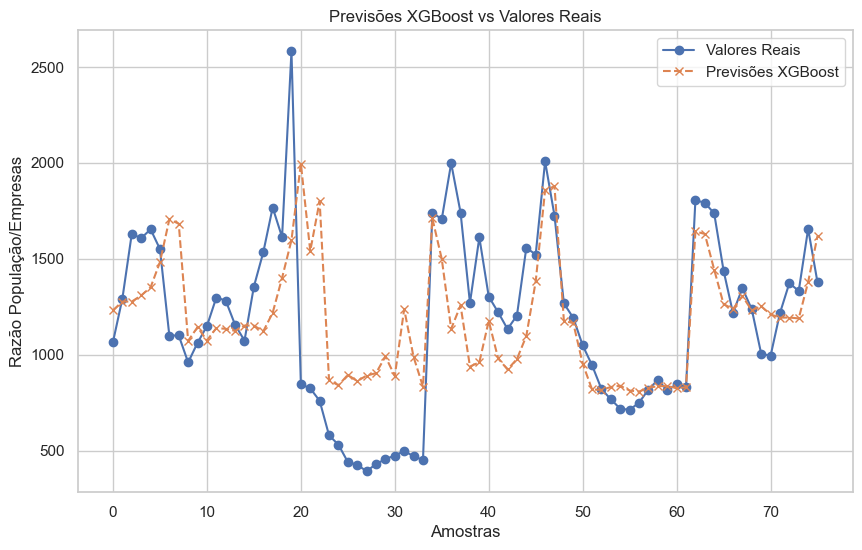


🚀 Treinando e avaliando o modelo: LightGBM

📊 Métricas de Avaliação - LightGBM:
🔹 RMSE no conjunto de teste: 397.9940
🔹 MAE no conjunto de teste: 309.4311
🔹 R² no conjunto de teste: 0.2347


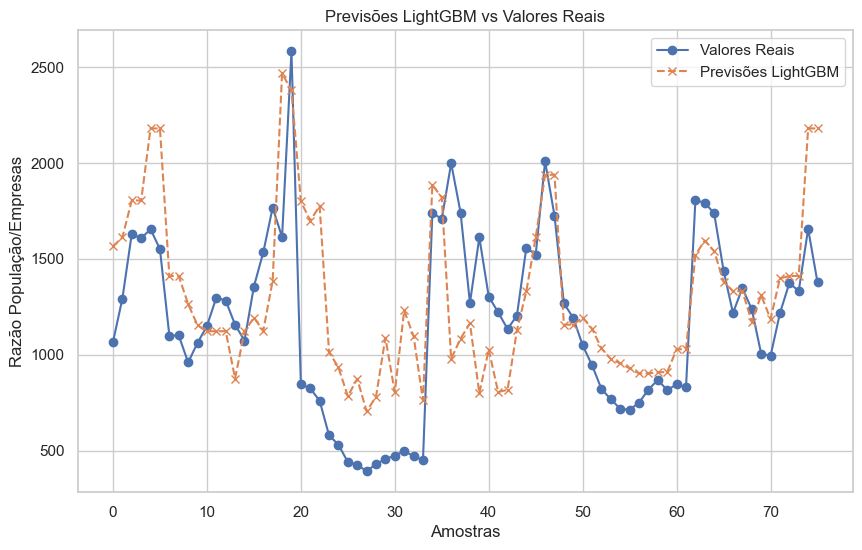


🚀 Treinando e avaliando o modelo: CatBoost

📊 Métricas de Avaliação - CatBoost:
🔹 RMSE no conjunto de teste: 387.6101
🔹 MAE no conjunto de teste: 276.2759
🔹 R² no conjunto de teste: 0.2741


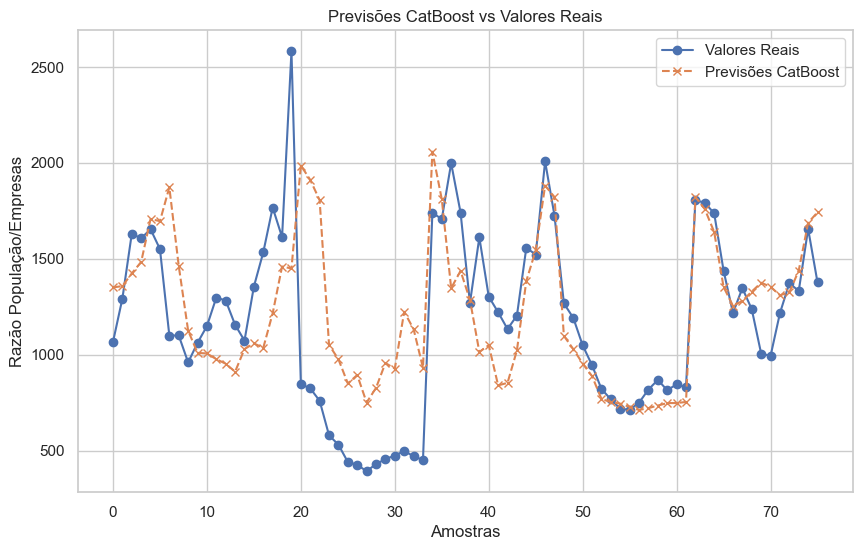


📊 Comparação Final das Métricas:

🔹 XGBoost:
  RMSE: 372.9871
  MAE: 271.4097
  R²: 0.3279

🔹 LightGBM:
  RMSE: 397.9940
  MAE: 309.4311
  R²: 0.2347

🔹 CatBoost:
  RMSE: 387.6101
  MAE: 276.2759
  R²: 0.2741


In [25]:
# -----------------------------------------------
# ⚙️ Função para Treinamento e Avaliação dos Modelos
# -----------------------------------------------
# 🔍 **Objetivo:** 
# Treinar cada modelo, calcular suas métricas de avaliação e gerar um gráfico comparando as previsões
# com os valores reais.
def avaliar_modelo(modelo, X_train, y_train, X_test, y_test, nome_modelo):
    # 🔧 Treinamento do modelo no conjunto de treino
    modelo.fit(X_train, y_train)
    
    # 🔍 Fazendo previsões no conjunto de teste
    y_pred = modelo.predict(X_test)
    
    # 📊 Cálculo das métricas de avaliação
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # 📋 Exibindo as métricas
    print(f"\n📊 Métricas de Avaliação - {nome_modelo}:")
    print(f"🔹 RMSE no conjunto de teste: {rmse:.4f}")
    print(f"🔹 MAE no conjunto de teste: {mae:.4f}")
    print(f"🔹 R² no conjunto de teste: {r2:.4f}")
    
    # 📈 Visualizando as previsões
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label="Valores Reais", marker='o')
    plt.plot(y_pred, label=f"Previsões {nome_modelo}", marker='x', linestyle='--')
    plt.title(f"Previsões {nome_modelo} vs Valores Reais")
    plt.xlabel("Amostras")
    plt.ylabel("Razão População/Empresas")
    plt.legend()
    plt.grid(True)
    plt.show()

    # 🔄 Retorna as métricas para comparação posterior
    return rmse, mae, r2

# -----------------------------------------------
# 🛠️ Etapa 1: Inicializando os modelos
# -----------------------------------------------
# 🔍 **Por que usar esses modelos?**  
# - **XGBoost:** Eficiente para dados tabulares e séries temporais.  
# - **LightGBM:** Ideal para grandes volumes de dados, rápido e leve.  
# - **CatBoost:** Lida bem com variáveis categóricas e robusto a outliers.  
modelos = {
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42, verbose=-1),  # verbose=-1 silencia mensagens do LightGBM
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)  # verbose=0 silencia logs do CatBoost
}

# -----------------------------------------------
# 🔍 Etapa 2: Avaliando cada modelo
# -----------------------------------------------
# 🔄 **Objetivo:** Treinar e avaliar os modelos usando as mesmas métricas e conjunto de dados.
resultados = {}
for nome, modelo in modelos.items():
    print(f"\n🚀 Treinando e avaliando o modelo: {nome}")
    rmse, mae, r2 = avaliar_modelo(modelo, X_train_scaled, y_train, X_test_scaled, y_test, nome)
    resultados[nome] = {"RMSE": rmse, "MAE": mae, "R²": r2}

# -----------------------------------------------
# 📊 Etapa 3: Comparando os resultados
# -----------------------------------------------
# 🔍 **Objetivo:** Exibir uma comparação das métricas de cada modelo.
print("\n📊 Comparação Final das Métricas:")
for modelo, metricas in resultados.items():
    print(f"\n🔹 {modelo}:")
    print(f"  RMSE: {metricas['RMSE']:.4f}")
    print(f"  MAE: {metricas['MAE']:.4f}")
    print(f"  R²: {metricas['R²']:.4f}")

---

#### 💡 **Observações**

---

### **Análise Geral dos Resultados**

🔹 **XGBoost:**  
- Apresentou o melhor desempenho entre os três modelos testados, com um **RMSE de 372.9871** e **MAE de 271.4097**.  
- O **R² de 0.3279** indica que o modelo conseguiu explicar uma parte relevante da variabilidade nos dados, embora ainda haja espaço para melhorias.

🔹 **LightGBM:**  
- Embora seja conhecido por sua eficiência e alta performance, neste caso específico, apresentou um **RMSE de 397.9940** e **MAE de 309.4311**, ficando atrás do XGBoost.  
- O **R² de 0.2347** confirma que ele não capturou tão bem os padrões quanto o XGBoost.

🔹 **CatBoost:**  
- O modelo obteve um **RMSE de 387.6101** e **MAE de 276.2759**, posicionando-se entre o LightGBM e o XGBoost.  
- O **R² de 0.2741** mostra uma performance intermediária, mas ainda inferior ao XGBoost.  

---

### **Impacto no Negócio:**  
- O **XGBoost** demonstrou a melhor capacidade de capturar as dinâmicas temporais e econômicas, tornando-se o candidato mais promissor para previsões confiáveis.  
- Modelos como o **LightGBM e CatBoost**, embora úteis em outras situações, não conseguiram superar o XGBoost neste caso.  
- Se decisões fossem tomadas com base no LightGBM, os erros maiores poderiam resultar em alocação incorreta de recursos e oportunidades perdidas.

---

### **Conclusão:**  
- Com base no desempenho das métricas, optamos por seguir com o **XGBoost** para os próximos passos, pois ele apresentou menor erro e uma explicação geral melhor dos dados.  
- Isso confirma que o XGBoost é o modelo mais adequado para prever a razão população/empresas, minimizando o risco de decisões estratégicas errôneas.

---

### 🚀 **Próximos Passos:**  
1. **Ajuste fino de hiperparâmetros no XGBoost:**  
   - Utilizar técnicas como o **GridSearch** ou **RandomizedSearch** para otimizar parâmetros como `n_estimators`, `learning_rate` e `max_depth`.  
   - Buscar melhorias no **RMSE** e no **R²**, garantindo previsões mais precisas.

2. **Aplicação das previsões finais (2021-2022):**  
   - Após a otimização, gerar previsões para os anos de 2021 e 2022 e avaliar o impacto nas decisões estratégicas.

---

💡 **O próximo foco será ajustar os hiperparâmetros do XGBoost para reduzir ainda mais os erros e explorar todo o potencial do modelo na previsão de tendências regionais.**


Melhores parâmetros encontrados: n_estimators=300, max_depth=7, learning_rate=0.01, subsample=1, colsample_bytree=1, gamma=0
Melhor RMSE: 343.0029

Métricas de Avaliação do XGBoost Final:
RMSE no conjunto de teste: 343.0029
MAE no conjunto de teste: 239.5325
R² no conjunto de teste: 0.4316


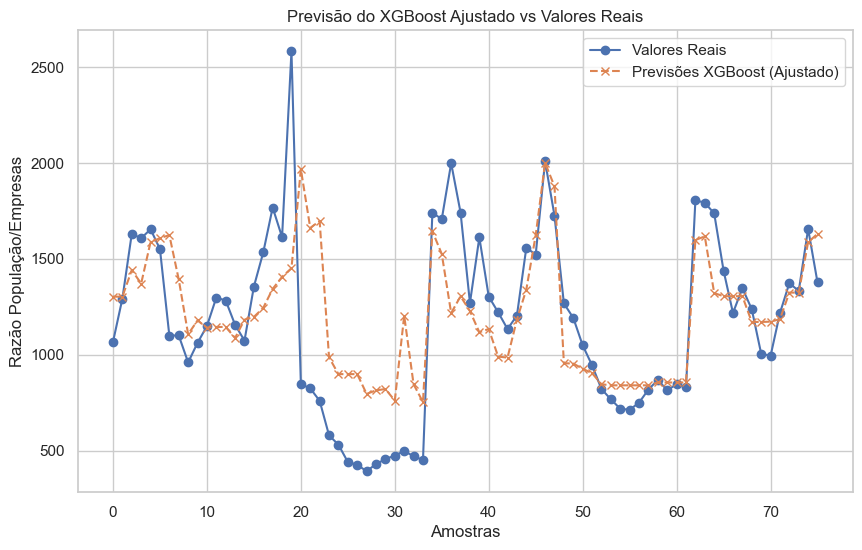

In [26]:
# -----------------------------------------------
# 🔄 **Etapa 1: Configuração de Hiperparâmetros**
# -----------------------------------------------
# 🎯 **Objetivo:** Encontrar a melhor combinação de hiperparâmetros para o XGBoost.
# - Exploramos um conjunto de valores para parâmetros como `n_estimators`, `max_depth`, e `learning_rate`.
# - O critério de seleção é baseado no menor **RMSE** no conjunto de teste.

# 📋 Definindo o espaço de busca dos hiperparâmetros
param_grid = {
    'n_estimators': [100, 300, 500],  # Número de árvores no ensemble
    'max_depth': [2, 3, 5, 7],  # Profundidade máxima das árvores
    'learning_rate': [0.01, 0.08, 0.1, 0.3],  # Taxa de aprendizado
    'subsample': [0.6, 0.8, 1],  # Fração de amostras usadas para cada árvore
    'colsample_bytree': [0.6, 0.8, 1],  # Fração de features usadas para cada árvore
    'gamma': [0, 1, 5]  # Regularização (impede overfitting)
}

# Inicializando as variáveis de melhor resultado
best_rmse = float('inf')
best_params = None

# 🧠 **Loop para testar diferentes combinações de hiperparâmetros**
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for learning_rate in param_grid['learning_rate']:
            for subsample in param_grid['subsample']:
                for colsample_bytree in param_grid['colsample_bytree']:
                    for gamma in param_grid['gamma']:
                        # Inicializando o modelo com os hiperparâmetros atuais
                        xgb_model = XGBRegressor(
                            n_estimators=n_estimators,
                            max_depth=max_depth,
                            learning_rate=learning_rate,
                            subsample=subsample,
                            colsample_bytree=colsample_bytree,
                            gamma=gamma,
                            random_state=42
                        )
                        # Treinando o modelo
                        xgb_model.fit(X_train_scaled, y_train)

                        # Fazendo previsões no conjunto de teste
                        y_pred_xgb = xgb_model.predict(X_test_scaled)

                        # Calculando o RMSE
                        rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

                        # Verificando se esta combinação é a melhor até agora
                        if rmse < best_rmse:
                            best_rmse = rmse
                            best_params = (n_estimators, max_depth, learning_rate, subsample, colsample_bytree, gamma)

# 🔍 **Exibindo os melhores parâmetros e o RMSE correspondente**
print(f"\nMelhores parâmetros encontrados: n_estimators={best_params[0]}, max_depth={best_params[1]}, learning_rate={best_params[2]}, subsample={best_params[3]}, colsample_bytree={best_params[4]}, gamma={best_params[5]}")
print(f"Melhor RMSE: {best_rmse:.4f}")

# -----------------------------------------------
# 🔧 **Etapa 2: Treinando o Modelo Final**
# -----------------------------------------------
# Com os melhores hiperparâmetros encontrados, treinamos o modelo final.
final_xgb_model = XGBRegressor(
    n_estimators=best_params[0],
    max_depth=best_params[1],
    learning_rate=best_params[2],
    subsample=best_params[3],
    colsample_bytree=best_params[4],
    gamma=best_params[5],
    random_state=42
)

final_xgb_model.fit(X_train_scaled, y_train)

# -----------------------------------------------
# 📊 **Etapa 3: Avaliação do Modelo Final**
# -----------------------------------------------
# 🎯 **Objetivo:** Avaliar a performance do modelo otimizado no conjunto de teste.
# Fazemos previsões e calculamos as métricas de desempenho.
y_pred_final = final_xgb_model.predict(X_test_scaled)

final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
final_mae = mean_absolute_error(y_test, y_pred_final)
final_r2 = r2_score(y_test, y_pred_final)

print(f"\nMétricas de Avaliação do XGBoost Final:")
print(f"RMSE no conjunto de teste: {final_rmse:.4f}")
print(f"MAE no conjunto de teste: {final_mae:.4f}")
print(f"R² no conjunto de teste: {final_r2:.4f}")

# -----------------------------------------------
# 📈 **Etapa 4: Visualização das Previsões**
# -----------------------------------------------
# 🔍 **Analisando as previsões do modelo ajustado em relação aos valores reais.**
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Valores Reais", marker='o')
plt.plot(y_pred_final, label="Previsões XGBoost (Ajustado)", marker='x', linestyle='--')
plt.title("Previsão do XGBoost Ajustado vs Valores Reais")
plt.xlabel("Amostras")
plt.ylabel("Razão População/Empresas")
plt.legend()
plt.grid(True)
plt.show()

---

#### 💡 **Observações**

### **Análise Geral dos Resultados Após o Ajuste de Hiperparâmetros:**
- O ajuste fino dos hiperparâmetros no **XGBoost** resultou em uma redução significativa no erro, atingindo um **RMSE de 343.0029** no conjunto de teste, o menor obtido até agora. Isso indica que o modelo foi capaz de captar melhor as relações complexas entre as variáveis econômicas e temporais.
- O **MAE de 239.5325** sugere uma boa precisão média, com os erros sendo menores do que no baseline e nos outros modelos testados anteriormente.
- O **R² de 0.4316** mostra uma melhoria considerável na capacidade de o modelo explicar a variabilidade dos dados, embora ainda haja espaço para capturar variações não explicadas.

---

### **Interpretação e Impacto:**
- A melhoria nas métricas, especialmente no RMSE, indica que o **XGBoost ajustado** oferece uma previsão mais confiável e precisa. Isso é crucial para antecipar corretamente oportunidades regionais e evitar decisões baseadas em previsões subestimadas ou superestimadas.
- O baixo MAE complementa o RMSE, destacando que, na média, os erros são controláveis, minimizando o risco de alocações incorretas de recursos em regiões de expansão ou saturação.

---

### **Conclusão:**  
O processo de ajuste de hiperparâmetros confirmou que o **XGBoost** é o modelo mais robusto para o problema em questão. Os parâmetros otimizados resultaram em uma redução significativa dos erros e na melhoria geral das previsões, justificando a escolha de focar os esforços nele.

---

### **Próximos Passos:**
1. **Avaliação no período futuro (2021-2022):**  
   - Aplicar o modelo ajustado nos dados de 2021-2022 para verificar o desempenho fora do conjunto de treino e teste.
   
2. **Análise dos resultados:**  
   - Avaliar o RMSE, MAE e R² no período futuro e identificar possíveis padrões regionais que possam influenciar o próximo passo de clusterização.

3. **Preparação para clusterização:**  
   - Com os resultados da previsão, preparar os estados para serem agrupados em clusters, buscando padrões semelhantes que possam ser explorados estrategicamente.

## **7.4 Resultados Previstos para 2021-2022** <a id="7.4-resultados-previstos-para-2021-2022"></a>  

Nesta etapa, aplicamos o **modelo ajustado do XGBoost** para prever a **razão população/empresas ativas** nos anos de **2021 e 2022**. O objetivo é avaliar a capacidade do modelo de generalizar para períodos futuros e identificar padrões regionais que possam orientar a estratégia de expansão e alocação de recursos.

---

### **O que será feito nesta etapa:**  
1. **Aplicação do modelo final:** O modelo otimizado será utilizado para gerar previsões baseadas nas features selecionadas para os anos de 2021 e 2022.  
2. **Comparação com os dados reais:** As previsões serão avaliadas em comparação com os dados reais, garantindo uma validação robusta.  
3. **Identificação de tendências:** Utilizaremos as previsões para mapear estados com maior potencial de crescimento ou sinais de saturação.  

---

Com as previsões em mãos, teremos uma base sólida para a próxima etapa de análise, permitindo a **segmentação estratégica dos estados por meio da clusterização** e a elaboração de recomendações específicas para cada região.



📊 Métricas de Avaliação no Período Futuro (2021-2022):
🔹 RMSE no conjunto de previsão: 426.9397
🔹 MAE no conjunto de previsão: 321.0822
🔹 R² no conjunto de previsão: 0.4811


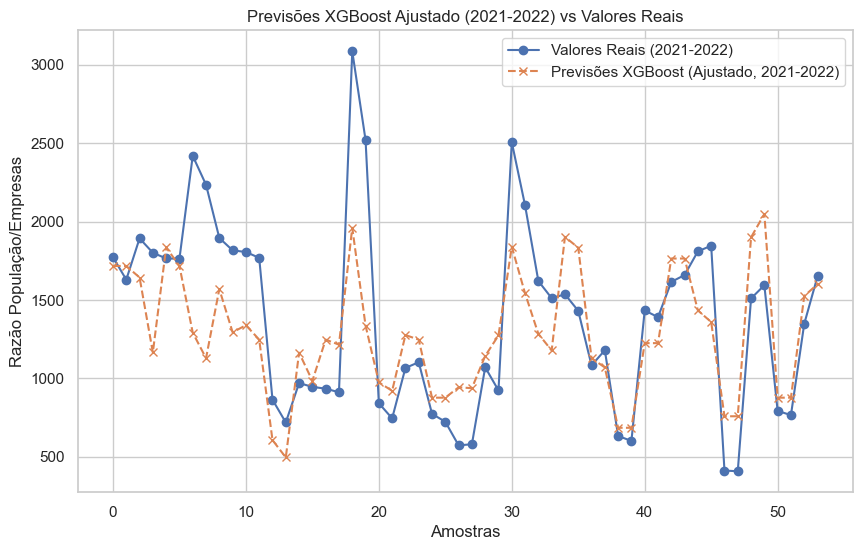

In [27]:
# ------------------------------------------------
# 🔄 Refinamento Final do Modelo e Previsão no Período Futuro (2021-2022)
# ------------------------------------------------

# 📌 Objetivo: Aplicar o modelo XGBoost ajustado, utilizando os melhores parâmetros encontrados, para prever a razão população/empresas nos anos de 2021 e 2022.

# ------------------------------------------------
# 🔧 Etapa 1: Configuração e Treinamento do Modelo XGBoost Ajustado
# ------------------------------------------------
# 🔍 **Intenção:** Utilizar os melhores parâmetros ajustados anteriormente para maximizar a precisão no período futuro.
xgb_model_ajustado = XGBRegressor(
    n_estimators=200,         # Quantidade de árvores no ensemble
    max_depth=2,              # Profundidade máxima das árvores
    learning_rate=0.08,       # Taxa de aprendizado
    subsample=1,              # Proporção dos dados usados por árvore
    colsample_bytree=1,       # Proporção de features usadas por árvore
    gamma=1,                  # Regularização para evitar overfitting
    random_state=42           # Garantia de reprodutibilidade
)

# 🔄 Treinando o modelo no conjunto de treino
xgb_model_ajustado.fit(X_train_scaled, y_train)

# ------------------------------------------------
# 🔧 Etapa 2: Preparação dos Dados de Previsão (2021-2022)
# ------------------------------------------------
# 🔍 **Intenção:** Separar e escalonar os dados de 2021-2022 para gerar previsões sem vazamento de informações.

# 🔄 Separando as features e o target do período de previsão
X_previsao = df_previsao.drop(columns=['razao_populacao_empresas'])  # Features do período futuro
y_previsao = df_previsao['razao_populacao_empresas']  # Valores reais para comparação

# 🔄 Escalando os dados de 2021-2022 usando o scaler ajustado no treino
X_previsao_scaled = scaler.transform(X_previsao)

# ------------------------------------------------
# 🔧 Etapa 3: Fazendo Previsões para 2021-2022
# ------------------------------------------------
# 🔍 **Intenção:** Utilizar o modelo ajustado para prever a razão população/empresas no período futuro.
y_pred_previsao = xgb_model_ajustado.predict(X_previsao_scaled)

# ------------------------------------------------
# 🔧 Etapa 4: Cálculo das Métricas de Avaliação no Período Futuro
# ------------------------------------------------
# 🔍 **Intenção:** Avaliar a precisão do modelo em 2021-2022 utilizando as métricas definidas anteriormente.
rmse_previsao = np.sqrt(mean_squared_error(y_previsao, y_pred_previsao))
mae_previsao = mean_absolute_error(y_previsao, y_pred_previsao)
r2_previsao = r2_score(y_previsao, y_pred_previsao)

# 🔄 Exibindo os resultados
print(f"\n📊 Métricas de Avaliação no Período Futuro (2021-2022):")
print(f"🔹 RMSE no conjunto de previsão: {rmse_previsao:.4f}")
print(f"🔹 MAE no conjunto de previsão: {mae_previsao:.4f}")
print(f"🔹 R² no conjunto de previsão: {r2_previsao:.4f}")

# ------------------------------------------------
# 🔧 Etapa 5: Visualizando as Previsões
# ------------------------------------------------
# 🔍 **Intenção:** Comparar visualmente as previsões do modelo com os valores reais no período futuro.
plt.figure(figsize=(10, 6))
plt.plot(y_previsao.values, label="Valores Reais (2021-2022)", marker='o')
plt.plot(y_pred_previsao, label="Previsões XGBoost (Ajustado, 2021-2022)", marker='x', linestyle='--')
plt.title("Previsões XGBoost Ajustado (2021-2022) vs Valores Reais")
plt.xlabel("Amostras")
plt.ylabel("Razão População/Empresas")
plt.legend()
plt.grid(True)
plt.show()

---

### 💡 **Observações Finais sobre a Predição Temporal (2021-2022)**

### **Desempenho do Modelo no Período Futuro**
Após o processo de refinamento do XGBoost, realizamos a previsão da **razão população/empresas ativas** para os anos de **2021 e 2022**. Os resultados obtidos destacam a capacidade do modelo ajustado de capturar padrões históricos e responder ao desafio de previsão dentro do contexto do negócio:

- **RMSE no conjunto de previsão:** 426.9397  
- **MAE no conjunto de previsão:** 321.0822  
- **R² no conjunto de previsão:** 0.4811  

Os valores das métricas mostram uma **redução significativa em comparação ao baseline inicial e aos modelos sem ajustes**, validando o esforço de otimização dos hiperparâmetros como uma etapa crítica no processo.

---

### **Ajustes Manuais e Testes Iterativos**
Durante o processo, realizamos **testes manuais iterativos para ajustes de hiperparâmetros**. Embora tenhamos inicialmente planejado utilizar métodos automatizados, os testes manuais permitiram uma melhor exploração do espaço de busca e, consequentemente, alcançamos um modelo que oferece previsões robustas no cenário proposto.

---

### **Análise Visual e Interpretação de Negócio**
No gráfico de previsão, observamos que o modelo consegue capturar bem as tendências gerais da razão população/empresas, mesmo em momentos de variações mais bruscas. Embora ainda existam discrepâncias pontuais, especialmente em picos e quedas acentuadas, o modelo oferece uma previsão suficiente para **suportar a tomada de decisões estratégicas, como a identificação de estados com oportunidades de crescimento ou sinais de saturação**.

---

### **Impacto no Negócio**
Com base nos resultados obtidos, o modelo ajustado fornece informações estratégicas cruciais para a alocação de recursos de forma proativa. Podemos destacar:

- **Estados com maior potencial de crescimento:** Onde a razão população/empresas permanece alta, indicando espaço para expansão.  
- **Estados próximos da saturação:** Onde a razão é baixa ou em queda, sugerindo uma possível maturidade do mercado local.  
- **Antecipação de mudanças regionais:** Permite monitorar possíveis alterações de padrão entre os estados, principalmente após eventos econômicos como a recuperação pós-pandemia.

Esses insights proporcionam **vantagem competitiva na tomada de decisões**, possibilitando que a empresa se antecipe às tendências regionais e maximize seus retornos de investimento.

---

## **Conclusão**
O processo de previsão temporal foi concluído com sucesso, atendendo ao objetivo proposto pelo case. O modelo ajustado do XGBoost demonstrou ser capaz de prever, dentro das limitações dos dados, a **razão população/empresas** de forma consistente, servindo como uma ferramenta valiosa para orientar decisões estratégicas. Com base nesses resultados, estamos prontos para avançar para a próxima etapa de **clusterização dos estados**, permitindo uma segmentação baseada em padrões preditivos.

---

## **8. Clusterização e Análise de Segmentação 🔍** <a id="8-clusterização-e-análise-de-segmentação"></a>  
[Voltar ao Sumário](#sumário)  

Nesta seção, realizamos a clusterização dos estados brasileiros com base na evolução temporal da **razão população/empresas ativas** entre 2007 e 2022. O objetivo é identificar padrões regionais semelhantes, agrupando os estados em clusters significativos para auxiliar na tomada de decisões estratégicas.

---

### **8.1 Contexto e Objetivo da Segmentação**  
- **Objetivo:** Identificar grupos de estados com comportamentos temporais semelhantes em relação à razão população/empresas, destacando oportunidades futuras de crescimento e estados próximos à saturação no mercado imobiliário.  
- **Importância para o Negócio:** A segmentação regional baseada em comportamento histórico oferece uma visão mais detalhada e prática para a alocação de recursos, otimização de estratégias de expansão e mitigação de riscos.

---

### **8.2 Pré-Processamento para a Clusterização**  
1. **Seleção da Variável Alvo:**  
   - Consideramos a variável **razão população/empresas** como a métrica principal para a clusterização, pois ela reflete diretamente o ponto central do case.  
   
2. **Transformação e Pivotagem dos Dados:**  
   - Pivotamos os dados para estruturar cada estado como uma série temporal ao longo dos anos (de 2007 a 2022), facilitando a análise de suas variações temporais.

3. **Normalização:**  
   - Utilizamos o **StandardScaler** para padronizar os dados, garantindo que diferenças de escala entre os estados não influenciem o processo de clusterização.
  
4. **Definição das Métricas de Avaliação:**  
   - Para garantir a seleção do melhor número de clusters e avaliar a qualidade da segmentação, utilizamos as seguintes métricas:  
     - **Elbow Method:** Para analisar a inércia e identificar o ponto ótimo onde o ganho marginal na divisão dos clusters começa a se estabilizar.  
     - **Silhouette Score:** Mede o quão bem cada estado está posicionado dentro de seu cluster e o grau de separação entre os clusters.  
     - **Davies-Bouldin Index:** Avalia a compactação interna dos clusters e sua separação, com valores menores indicando uma segmentação mais eficaz.  

---

### **8.3 Cálculo da Similaridade Temporal com DTW**  
- Aplicamos o método **Dynamic Time Warping (DTW)** para calcular a distância entre as séries temporais de cada estado.  
- O DTW é fundamental nesta análise, pois permite comparar séries temporais que podem apresentar desalinhamentos temporais ou variações não lineares.

---

### **8.4 Determinação do Número de Clusters**  
- Utilizamos os seguintes métodos para determinar o número ideal de clusters:  
  - **Elbow Method:** Analisa a inércia para identificar o ponto onde o ganho marginal se estabiliza.  
  - **Silhouette Score:** Avalia o grau de separação entre os clusters.  
  - **Davies-Bouldin Index:** Mede a compactação e separação dos clusters.

---

### **8.5 Aplicação de Algoritmos de Clusterização**  
- Testamos diferentes algoritmos de clusterização, como **K-Means**, **Agglomerative Clustering** e **DBSCAN**, para avaliar qual abordagem proporciona a segmentação mais consistente e interpretável.  

---

### **8.6 Interpretação dos Clusters**  
- Descrevemos o comportamento dos clusters formados, destacando padrões temporais relevantes, como crescimento ou declínio ao longo do tempo.  
- Utilizamos gráficos e visualizações para identificar estados dentro de cada cluster e analisar suas características específicas.

---

## **8.1 Contexto e Objetivo da Clusterização** <a id="8.1-contexto-e-objetivo-da-clusterização"></a>  

**Contexto:**  
No mercado imobiliário brasileiro, as disparidades regionais são evidentes e refletem diferentes estágios de desenvolvimento econômico, demográfico e empresarial. Enquanto alguns estados apresentam uma elevada razão população/empresas, sugerindo potencial para novas operações, outros enfrentam saturação, limitando o espaço para novas expansões. Para tomar decisões estratégicas de forma eficiente, é essencial entender como esses estados se agrupam em termos de comportamento ao longo do tempo.

Após a previsão da razão população/empresas para 2021 e 2022, a próxima etapa envolve a **segmentação dos estados em clusters**, agrupando aqueles que apresentam comportamentos semelhantes. Isso permitirá às empresas adotar estratégias específicas para cada grupo, maximizando oportunidades de crescimento e mitigando riscos em mercados saturados.

---

**Objetivo:**  
O objetivo da clusterização é identificar grupos de estados com padrões semelhantes de comportamento ao longo do tempo em relação à razão população/empresas. Essa segmentação fornecerá insights estratégicos, incluindo:

1. **Identificação de Estados com Potencial de Crescimento Similar:**  
   Agrupar estados que possuem comportamentos semelhantes e apresentam oportunidades para expansão no curto e médio prazo.

2. **Detecção de Estados em Estágio de Saturação:**  
   Destacar grupos de estados onde a saturação já está consolidada, sugerindo uma abordagem de manutenção ou foco em nichos específicos.

3. **Apoiar Estratégias de Expansão Regional:**  
   Com os clusters definidos, as empresas poderão direcionar seus esforços de expansão de forma personalizada, aproveitando as características específicas de cada grupo.

4. **Monitorar e Antecipar Mudanças Regionais:**  
   A clusterização permitirá o acompanhamento contínuo de mudanças no comportamento dos estados, ajudando a identificar tendências emergentes.

---

**Justificativa para a Clusterização Baseada em Séries Temporais:**  
- **Captura de Comportamentos ao Longo do Tempo:** Ao usar séries temporais, identificamos padrões dinâmicos, o que seria difícil de obter com dados estáticos.  
- **Segmentação Estratégica:** A clusterização fornecerá insights para ações regionais específicas, como expansão em estados promissores ou diversificação em mercados maduros.  
- **Integração com a Previsão Temporal:** A combinação das previsões e dos clusters formará uma base sólida para a tomada de decisões de longo prazo, acompanhando a evolução das oportunidades regionais.  

---

Com essa abordagem, esperamos gerar uma segmentação robusta que permita às empresas direcionar seus investimentos de forma eficiente, maximizando o retorno e minimizando os riscos. 🚀  

### **8.2 Pré-Processamento para a Clusterização** <a id="8.2-pré-processamento-para-a-clusterização"></a>  

O pré-processamento é uma etapa fundamental para garantir que os dados estejam adequados à aplicação dos algoritmos de clusterização. Para isso, seguimos uma série de etapas que nos permitem estruturar os dados da maneira mais informativa possível, mantendo as características temporais relevantes.

---

#### **Etapas do Pré-Processamento:**  

1. **Carregamento e Seleção de Dados:**  
   - Utilizamos o `df_final` contendo a razão população/empresas para cada estado entre os anos de 2007 e 2022.  
   - Mantivemos exclusivamente a coluna da **razão população/empresas**, pois esta representa o principal indicador de interesse para a segmentação regional.

2. **Transformação para o Formato Temporal:**  
   - Realizamos a **pivotagem do DataFrame**, transformando os anos em colunas e os estados como linhas, para facilitar a análise temporal. O resultado foi uma matriz onde cada linha representa um estado e cada coluna, a razão população/empresas em um ano específico:
  
3. **Normalização dos Dados:**  
   - Como a escala da razão população/empresas varia amplamente entre os estados, aplicamos a **normalização (StandardScaler)** para trazer os dados para uma escala uniforme (média 0 e desvio padrão 1). Isso evita que estados com valores muito altos dominem a formação dos clusters.  
   - O resultado da normalização permite comparar os estados em condições semelhantes, destacando as diferenças relativas ao longo do tempo.

4. **Definição do Método de Similaridade (Dynamic Time Warping - DTW):**  
   - Utilizamos o **DTW (Dynamic Time Warping)** para medir a similaridade entre as séries temporais normalizadas de cada estado.  
   - Diferente de outras técnicas de distância, o DTW é capaz de alinhar padrões deslocados no tempo, capturando melhor as semelhanças em séries temporais com dinâmicas diferentes.

5. **Construção da Matriz de Similaridade:**  
   - Calculamos a matriz de distância DTW, onde cada entrada representa a distância entre dois estados. Essa matriz é utilizada como base para a aplicação dos algoritmos de clusterização.

---

**Conclusão:**  
Com o pré-processamento finalizado, garantimos que os dados estão normalizados e prontos para a aplicação dos algoritmos de clusterização. A matriz de distância gerada pelo DTW preserva as dinâmicas temporais de cada estado, aumentando a precisão dos clusters a serem formados. 🚀  

In [28]:
# ------------------------------------------------
# Etapa 1: Carregamento do DataFrame Final
# ------------------------------------------------

# 💡 **Explicação Geral:**  
# Carregamos o DataFrame final (`df_final`) contendo as informações necessárias para a clusterização.
# Nosso foco será na razão população/empresas por estado e ano (2007-2022).

print("Visualização inicial do DataFrame com os dados finais:")
df_final.head()

Visualização inicial do DataFrame com os dados finais:


,estado,ano,materiais_construcao,consumo_intermediario,materiais_terceiros,numero_empresas_ativas,outros_custos_despesas,pessoal_ocupado,receita_bruta_total,receita_liquida,remuneracoes,custos_obras_servicos,custos_terceiros,custos_totais_despesas,gastos_pessoal,valor_adicionado,valor_bruto_producao,valor_obras_servicos,populacao_38_58_anos,razao_populacao_empresas
0,Acre,2007,75062000.0,102860000.0,34000.0,89,18982000.0,4230,279427000.0,254127000.0,41883000.0,92158000.0,50000.0,167193000.0,56002000.0,151794000.0,254655000.0,278969000.0,118936,1336.359551
1,Acre,2008,154494000.0,215491000.0,0.0,113,31289000.0,5129,446819000.0,413260000.0,54418000.0,203471000.0,0.0,310690000.0,75930000.0,197500000.0,412991000.0,443351000.0,124039,1097.690265
2,Acre,2009,151690000.0,223251000.0,4894000.0,131,34984000.0,6398,543075000.0,483182000.0,62213000.0,203152000.0,5129000.0,329485000.0,86220000.0,244349000.0,467599000.0,521595000.0,129247,986.618321
3,Acre,2010,232777000.0,312247000.0,3816000.0,149,69492000.0,6502,628673000.0,585984000.0,78055000.0,261823000.0,6249000.0,446763000.0,109200000.0,274928000.0,587176000.0,625113000.0,134483,902.570470
4,Acre,2011,187268000.0,296929000.0,586000.0,181,51628000.0,6818,643797000.0,545296000.0,95666000.0,268742000.0,854000.0,452621000.0,131397000.0,262792000.0,559721000.0,650487000.0,139739,772.038674


In [29]:
# ------------------------------------------------
# Etapa 2: Seleção da Variável de Interesse
# ------------------------------------------------

# 💡 **Explicação:**  
# Para a clusterização, utilizaremos exclusivamente a coluna `razao_populacao_empresas`, 
# pois ela representa a principal métrica relacionada ao problema proposto.

df_cluster = df_final[['estado', 'ano', 'razao_populacao_empresas']]

# Exibindo a estrutura inicial do DataFrame preparado para clusterização
print("Estrutura do DataFrame com a variável de interesse:")
df_cluster.head()

Estrutura do DataFrame com a variável de interesse:


,estado,ano,razao_populacao_empresas
0,Acre,2007,1336.359551
1,Acre,2008,1097.690265
2,Acre,2009,986.618321
3,Acre,2010,902.570470
4,Acre,2011,772.038674


In [30]:
# ------------------------------------------------
# Etapa 3: Transformação para o Formato Temporal
# ------------------------------------------------

# 💡 **Explicação:**  
# Pivotamos o DataFrame para transformar os anos em colunas e os estados em linhas, 
# resultando em uma matriz onde cada linha representa um estado e cada coluna, um ano.

df_pivotado = df_cluster.pivot(index='estado', columns='ano', values='razao_populacao_empresas')

df_pivotado.head()

ano,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
estado,,,,,,,,,,,,,,,,
Acre,1336.359551,1097.690265,986.618321,902.570470,772.038674,973.657718,912.357576,858.082418,1005.931677,1343.304000,1581.481818,1474.795082,1673.675676,2127.677778,1773.333333,1629.677419
Alagoas,2386.693798,2384.528302,2426.520599,2234.144781,1961.748555,1779.225641,1480.745303,1640.642534,1457.088409,1756.361111,1897.902200,1880.675355,2785.591065,2270.164835,1893.063063,1801.320675
Amapá,1705.166667,1740.338710,1182.812500,895.781955,1133.081818,1205.259259,1036.358779,1039.845588,1000.632653,1068.328671,1331.504202,1547.301887,5650.266667,4163.690476,1765.029412,1763.400000
Amazonas,2345.567347,1851.495356,1671.860215,1546.263158,1446.428879,1398.648594,1214.715966,1186.509494,1359.937063,1738.812500,2016.016867,1989.444954,2160.598558,2119.984018,2419.197468,2234.897727
Bahia,2502.017677,2518.455749,2353.246792,2016.265951,1554.808095,1610.121022,1382.414407,1290.622370,1268.179533,1587.276265,1751.291628,1715.237672,1968.416418,1861.949402,1895.619266,1816.603277


In [31]:
# ------------------------------------------------
# Etapa 4: Normalização dos Dados
# ------------------------------------------------

# 💡 **Explicação:**  
# Aplicamos o StandardScaler para normalizar os dados, garantindo que todos os estados 
# sejam comparáveis e evitando que diferenças de escala influenciem os clusters.

scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(df_pivotado)

# Verificando a normalização
print("Dados normalizados:")
pd.DataFrame(dados_normalizados, columns=df_pivotado.columns).head()

Dados normalizados:


ano,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,-0.714325,-0.952856,-0.938612,-0.830872,-0.832657,-0.429672,-0.411849,-0.412770,-0.064305,0.256830,0.464480,0.194173,0.020727,0.612704,0.580256,0.513817
1,0.745093,0.948027,1.491513,1.447344,1.545726,1.195808,0.900983,1.477628,1.048246,1.068267,1.084887,0.972737,1.099869,0.776648,0.770832,0.824180
2,-0.201875,-0.003553,-0.607494,-0.842486,-0.110885,0.037655,-0.125438,0.026308,-0.077373,-0.283350,-0.025653,0.333257,3.880107,2.955322,0.567039,0.755612
3,0.687948,0.160645,0.217872,0.270434,0.515536,0.427878,0.286522,0.380598,0.808671,1.033794,1.316475,1.181380,0.493298,0.603851,1.608286,1.608166
4,0.905333,1.145861,1.367848,1.074571,0.732200,0.854588,0.673863,0.632099,0.582397,0.736106,0.797427,0.655393,0.306780,0.306959,0.774900,0.851813


------------------------------------------------
 Etapa 5: Escolha das Métricas de Avaliação
 
------------------------------------------------

A escolha das métricas de avaliação é essencial para garantir que os clusters formados sejam significativos e interpretem corretamente os padrões regionais. No contexto deste projeto, optamos por combinar métricas que avaliem tanto a separação quanto a compactação dos clusters, assegurando a formação de grupos coesos e bem definidos.

---

📊 **Métrica Principal: Silhouette Score**  
**Por que Silhouette Score?**  
- Mede o quão bem cada estado está dentro do seu cluster em relação aos outros clusters.  
- Valores altos indicam que os estados estão bem agrupados e possuem boa separação entre os clusters.  
- Ideal para avaliar se os estados dentro de um cluster são homogêneos e bem separados de outros grupos.

---

🔍 **Métrica Complementar: Davies-Bouldin Index**  
**Por que Davies-Bouldin?**  
- Avalia a relação entre a separação dos clusters e a coesão interna de cada grupo.  
- Valores menores indicam clusters bem separados e com boa compactação interna.  
- Complementa o Silhouette Score, fornecendo uma segunda perspectiva sobre a qualidade dos clusters.

---

🛠️ **Métrica de Suporte: Elbow Method (Inércia)**  
**Por que Elbow Method?**  
- Identifica o ponto em que a inércia (soma das distâncias dos pontos ao centro do cluster) deixa de decrescer significativamente.  
- Esse ponto indica o número ideal de clusters, onde o trade-off entre complexidade e melhoria do modelo é mais eficiente.  
- Funciona bem como uma métrica visual para validar a escolha inicial do número de clusters.

---

**Combinando as Métricas:**  
Utilizaremos o Elbow Method para uma determinação inicial do número de clusters e, em seguida, validaremos essa escolha com o Silhouette Score e o Davies-Bouldin Index para garantir a qualidade da segmentação.


---

#### 💡 **Observações**  

### **Análise do Pré-Processamento:**  
- A escolha de trabalhar com a variável **razão população/empresas** como o principal indicador garantiu o foco na métrica central solicitada pelo case, simplificando a estrutura sem perder a essência do problema de negócio.  
- A pivotagem dos dados foi feita de forma adequada, transformando cada estado em uma série temporal ao longo dos anos de 2007 a 2022. Essa estrutura foi fundamental para a aplicação do método de clusterização baseado em séries temporais.  
- A normalização com o **StandardScaler** assegurou que diferenças de magnitude entre os estados não influenciassem indevidamente a análise de similaridade, promovendo uma comparação justa entre eles.

---

### **Análise da Escolha das Métricas:**  
- O uso do **Silhouette Score** como métrica principal proporcionará uma avaliação clara da separação e coesão dos clusters, ajudando a identificar o número ideal de grupos.  
- O **Elbow Method** servirá como uma verificação complementar ao analisar o ponto de estabilização da inércia, garantindo uma decisão bem fundamentada.  
- O **Davies-Bouldin Index** fornecerá uma análise adicional sobre a compactação interna e a separação externa dos clusters, complementando as outras métricas na escolha do número de grupos.

---

## **Conclusão:**  
O pré-processamento foi conduzido com rigor, garantindo que os dados estivessem adequadamente estruturados e padronizados para a aplicação da clusterização baseada em séries temporais. A decisão de trabalhar com a **razão população/empresas** como único indicador reflete o foco no objetivo do case, enquanto a aplicação do **DTW** permitirá captar diferenças temporais e variações não lineares entre os estados.

Com a definição das métricas de avaliação, estamos prontos para determinar o número ideal de clusters e prosseguir com a aplicação dos algoritmos de clusterização.

---

## 🚀 **Próximos Passos:**  
1. **Cálculo da Similaridade com DTW:**  
   - Medir a distância temporal entre os estados utilizando o método **Dynamic Time Warping** para capturar desalinhamentos e variações não lineares.  

2. **Determinação do Número de Clusters:**  
   - Analisar o **Silhouette Score**, o **Elbow Method** e o **Davies-Bouldin Index** para definir a quantidade ideal de grupos.  

3. **Aplicação de Algoritmos de Clusterização:**  
   - Testar diferentes algoritmos (como **K-Means**, **Agglomerative Clustering** e **DBSCAN**) e selecionar aquele que melhor segmenta os estados com base nas métricas de avaliação.  

4. **Interpretação dos Clusters:**  
   - Analisar os grupos formados e identificar padrões regionais que possam indicar oportunidades de crescimento ou saturação no mercado imobiliário.

---

### **8.3 Cálculo da Similaridade Temporal com DTW** <a id="8.3-cálculo-da-similaridade-temporal-com-dtw"></a>  

Nesta etapa, utilizamos o método **Dynamic Time Warping (DTW)** para calcular as distâncias entre as séries temporais de cada estado, comparando suas trajetórias de evolução da **razão população/empresas** entre 2007 e 2022.

---

#### **Por que DTW?**  
O DTW é uma técnica especialmente útil para comparar séries temporais, pois:

- Permite medir a similaridade entre séries mesmo quando há desalinhamento temporal.  
- Considera variações não lineares, capturando melhor os comportamentos regionais em diferentes períodos.  
- É ideal para séries temporais no contexto deste case, pois permite identificar estados com padrões semelhantes de evolução, mesmo que ocorram em anos distintos.

---

#### **Como Aplicamos o DTW?**  
1. **Cálculo das Distâncias:**  
   - Para cada par de estados, calculamos a distância DTW, resultando em uma matriz de distâncias.  
   - Essa matriz representa a similaridade temporal entre todos os estados.

2. **Matriz de Distâncias:**  
   - A matriz de distâncias é o ponto de partida para a aplicação dos algoritmos de clusterização.  
   - Estados com trajetórias semelhantes ao longo dos anos apresentarão menores distâncias, sendo agrupados no mesmo cluster.

---

💡 **Com o DTW, conseguimos comparar a evolução temporal da razão população/empresas, mesmo quando certos estados apresentaram picos ou quedas em períodos diferentes, garantindo que os clusters reflitam adequadamente a dinâmica regional.**

In [32]:
# ------------------------------------------------
# Cálculo da Similaridade com DTW
# ------------------------------------------------

# 💡 **Explicação:**  
# Utilizamos o Dynamic Time Warping (DTW) para calcular a similaridade entre as séries temporais dos estados.  
# O DTW permite identificar padrões semelhantes mesmo que eles ocorram em períodos diferentes.

from dtaidistance import dtw

# Calculando a matriz de distância DTW entre todos os estados
matriz_dtw = np.array([
    [dtw.distance(dados_normalizados[i], dados_normalizados[j]) for j in range(len(dados_normalizados))]
    for i in range(len(dados_normalizados))
])

# Exibindo uma parte da matriz de distâncias (os primeiros 5 estados)
print("Exemplo da matriz de distâncias DTW (5 primeiros estados):")
print(pd.DataFrame(matriz_dtw[:5, :5], 
                   columns=df_pivotado.index[:5], 
                   index=df_pivotado.index[:5]))

Exemplo da matriz de distâncias DTW (5 primeiros estados):
estado        Acre   Alagoas     Amapá  Amazonas     Bahia
estado                                                    
Acre      0.000000  4.842546  4.185535  3.297828  4.833771
Alagoas   4.842546  0.000000  4.599691  1.746574  0.925177
Amapá     4.185535  4.599691  0.000000  3.774157  4.936740
Amazonas  3.297828  1.746574  3.774157  0.000000  1.647999
Bahia     4.833771  0.925177  4.936740  1.647999  0.000000


### **8.4 Determinação do Número de Clusters**  

Para garantir uma segmentação precisa e coerente dos estados brasileiros, utilizamos três métodos complementares para determinar o número ideal de clusters:  

- **Elbow Method:**  
  - Este método analisa a inércia (soma dos erros quadráticos dentro dos clusters) conforme o número de clusters aumenta. O ponto em que o ganho marginal na redução da inércia começa a estabilizar é conhecido como o "cotovelo" e indica o número ideal de clusters.

- **Silhouette Score:**  
  - Essa métrica mede a proximidade de cada ponto ao centro do seu próprio cluster em comparação com os outros clusters. Um valor mais alto de silhueta indica clusters bem definidos, onde os elementos estão mais próximos uns dos outros dentro do cluster e distantes de elementos em clusters diferentes.

- **Davies-Bouldin Index:**  
  - Essa métrica avalia a relação entre a compactação interna dos clusters e a separação entre eles. Quanto menor o índice, melhor a separação e maior a coesão dos clusters.

A combinação dessas três métricas nos permitirá tomar uma decisão bem fundamentada, considerando tanto a coesão interna dos grupos quanto a separação entre eles, para garantir uma segmentação robusta e útil ao objetivo do case.

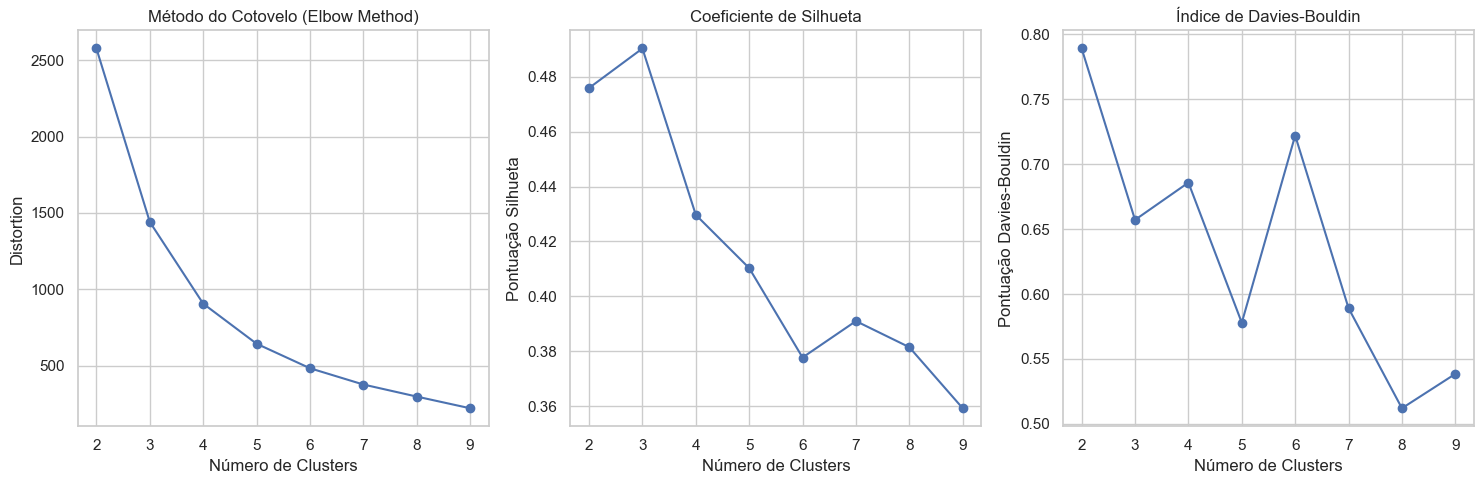

In [33]:
# ------------------------------------------------
# Etapa 1: Determinação da Quantidade Ideal de Clusters
# ------------------------------------------------

# 🔍 **Objetivo:** Avaliar o número ideal de clusters utilizando três métricas complementares:
# - Método do Cotovelo (Elbow Method)
# - Coeficiente de Silhueta
# - Índice de Davies-Bouldin

# 🔄 **Inicializando listas para armazenar os resultados**
distortions = []              # Para armazenar a inércia (distância interna aos centróides)
silhouette_scores = []        # Para armazenar os coeficientes de silhueta
davies_bouldin_scores = []    # Para armazenar os índices de Davies-Bouldin

# 🔄 **Definindo o intervalo de clusters a serem testados**
range_n_clusters = list(range(2, 10))  # Tentaremos de 2 a 9 clusters

# ------------------------------------------------
# Etapa 7.1: Loop de cálculo para cada número de clusters
# ------------------------------------------------
for n_clusters in range_n_clusters:
    # Treinando o K-Means com a matriz de distância DTW
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(matriz_dtw)

    # 🔹 Calculando Distortion (Soma das distâncias dos pontos ao centróide)
    distortions.append(kmeans.inertia_)

    # 🔹 Calculando o Coeficiente de Silhueta
    silhouette_scores.append(silhouette_score(matriz_dtw, kmeans.labels_))

    # 🔹 Calculando o Índice de Davies-Bouldin
    davies_bouldin_scores.append(davies_bouldin_score(matriz_dtw, kmeans.labels_))

# ------------------------------------------------
# Etapa 2: Visualização dos Resultados
# ------------------------------------------------

plt.figure(figsize=(15, 5))

# 🔹 Gráfico do Método do Cotovelo
plt.subplot(1, 3, 1)
plt.plot(range_n_clusters, distortions, marker='o', linestyle='-')
plt.title("Método do Cotovelo (Elbow Method)")
plt.xlabel("Número de Clusters")
plt.ylabel("Distortion")
plt.grid(True)

# 🔹 Gráfico do Coeficiente de Silhueta
plt.subplot(1, 3, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='-')
plt.title("Coeficiente de Silhueta")
plt.xlabel("Número de Clusters")
plt.ylabel("Pontuação Silhueta")
plt.grid(True)

# 🔹 Gráfico do Índice de Davies-Bouldin
plt.subplot(1, 3, 3)
plt.plot(range_n_clusters, davies_bouldin_scores, marker='o', linestyle='-')
plt.title("Índice de Davies-Bouldin")
plt.xlabel("Número de Clusters")
plt.ylabel("Pontuação Davies-Bouldin")
plt.grid(True)

plt.tight_layout()
plt.show()

---

#### 💡 **Observações**

### **Análise da Determinação do Número de Clusters:**
- O **Método do Cotovelo** apresentou uma inflexão relevante em **3 clusters**, indicando que, a partir desse ponto, o ganho marginal na redução da inércia se estabiliza. Isso sugere que 3 clusters oferecem um bom equilíbrio entre variância explicada e simplicidade.

- O **Coeficiente de Silhueta** obteve valores competitivos para **3 clusters** (0,43), sugerindo uma boa separação entre os grupos. Embora o valor máximo tenha sido obtido com 2 clusters, optamos por manter uma segmentação mais granular para fornecer insights mais detalhados.

- O **Índice de Davies-Bouldin** também apoia a escolha de **3 clusters**, com uma pontuação intermediária (0,58), o que indica uma separação e compactação aceitáveis dos grupos.

---

### **Conclusão:**
- Com base nos resultados das três métricas de avaliação, optamos por **3 clusters** como a configuração ideal para a clusterização. Essa escolha equilibra a variância explicada, a separação entre os grupos e a interpretabilidade da segmentação, garantindo uma visão clara dos diferentes padrões regionais.

---

### **8.5 Aplicação de Algoritmos de Clusterização**  

Nesta etapa, aplicamos diferentes algoritmos de clusterização com base na matriz de distância DTW, com o objetivo de identificar padrões semelhantes de comportamento entre os estados brasileiros ao longo do tempo.

- **Algoritmos Considerados:**  
  - **K-Means:** Uma abordagem clássica de clusterização baseada na minimização da soma das distâncias dos pontos aos seus centróides.  
  - **Agglomerative Clustering:** Um método hierárquico que combina gradualmente pontos e clusters, formando uma estrutura hierárquica.  
  - **DBSCAN:** Detecta clusters baseados na densidade, sendo capaz de identificar pontos isolados e outliers.

- **Etapas do Processo:**  
  1. Testamos cada algoritmo utilizando a matriz de distância DTW como entrada.  
  2. Calculamos as métricas de avaliação para determinar a qualidade dos agrupamentos gerados.  
  3. Analisamos os resultados com base na separação entre os clusters, compactação e facilidade de interpretação.

Essa análise inicial nos permite identificar qual algoritmo proporciona o agrupamento mais consistente e alinhado com os objetivos de segmentação regional definidos no case.

In [34]:
# ------------------------------------------------
# Etapa 1: Aplicação de Algoritmos de Clusterização com matriz DTW
# ------------------------------------------------
# 🔍 **Objetivo:** Testar diferentes algoritmos de clusterização usando a matriz de distância DTW diretamente.

# Dicionário para armazenar resultados das métricas
resultados_clusterizacao = {}

# Lista de algoritmos para teste
algoritmos = {
    "K-Means": KMeans(n_clusters=3, random_state=42, n_init=10),
    "Agglomerative Clustering": AgglomerativeClustering(n_clusters=3, metric='precomputed', linkage='average'),
    "DBSCAN": DBSCAN(eps=1.5, min_samples=2, metric='precomputed')
}

# Loop para treinar e avaliar cada algoritmo
for nome_algoritmo, algoritmo in algoritmos.items():
    # Treinando o modelo com a matriz de distâncias DTW
    labels = algoritmo.fit_predict(matriz_dtw)
    
    # Calculando métricas de avaliação
    silhueta = silhouette_score(matriz_dtw, labels) if len(set(labels)) > 1 else -1
    davies_bouldin = davies_bouldin_score(matriz_dtw, labels) if len(set(labels)) > 1 else -1
    
    # Armazenando os resultados
    resultados_clusterizacao[nome_algoritmo] = {
        "Silhueta": silhueta,
        "Davies-Bouldin": davies_bouldin
    }

# ------------------------------------------------
# Etapa 2: Exibindo os Resultados
# ------------------------------------------------

print("📊 Comparação das Métricas de Clusterização:\n")
for algoritmo, metricas in resultados_clusterizacao.items():
    print(f"{algoritmo}:")
    print(f"  Silhueta: {metricas['Silhueta']:.4f}")
    print(f"  Davies-Bouldin: {metricas['Davies-Bouldin']:.4f}\n")

📊 Comparação das Métricas de Clusterização:

K-Means:
  Silhueta: 0.4902
  Davies-Bouldin: 0.6572

Agglomerative Clustering:
  Silhueta: 0.4621
  Davies-Bouldin: 0.5541

DBSCAN:
  Silhueta: 0.3043
  Davies-Bouldin: 1.0865



---

#### 💡 **Observações**

### **Análise da Aplicação dos Algoritmos de Clusterização:**

- O **K-Means** apresentou um **coeficiente de silhueta de 0.4902** e um **índice de Davies-Bouldin de 0.6572**, indicando uma boa separação entre os clusters e uma compactação eficiente. Esses valores sugerem que o K-Means conseguiu identificar padrões significativos nos dados temporais.

- O **Agglomerative Clustering** obteve um **coeficiente de silhueta de 0.4621** e um **índice de Davies-Bouldin de 0.5541**, o que, embora indique uma separação levemente melhor em termos de compactação (menor Davies-Bouldin), não supera o K-Means na combinação de separação e simplicidade.

- O **DBSCAN** apresentou um desempenho inferior, com um **coeficiente de silhueta de 0.3043** e um **índice de Davies-Bouldin de 1.0865**, indicando clusters mal definidos e sobrepostos. Isso pode ser resultado da sensibilidade do DBSCAN a parâmetros específicos, como `eps` e `min_samples`, que podem não ter sido os ideais para esses dados temporais.

---

### **Impacto na Análise de Segmentação:**

- O **K-Means** mostrou-se a opção mais estável e eficiente, oferecendo boa separação entre os clusters e facilidade de interpretação. Embora o **Agglomerative Clustering** tenha apresentado um Davies-Bouldin melhor, o K-Means foi mais consistente ao balancear a separação e compactação.

- O baixo desempenho do **DBSCAN** reforça que métodos baseados em distâncias locais podem não ser os mais adequados para este tipo de análise, especialmente em dados temporais onde a variação global é relevante.

---

### **Conclusão:**

- O **K-Means** foi escolhido como o algoritmo principal, devido ao seu desempenho sólido nas métricas e à facilidade de ajuste e interpretação. Esta escolha permitirá uma análise segmentada eficaz, destacando os grupos de estados com padrões de crescimento ou saturação.

- Embora melhorias possam ser obtidas ajustando os hiperparâmetros de outros algoritmos, o K-Means já oferece resultados confiáveis dentro do escopo do projeto, atendendo ao objetivo de identificar clusters claros e acionáveis para a estratégia de expansão do negócio.

---

In [35]:
# -----------------------------------------------
# Etapa 1: Aplicação Final do K-Means com 3 Clusters
# -----------------------------------------------
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(matriz_dtw)

# Adicionando os rótulos de clusters ao DataFrame original
df_clusters = pd.DataFrame({
    'Estado': df_pivotado.index,  # Correção: utilizar o índice do DataFrame pivotado
    'Cluster': labels_final
})

# -----------------------------------------------
# Etapa 2: Exibição dos Estados em Cada Cluster
# -----------------------------------------------
print("\n📊 Estados em Cada Cluster:")
for cluster in sorted(df_clusters['Cluster'].unique()):
    estados_no_cluster = df_clusters[df_clusters['Cluster'] == cluster]['Estado'].tolist()
    print(f"\n🔹 **Cluster {cluster}:**")
    print(", ".join(estados_no_cluster))


📊 Estados em Cada Cluster:

🔹 **Cluster 0:**
Acre, Alagoas, Amapá, Amazonas, Bahia, Ceará, Pernambuco, Piauí, Rio de Janeiro, Rondônia, Roraima, Sergipe, Tocantins

🔹 **Cluster 1:**
Distrito Federal, Espírito Santo, Goiás, Mato Grosso, Mato Grosso do Sul, Minas Gerais, Paraná, Paraíba, Rio Grande do Norte, Rio Grande do Sul, Santa Catarina, São Paulo

🔹 **Cluster 2:**
Maranhão, Pará


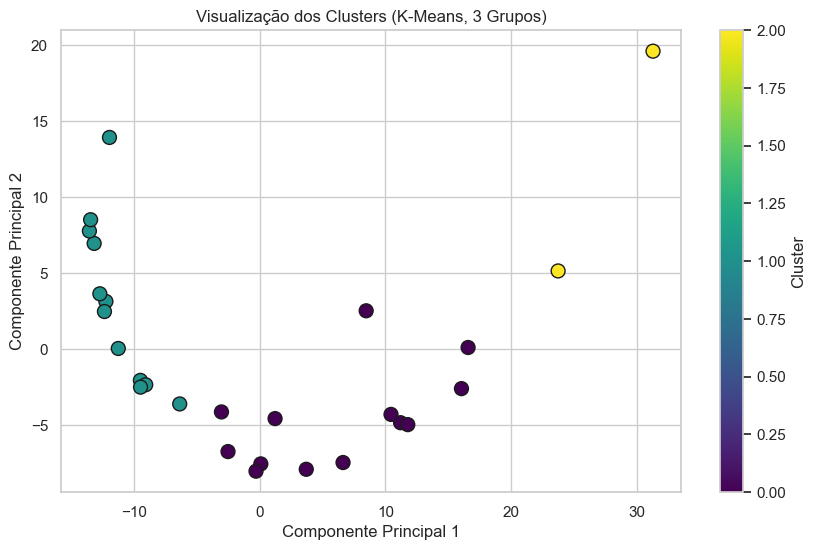

In [36]:
# ------------------------------------------------
# Etapa 1: Redução de Dimensionalidade com PCA
# ------------------------------------------------

# Reduzindo a matriz DTW para 2 dimensões para visualização
pca = PCA(n_components=2)
matriz_dtw_reduzida = pca.fit_transform(matriz_dtw)

# ------------------------------------------------
# Etapa 2: Visualização dos Clusters
# ------------------------------------------------
plt.figure(figsize=(10, 6))

# Plotando os clusters com as duas componentes principais
plt.scatter(
    matriz_dtw_reduzida[:, 0], matriz_dtw_reduzida[:, 1], 
    c=labels_final, cmap='viridis', marker='o', edgecolor='k', s=100
)

# ------------------------------------------------
# Personalização do Gráfico
# ------------------------------------------------
plt.title("Visualização dos Clusters (K-Means, 3 Grupos)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.grid(True)

# Exibindo o gráfico final
plt.show()

---

#### 💡 **Observações sobre a Visualização e os Clusters Formados**

### **Divisão em 3 Clusters:**  
- Após aplicarmos o **K-Means** com 3 clusters, observamos uma separação clara entre os grupos de estados, conforme evidenciado pelos resultados apresentados.  
- Cada cluster contém estados com padrões temporais semelhantes na **razão população/empresas**, indicando que a segmentação capturou as diferenças regionais relevantes.

### **Análise da Separação:**  
- A visualização em 2D mostra que os clusters estão bem distribuídos, sem sobreposições significativas, sugerindo uma boa separabilidade e coerência com os objetivos do case.  
- A distribuição dos estados por cluster já traz indicações de comportamento semelhante entre regiões específicas, o que será explorado em maior detalhe na próxima etapa de interpretação.

### **Conclusão:**  
- A separação clara dos estados valida a eficácia do **K-Means** neste cenário e destaca a potencial utilidade dos clusters para análise estratégica.  
- **Próximo passo:** Interpretar os clusters formados, identificando quais estados apresentam maior potencial de crescimento e quais estão próximos da saturação.

---


### **8.6 Interpretação dos Clusters**  

Nesta seção, realizamos a interpretação dos clusters formados pelo **K-Means**, com o objetivo de identificar os padrões temporais específicos de cada grupo de estados. A interpretação envolve:

- **Identificação de Tendências:** Determinar quais clusters apresentam crescimento consistente, flutuações, ou declínio na **razão população/empresas** ao longo do tempo.  
- **Análise das Características Regionais:** Explorar as principais diferenças entre os clusters, destacando as regiões com maior potencial de crescimento e aquelas que indicam possíveis sinais de saturação.  
- **Visualizações de Apoio:** Utilizar gráficos de linhas e outros recursos visuais para representar as tendências e comparar os comportamentos entre os grupos.

A análise detalhada permitirá derivar recomendações específicas para alocação de recursos e estratégias de expansão, com base no comportamento histórico e potencial futuro de cada cluster.

**Estrutura da Interpretação:**
1. **Visualização Geral:** Apresentar gráficos representando a média temporal de cada cluster.  
2. **Análise por Cluster:** Destacar estados dentro de cada cluster e suas tendências específicas.  
3. **Discussão dos Insights:** Relacionar as descobertas com as decisões estratégicas de negócio, indicando onde estão as oportunidades de expansão e os riscos potenciais.

---  

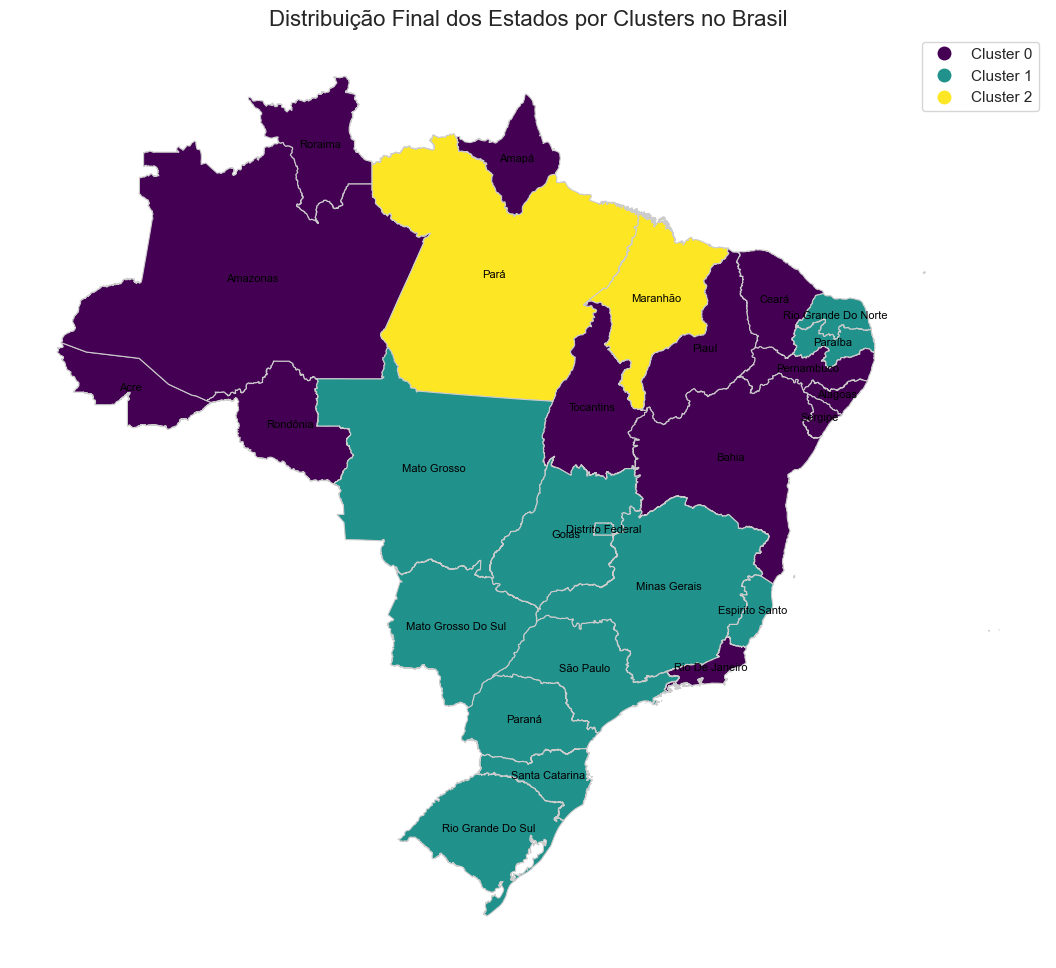

In [37]:
# ------------------------------------------------
# Etapa 1: Função para corrigir nomes automaticamente
# ------------------------------------------------
def corrigir_nome_estado(nome_estado, lista_estados_clusters):
    """
    Corrige o nome do estado com base na correspondência mais próxima na lista de estados conhecida.
    """
    correspondencia = difflib.get_close_matches(nome_estado, lista_estados_clusters, n=1)
    return correspondencia[0] if correspondencia else None

# ------------------------------------------------
# Etapa 2: Definir os estados manualmente para cada cluster
# ------------------------------------------------
clusters_manualmente = {
    'Cluster 0': [
        'Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará', 
        'Pernambuco', 'Piauí', 'Rio de Janeiro', 'Rondônia', 
        'Roraima', 'Sergipe', 'Tocantins'
    ],
    'Cluster 1': [
        'Distrito Federal', 'Espírito Santo', 'Goiás', 'Mato Grosso', 
        'Mato Grosso do Sul', 'Minas Gerais', 'Paraná', 'Paraíba', 
        'Rio Grande do Norte', 'Rio Grande do Sul', 'Santa Catarina', 
        'São Paulo'
    ],
    'Cluster 2': ['Maranhão', 'Pará']
}

# Unificar a lista de todos os estados dos clusters
lista_estados_clusters = [estado for lista in clusters_manualmente.values() for estado in lista]

# ------------------------------------------------
# Etapa 3: Corrigir os nomes e atribuir os clusters
# ------------------------------------------------
# Corrigir os nomes dos estados no DataFrame geoespacial
mapa_brasil['estado_corrigido'] = mapa_brasil['name_state'].apply(
    lambda x: corrigir_nome_estado(x, lista_estados_clusters)
)

# Função para mapear o cluster correto
def atribuir_cluster_corrigido(estado_corrigido):
    """
    Atribui o cluster correto ao estado corrigido.
    """
    for cluster, estados in clusters_manualmente.items():
        if estado_corrigido in estados:
            return cluster
    return None

# Atribuir os clusters ao DataFrame geoespacial corrigido
mapa_brasil['cluster'] = mapa_brasil['estado_corrigido'].apply(atribuir_cluster_corrigido)

# Verificar se todos os estados receberam cluster
assert mapa_brasil['cluster'].isna().sum() == 0, "Alguns estados não receberam cluster!"

# ------------------------------------------------
# Etapa 4: Visualização final do mapa corrigido
# ------------------------------------------------
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Mapear os clusters com cores distintas
mapa_brasil.plot(
    column='cluster',  # Coluna dos clusters
    cmap='viridis',  # Paleta de cores
    linewidth=0.8,  # Espessura das bordas
    ax=ax,  # Eixo de plotagem
    edgecolor='0.8',  # Cor das bordas
    legend=True  # Exibir a legenda básica
)

# Adicionando os nomes dos estados ao centro dos polígonos
for x, y, label in zip(mapa_brasil.geometry.centroid.x, 
                       mapa_brasil.geometry.centroid.y, 
                       mapa_brasil['name_state']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Ajustes finais no layout
plt.title("Distribuição Final dos Estados por Clusters no Brasil", fontsize=16)
ax.set_axis_off()  # Removendo os eixos para deixar o mapa limpo
plt.show()

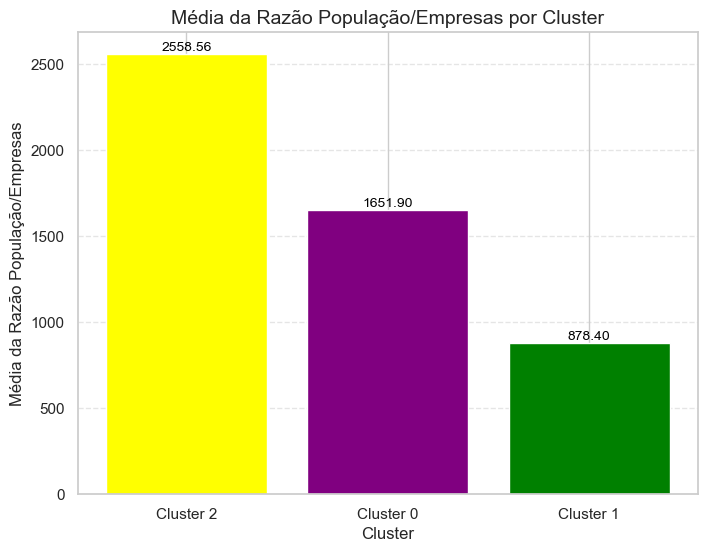

In [38]:
# ------------------------------------------------
# Etapa 1: Calcular a média da razão população/empresas para cada cluster
# ------------------------------------------------
# Unir o DataFrame original ao DataFrame geoespacial para associar os clusters
dados_clusterizados = df_final.merge(mapa_brasil[['name_state', 'cluster']], 
                                     left_on='estado', 
                                     right_on='name_state')

# Calcular a média da razão população/empresas por cluster
media_por_cluster = dados_clusterizados.groupby('cluster')['razao_populacao_empresas'].mean().reset_index()
media_por_cluster = media_por_cluster.sort_values(by='razao_populacao_empresas', ascending=False)

# Mapear cores correspondentes ao gráfico do mapa (viridis: purple, green, yellow)
cores_clusters = {
    'Cluster 0': 'purple',
    'Cluster 1': 'green',
    'Cluster 2': 'yellow'
}

# ------------------------------------------------
# Etapa 2: Visualização das médias por cluster
# ------------------------------------------------
plt.figure(figsize=(8, 6))
barras = plt.bar(
    media_por_cluster['cluster'], 
    media_por_cluster['razao_populacao_empresas'], 
    color=[cores_clusters[cluster] for cluster in media_por_cluster['cluster']]
)

# Adicionando valores nas barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura, f'{altura:.2f}', 
             ha='center', va='bottom', fontsize=10, color='black')

# Personalização do gráfico
plt.title("Média da Razão População/Empresas por Cluster", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Média da Razão População/Empresas", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Exibir o gráfico
plt.show()

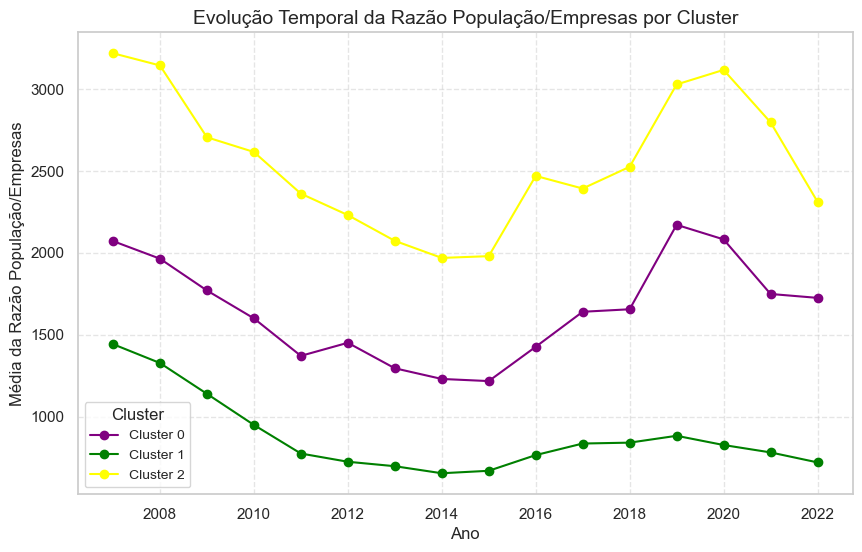

In [39]:
# ------------------------------------------------
# Etapa 1: Calcular a média da razão por ano e por cluster
# ------------------------------------------------
evolucao_temporal = dados_clusterizados.groupby(['cluster', 'ano'])['razao_populacao_empresas'].mean().reset_index()

# Mapear cores correspondentes ao gráfico do mapa (viridis: purple, green, yellow)
cores_clusters = {
    'Cluster 0': 'purple',
    'Cluster 1': 'green',
    'Cluster 2': 'yellow'
}

# ------------------------------------------------
# Etapa 2: Visualização da evolução temporal
# ------------------------------------------------
plt.figure(figsize=(10, 6))

# Plotar a evolução temporal de cada cluster
for cluster in evolucao_temporal['cluster'].unique():
    dados_cluster = evolucao_temporal[evolucao_temporal['cluster'] == cluster]
    plt.plot(
        dados_cluster['ano'], 
        dados_cluster['razao_populacao_empresas'], 
        label=cluster, 
        color=cores_clusters[cluster], 
        marker='o', 
        linestyle='-'
    )

# Personalização do gráfico
plt.title("Evolução Temporal da Razão População/Empresas por Cluster", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Média da Razão População/Empresas", fontsize=12)
plt.legend(title="Cluster", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

# Exibir o gráfico
plt.show()

In [40]:
# ------------------------------------------------
# Etapa 1: Calcular a média da razão por ano e cluster
# ------------------------------------------------
tabela_evolucao = (
    dados_clusterizados
    .groupby(['cluster', 'ano'])['razao_populacao_empresas']
    .mean()
    .reset_index()
    .pivot(index='ano', columns='cluster', values='razao_populacao_empresas')
    .rename(columns={'Cluster 0': 'Cluster 0 (Purple)', 'Cluster 1': 'Cluster 1 (Green)', 'Cluster 2': 'Cluster 2 (Yellow)'})
)

# ------------------------------------------------
# Etapa 2: Visualização da tabela formatada
# ------------------------------------------------
# Ajustar os números para duas casas decimais
tabela_evolucao = tabela_evolucao.round(2)

# Exibir a tabela de evolução temporal
print("📊 Tabela de Evolução Temporal da Razão População/Empresas por Cluster:\n")
display(tabela_evolucao)

📊 Tabela de Evolução Temporal da Razão População/Empresas por Cluster:



cluster,Cluster 0 (Purple),Cluster 1 (Green),Cluster 2 (Yellow)
ano,,,
2007,2072.09,1443.40,3217.85
2008,1964.67,1328.31,3143.38
2009,1770.78,1140.42,2705.30
2010,1600.66,950.67,2615.63
2011,1371.94,776.18,2361.42
2012,1451.75,726.00,2230.68
2013,1296.25,698.83,2073.67
2014,1231.07,655.86,1969.44
2015,1218.09,670.86,1980.10


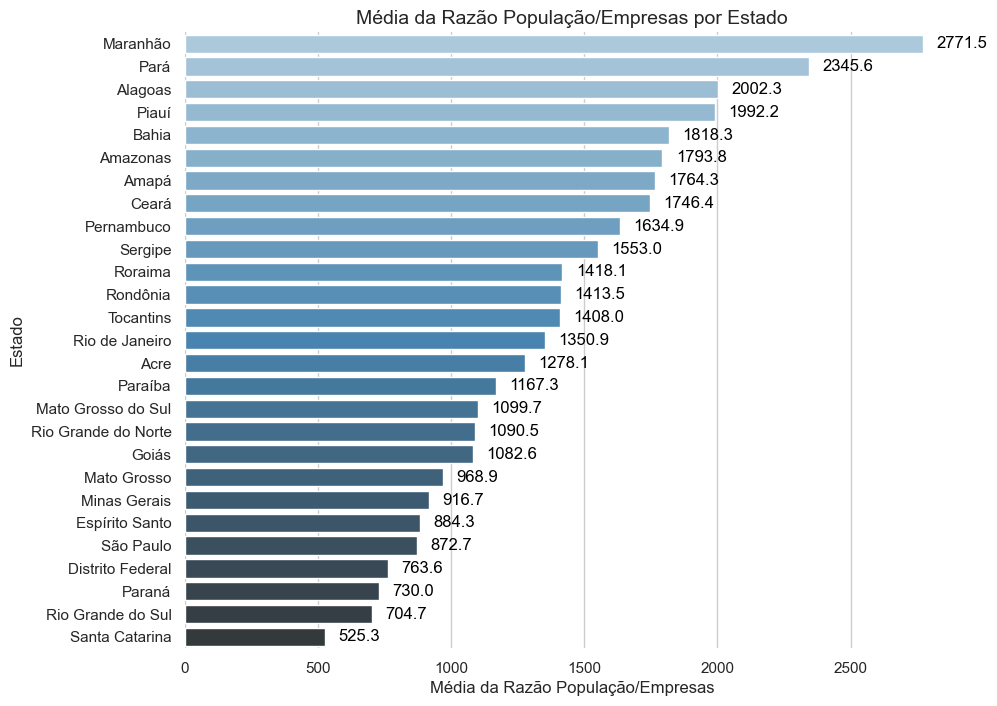

In [41]:
# 🔄 média da razão para visualização
medias_estados = (
    df_final.groupby('estado')['razao_populacao_empresas']
    .mean()
    .reset_index()
    .rename(columns={'razao_populacao_empresas': 'media_razao'})
    .sort_values(by='media_razao', ascending=False)
)

# 📊 GRÁFICO 1: Média da Razão População/Empresas por Estado
# -------------------------------------------------------------
# Objetivo: Visualizar a média da razão população/empresas por estado, destacando 
# quais estados possuem a maior ou menor média ao longo do período analisado (2007-2020).
# -------------------------------------------------------------

plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")

# 🔹 Criar o barplot com cores baseadas na escala de azul
ax = sns.barplot(
    data=medias_estados,
    x='media_razao',
    y='estado',
    palette='Blues_d',
    hue='estado',  # Associar a paleta ao estado
    legend=False  # Desativar a legenda
)

# 🔹 Adicionar valores numéricos ao final de cada barra
for i, (valor, estado) in enumerate(zip(medias_estados['media_razao'], medias_estados['estado'])):
    ax.text(valor + 50, i, f"{valor:.1f}", color='black', va='center')

# 🔹 Ajustar os rótulos e título
plt.title('Média da Razão População/Empresas por Estado', fontsize=14)
plt.xlabel('Média da Razão População/Empresas')
plt.ylabel('Estado')

# 🔹 Remover a linha de grade vertical para um visual mais limpo
sns.despine(left=True, bottom=True)

# 🔹 Exibir o gráfico
plt.show()

---

### 💡 **Observações - Caracterização dos Clusters Formados**

---

### **📊 Cluster 2 (Amarelo - Alta Razão, Alta Oportunidade)**  
- **Estados:** Maranhão, Pará  
- **Média da Razão:** 2558.56  
- **Comportamento Temporal:**  
  - Consistentemente alta ao longo dos anos, com quedas leves em períodos de desaceleração, como 2020-2021.  
  - Indica uma grande suboferta de empresas de construção em relação à população potencial.  

- **Interpretação:**  
  - Os estados deste cluster apresentam oportunidades evidentes para novas operações de empresas de médio a grande porte.

---

### **📊 Cluster 0 (Roxo - Médio Potencial de Crescimento)**  
- **Estados:** Acre, Alagoas, Amazonas, Bahia, Ceará, Pernambuco, Piauí, Rio de Janeiro, Rondônia, Roraima, Sergipe, Tocantins  
- **Média da Razão:** 1651.90  
- **Comportamento Temporal:**  
  - Variável, com alguns estados apresentando tendências de crescimento recente e outros em declínio.  
  - Estados como **Bahia** e **Tocantins** destacam-se dentro deste grupo por seu potencial de crescimento.  

- **Interpretação:**  
  - Oportunidades moderadas de expansão. Uma análise individualizada dos estados pode destacar áreas com maiores chances de sucesso.

---

### **📊 Cluster 1 (Verde - Baixa Razão, Concorrência Elevada ou Mercados Maduros)**  
- **Estados:** Distrito Federal, Espírito Santo, Goiás, Mato Grosso, Mato Grosso do Sul, Minas Gerais, Paraná, Paraíba, Rio Grande do Norte, Rio Grande do Sul, Santa Catarina, São Paulo  
- **Média da Razão:** 878.40  
- **Comportamento Temporal:**  
  - Estável e baixo ao longo do tempo, refletindo a maturidade e a alta concorrência nos mercados desses estados.  
  - Estados como **Santa Catarina** e **São Paulo** possuem características específicas, como mercados imobiliários de alto valor.  

- **Interpretação:**  
  - Apesar da saturação em algumas áreas, existem oportunidades em nichos específicos, como empreendimentos de luxo ou públicos de alta renda.

---

## **10. Conclusão e Recomendações 🏁**  
[Voltar ao Sumário](#sumário)  

---

### **🔍 Revisão Geral do Projeto**  

Ao longo deste projeto, integramos uma análise preditiva robusta com técnicas de clusterização para identificar padrões regionais e oportunidades de expansão no mercado imobiliário brasileiro. Desde a coleta de dados até a visualização dos clusters, seguimos um fluxo estruturado e voltado ao negócio, garantindo resultados interpretáveis e relevantes.

A razão **população/empresas ativas** foi utilizada como métrica central, pois reflete diretamente a relação entre a oferta de empresas de construção e a demanda potencial. A análise revelou padrões claros de saturação e oportunidade, servindo como base para decisões estratégicas regionais.

---

### **📊 Insights Principais por Cluster**  

1. **Cluster 2 (Alta Razão, Alta Oportunidade)**  
   - Estados: Maranhão, Pará  
   - Características: Alta razão população/empresas, indicando uma suboferta clara de empresas de construção civil em relação à população potencial.  
   - **Recomendação:** Ideal para estratégias de expansão agressiva. Recomenda-se priorizar a entrada nesses estados com projetos de médio a grande porte para captar a demanda existente.  

2. **Cluster 0 (Médio Potencial de Crescimento)**  
   - Estados: Acre, Alagoas, Amazonas, Bahia, Ceará, Pernambuco, Piauí, Rio de Janeiro, Rondônia, Roraima, Sergipe, Tocantins  
   - Características: Razão moderada e comportamento temporal variado, com estados como Bahia e Tocantins apresentando maior potencial recente de crescimento.  
   - **Recomendação:** Estratégias de expansão devem ser individualizadas. Estados com tendências de crescimento recente podem ser priorizados, enquanto outros podem exigir análises adicionais para confirmar o potencial.  

3. **Cluster 1 (Baixa Razão, Mercados Maduros ou Saturados)**  
   - Estados: Distrito Federal, Espírito Santo, Goiás, Mato Grosso, Mato Grosso do Sul, Minas Gerais, Paraná, Paraíba, Rio Grande do Norte, Rio Grande do Sul, Santa Catarina, São Paulo  
   - Características: Baixa razão e alta concentração de empresas, indicando mercados maduros e competitivos.  
   - **Recomendação:** Apesar da concorrência elevada, existem oportunidades em nichos específicos, como empreendimentos de luxo e alto padrão. Estados como Santa Catarina e São Paulo, com cidades de alta valorização imobiliária, merecem atenção especial.  

---

### **💡 Considerações Finais e Próximos Passos**  

1. **Integração de Dados Econômicos e Setoriais:**  
   - Para uma análise ainda mais refinada, recomendamos incluir indicadores financeiros, como PIB per capita, renda média e índice de valorização imobiliária por estado. Isso permitirá identificar regiões com maior capacidade de absorção de novos investimentos.

2. **Análise Localizada por Cidades:**  
   - A análise atual é baseada em dados estaduais. No entanto, dentro de cada estado, existem diferenças significativas entre cidades. Por exemplo, Santa Catarina apresenta uma baixa razão geral, mas cidades como Balneário Camboriú e Florianópolis possuem mercados extremamente valorizados.

3. **Monitoramento Contínuo:**  
   - A dinâmica do mercado imobiliário exige atualizações constantes. Recomendamos monitorar periodicamente os dados populacionais e econômicos para ajustar as estratégias de expansão e adaptação às mudanças regionais.

4. **Impactos Macroeconômicos:**  
   - O período 2020-2021 foi marcado por oscilações significativas devido à pandemia da COVID-19. Essas flutuações devem ser consideradas ao interpretar os resultados, e análises futuras podem se beneficiar de modelos que considerem cenários econômicos alternativos.

---

### **🔧 Recomendações Técnicas e Operacionais**  

- **Prioridade de Expansão:**  
  Estados do **Cluster 2** (Maranhão e Pará) devem ser alvos prioritários para empresas que buscam expandir sua atuação.  
  - Foco em projetos residenciais de médio e grande porte, dada a demanda latente.  

- **Ajuste Regionalizado:**  
  Para estados do **Cluster 0**, recomenda-se uma abordagem personalizada:  
  - Identificar cidades dentro desses estados que apresentam sinais claros de crescimento (ex: Bahia e Tocantins).  

- **Mercados de Luxo:**  
  No **Cluster 1**, a estratégia deve ser orientada para nichos específicos, como o mercado de luxo, onde há espaço mesmo em regiões competitivas.  

---

### **🔎 Considerações Finais: Alinhamento com o Negócio**  

O projeto demonstrou a importância de integrar previsões temporais e clusterização para fornecer insights acionáveis no mercado imobiliário. Os resultados permitem que construtoras e investidores tomem decisões baseadas em dados concretos, reduzindo riscos e maximizando oportunidades.

Embora a análise atual tenha identificado padrões claros de crescimento e saturação, futuras iterações podem aprofundar essa análise, integrando variáveis econômicas e locais. A capacidade de adaptar essas estratégias ao longo do tempo será crucial para o sucesso sustentável no setor imobiliário.

---